##**Dementia disease Prediction**

**Overview:**
The dataset is taken form 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. The dataset includes variables such as Subject.ID, MRI.ID, Group (Converted / Demented / Nondemented), Visit - Number of visit, MR.Delay, Demographics Info (M.F - Gender, Age, EDUC - Years of education, SES - Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status)), Clinical Info (MMSE - Mini-Mental State Examination score (range is from 0 = worst to 30 = best), CDR - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)), Derived anatomic volumes (eTIV - Estimated total intracranial volume, mm3, nWBV - Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process, ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)

#>> Test accuracy:94.67%
#>> Train accuracy:96.84%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the as required Libraries
import pandas as pd
#Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly. express as px
import plotly.graph_objects as go
import folium
from folium import plugins
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = (10, 12)
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dementia/dementia_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


# Correlation Heatmap

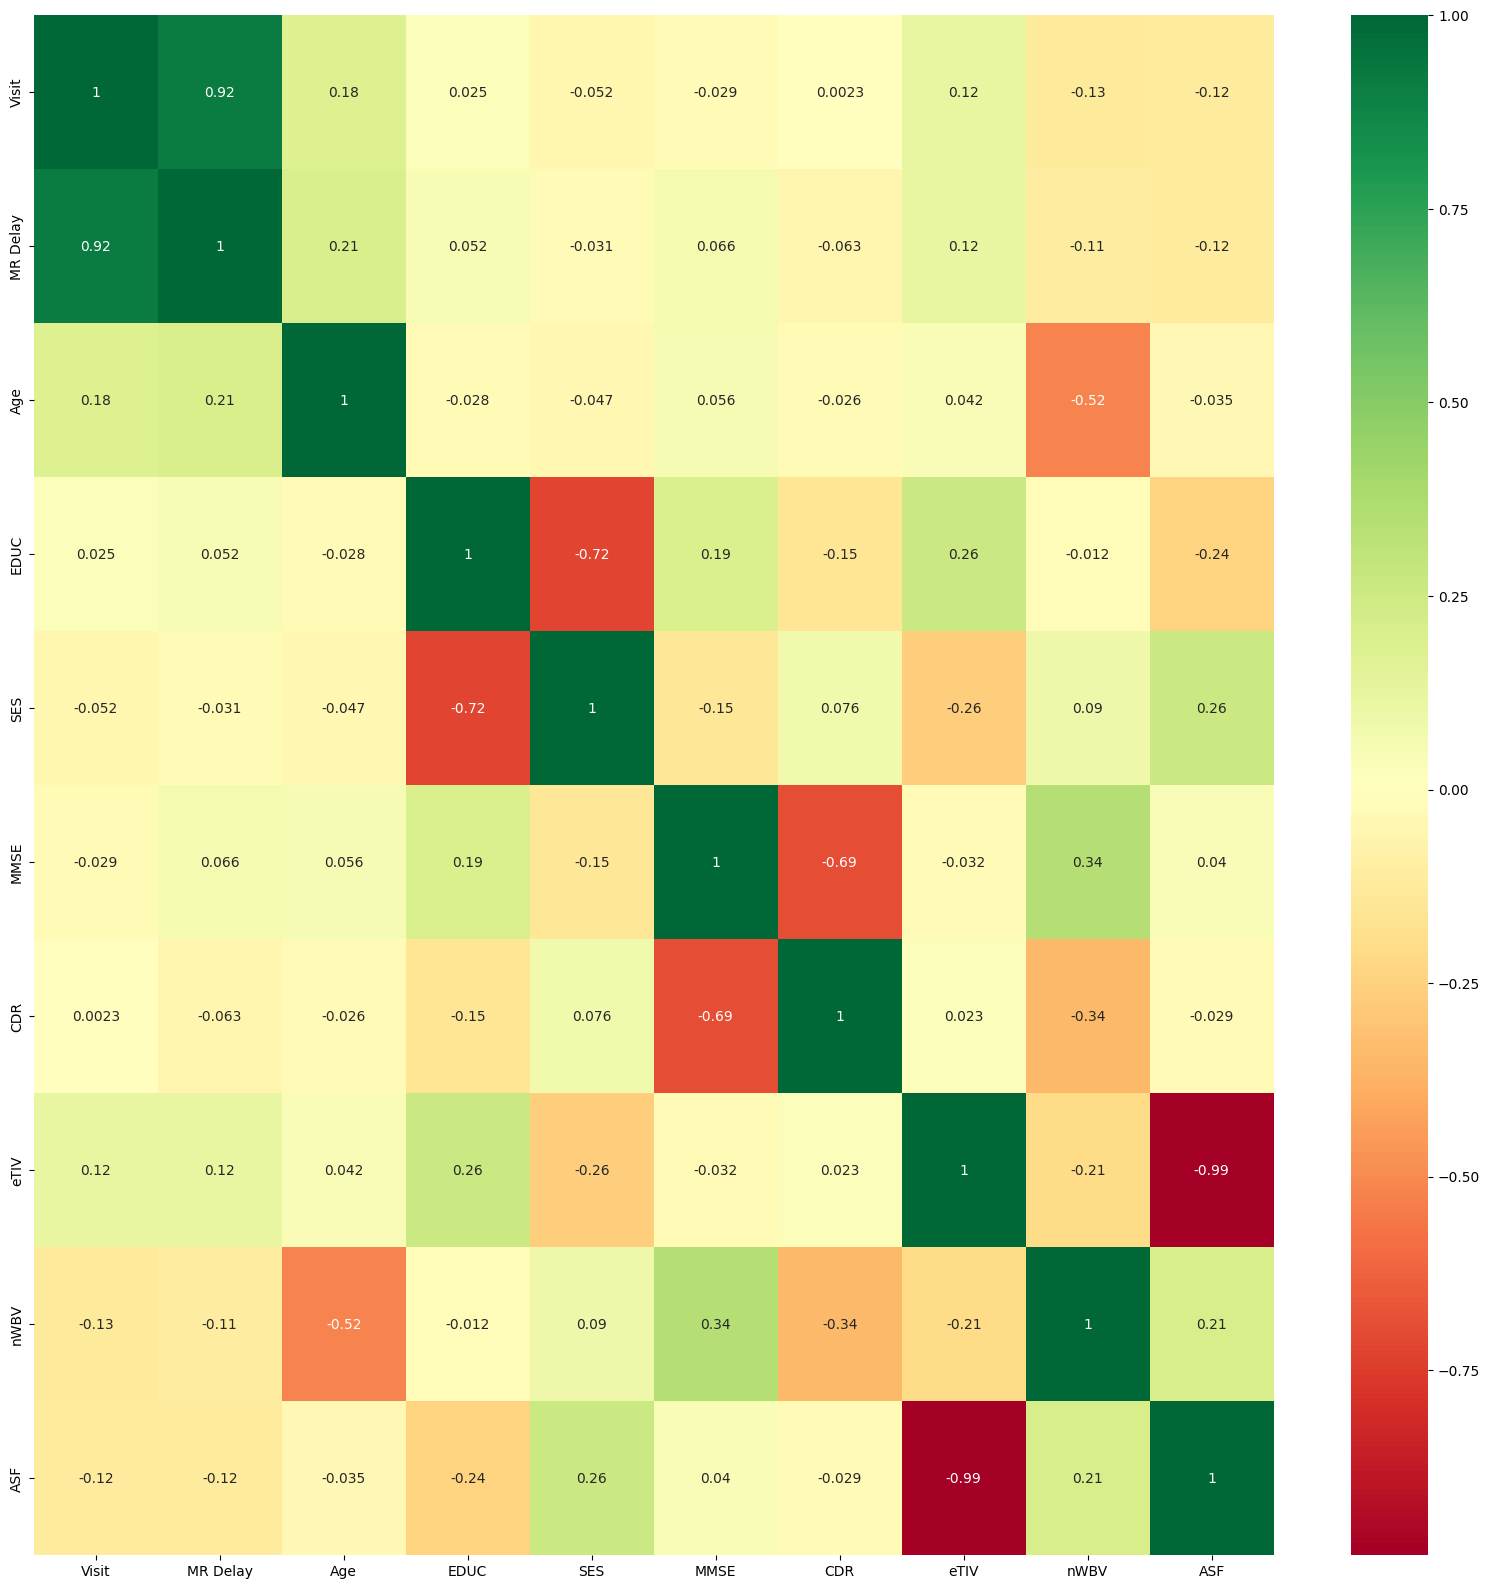

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
numerical_cols = df.select_dtypes(include=[float, int]).columns
corrmat = df[numerical_cols].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.show()

In [ ]:
df.shape

(373, 15)

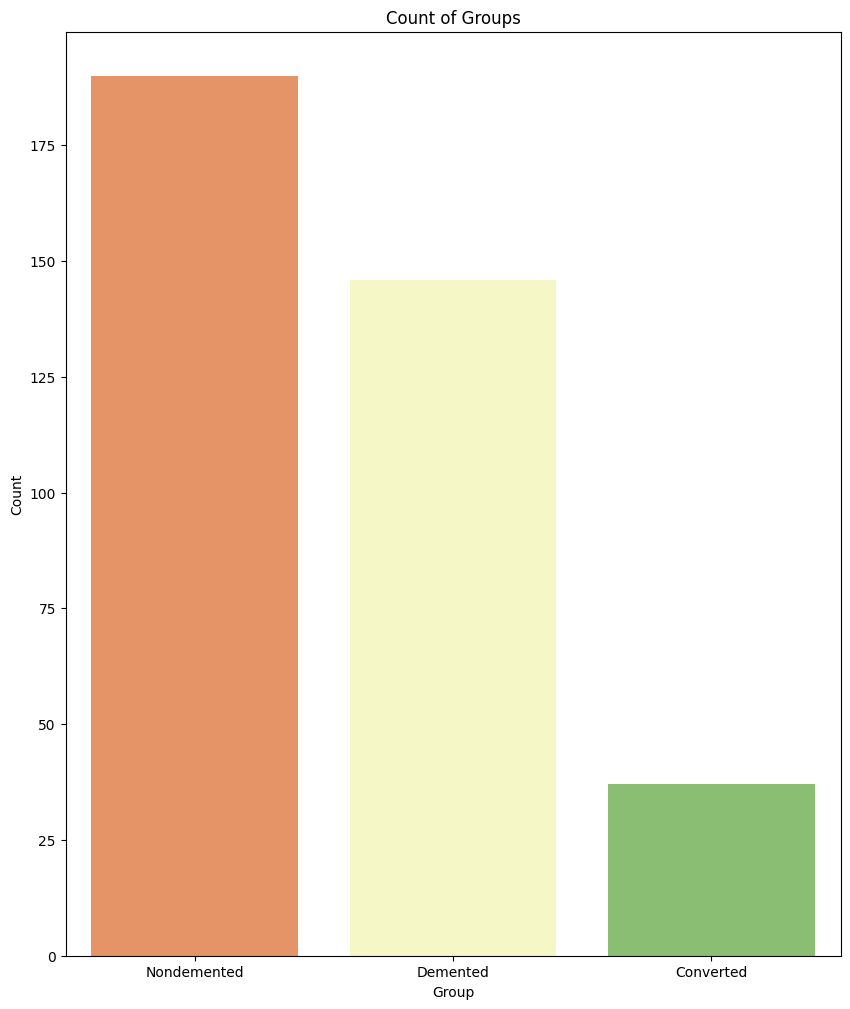

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df['Group'] contains categorical data (e.g., 'Positive' and 'Negative')
sns.countplot(x=df['Group'], palette='RdYlGn')
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Count of Groups')
plt.show()


# Fill missing values (NaNs) in the DataFrame

In [ ]:
df.fillna(method="ffill", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


# Bar Chart for Group Distribution

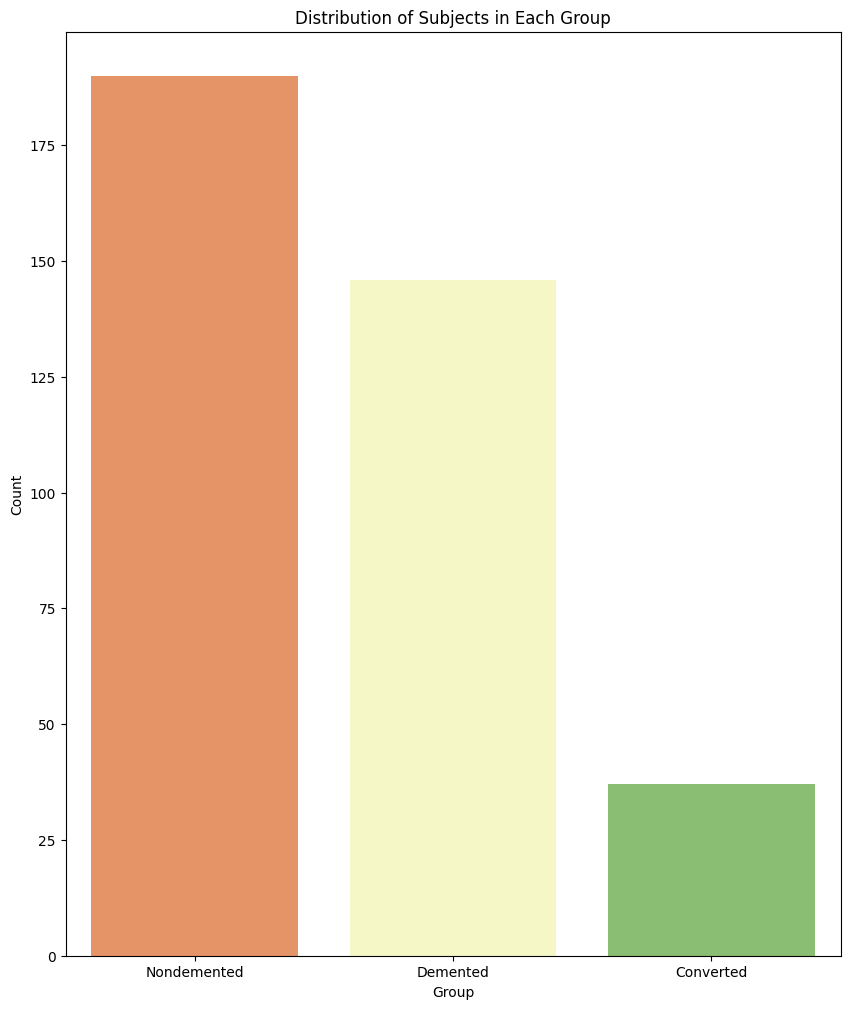

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Group', data=df, palette='RdYlGn')
plt.title('Distribution of Subjects in Each Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

# Histograms for Numerical Variables

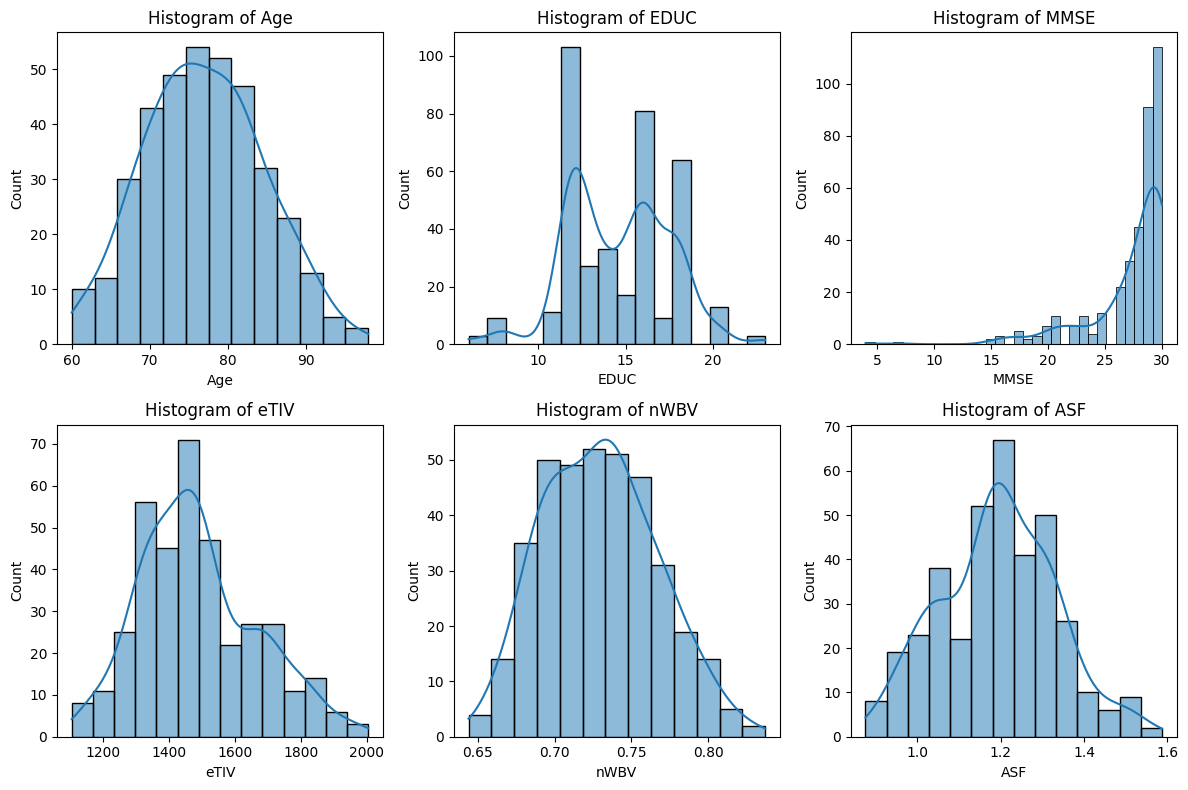

In [ ]:
plt.figure(figsize=(12, 8))
numerical_vars = ['Age', 'EDUC', 'MMSE', 'eTIV', 'nWBV', 'ASF']
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
plt.tight_layout()
plt.show()

# Remove specific columns from the DataFrame

In [ ]:
# Assuming the correct column name is 'Group'
labels = df['Group']
data = df.drop(["Subject ID", "MRI ID", "Visit", "MR Delay", "Hand"], axis =1)
data['Group'].replace(["Nondemented", "Demented", "Converted"], [0, 1, 1], inplace=True)
data['Group'].unique()

array([0, 1])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    int64  
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     373 non-null    float64
 5   MMSE    373 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 29.3+ KB


# Pairplot for Selected Features

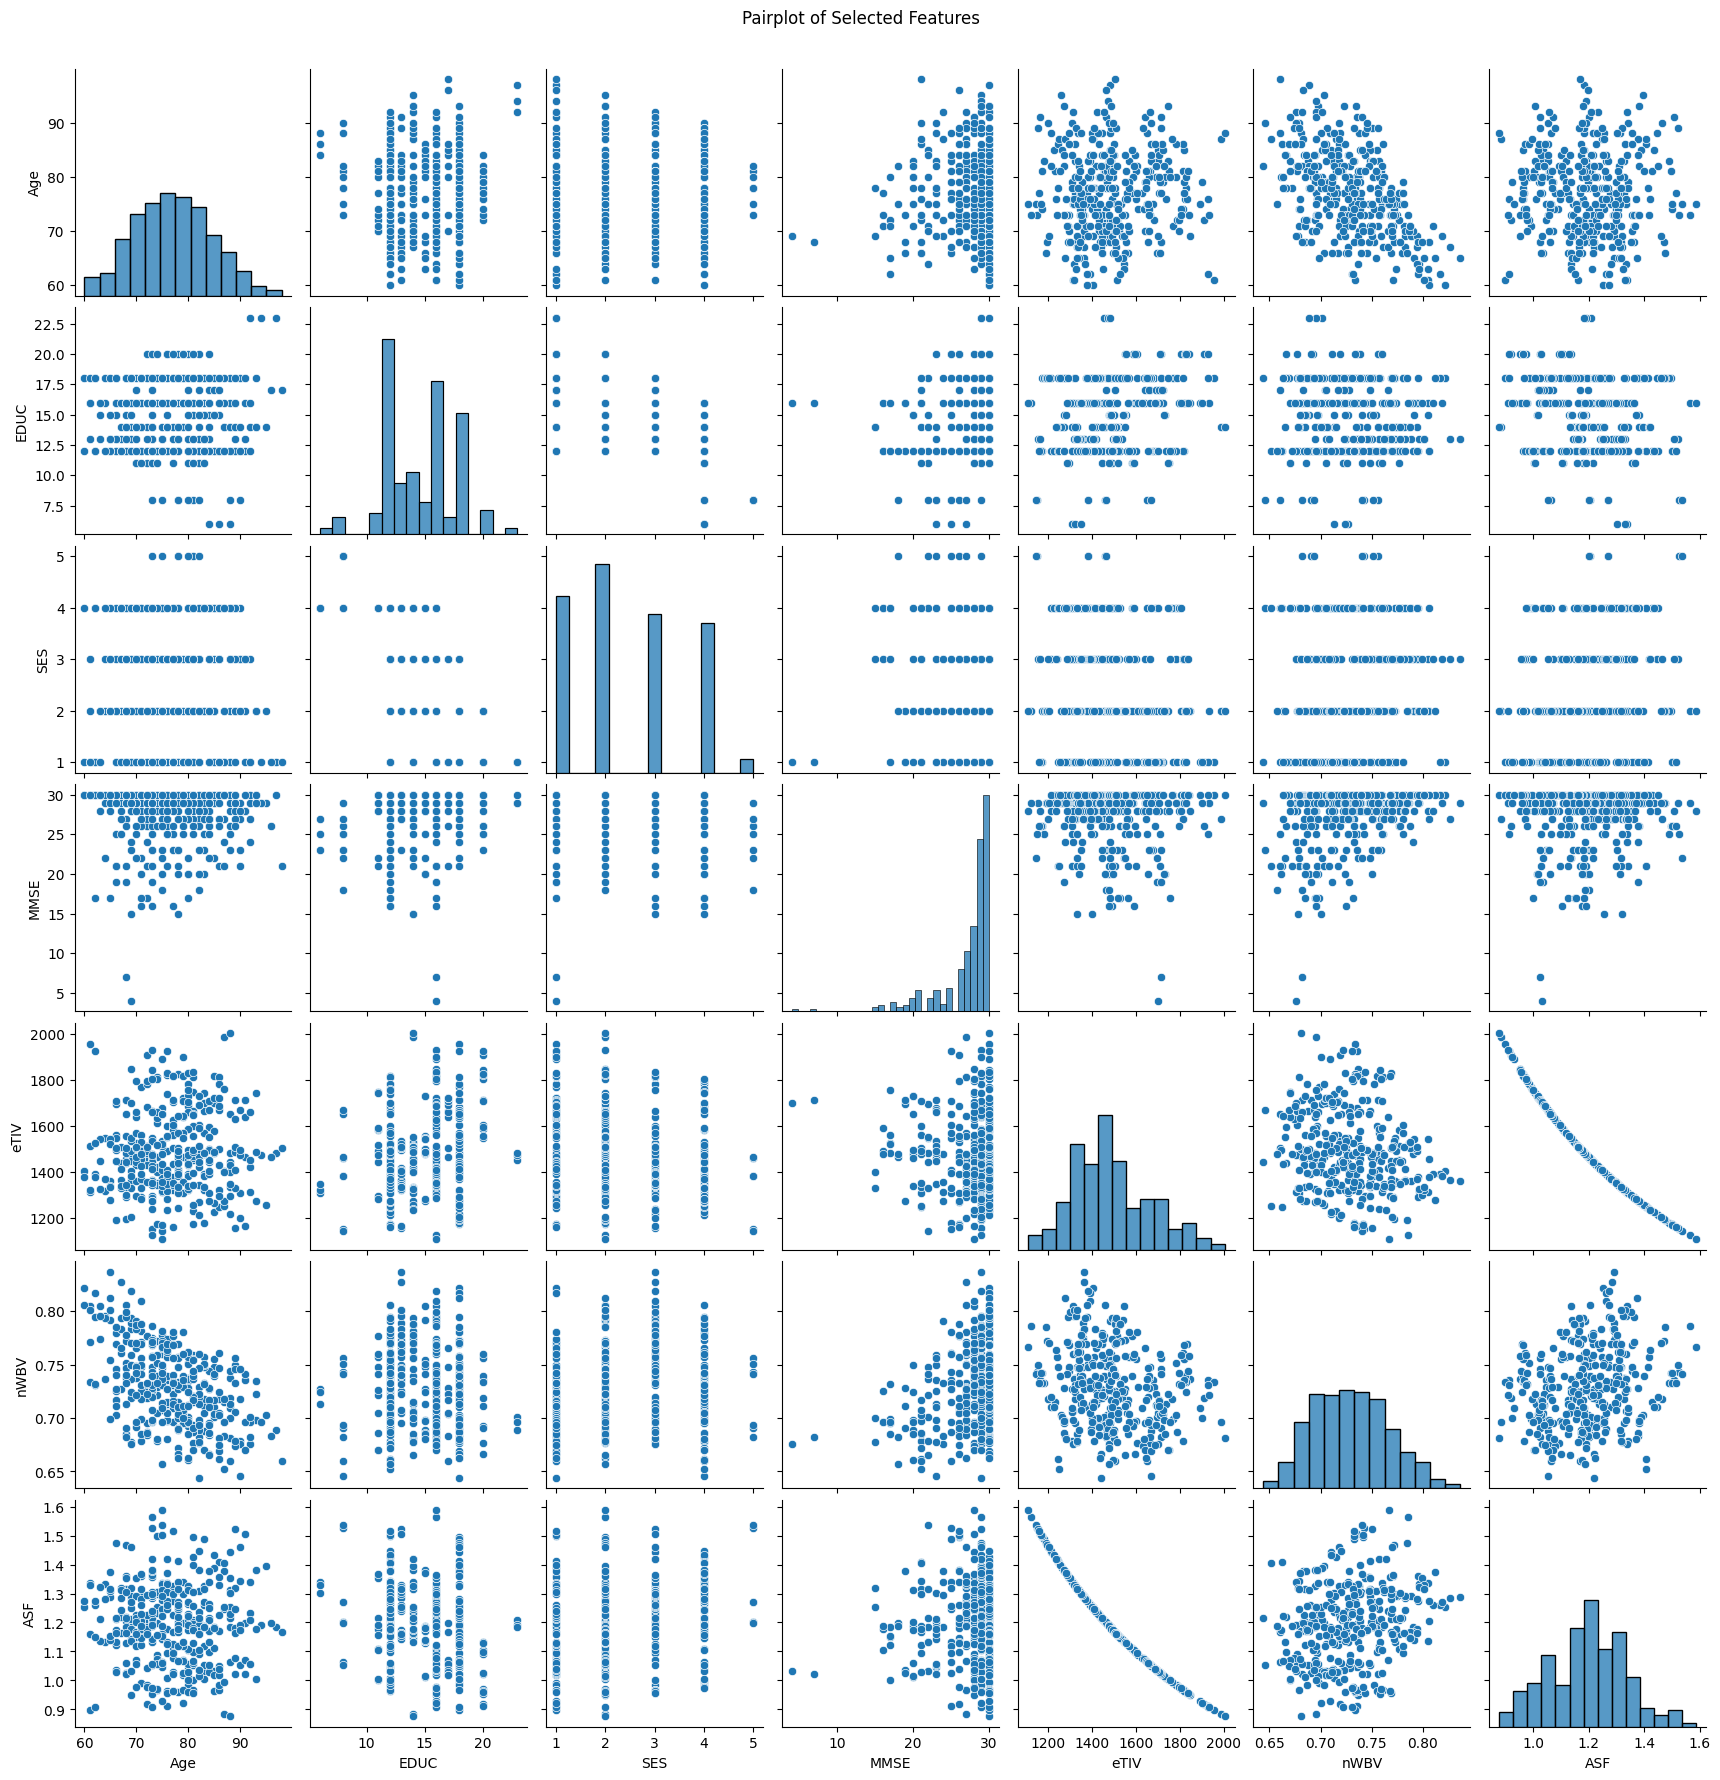

In [ ]:
sns.pairplot(data[['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Box Plot for Age with respect to Group

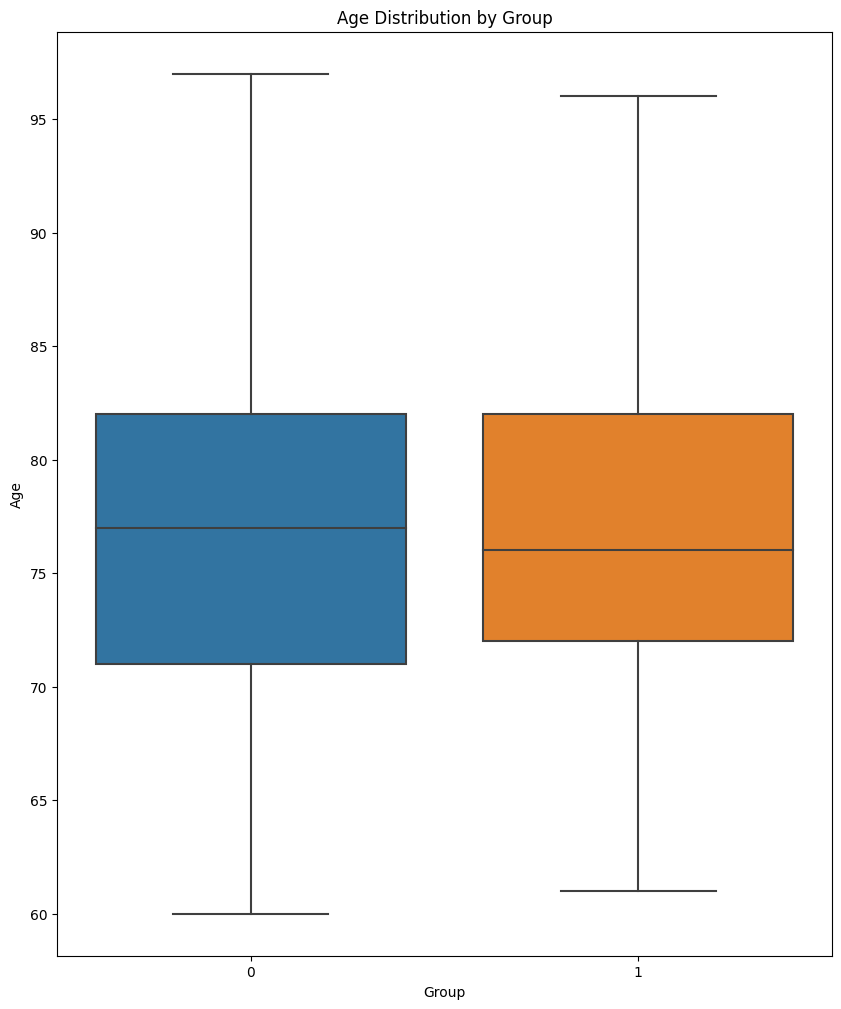

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data' with columns 'Group' and 'Age'

# Box plot graph without the dot on top
sns.boxplot(x='Group', y='Age', data=data, showfliers=False)
plt.title('Age Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Age')
plt.show()


# Box plots are useful for visualizing the distribution and comparing multiple groups, such as 'SES' (Socioeconomic Status) or 'CDR' (Clinical Dementia Rating) for different categories in the 'M/F' column.

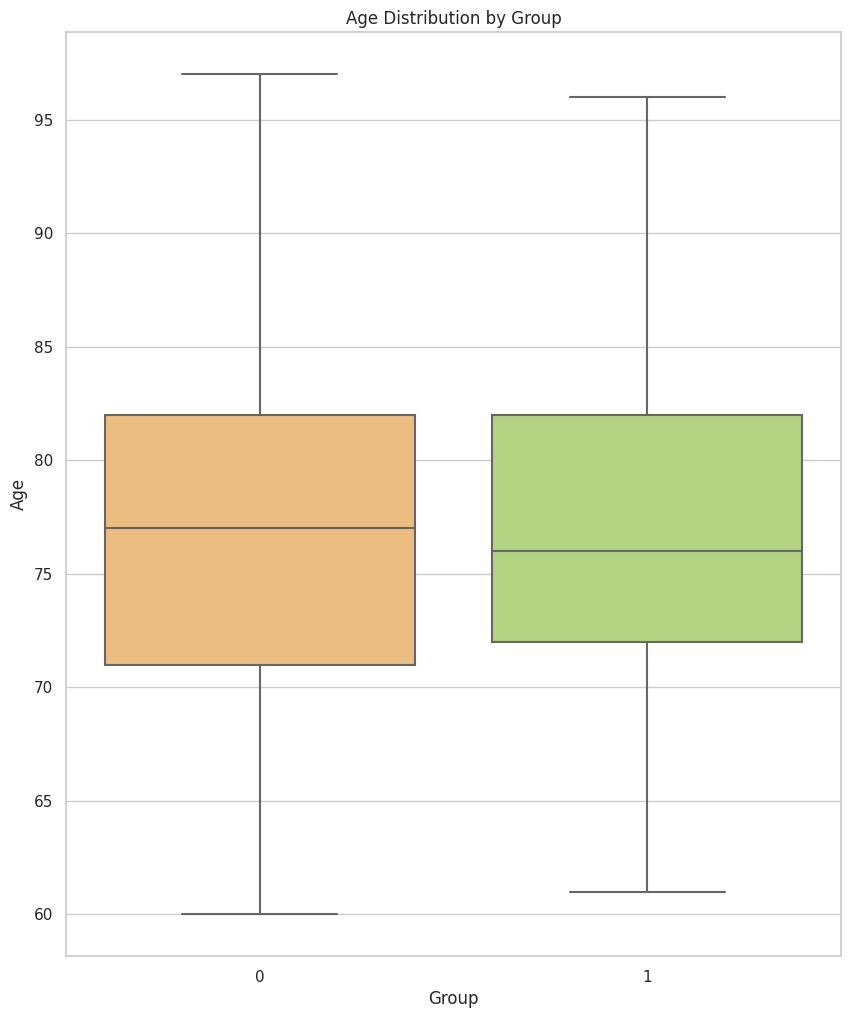

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the required data
# If not, replace 'data' with your actual DataFrame variable name

# Set the style for the plot
sns.set(style="whitegrid")

# Create the box plot
ax = sns.boxplot(x='Group', y='Age', data=data, palette='RdYlGn',  showfliers=False)

# Remove the dot at the top (outlier) from the box plot
# You can adjust the 'y' value (0.97 in this case) to control the dot's removal
for i, artist in enumerate(ax.artists):
    if i % 6 == 5:
        # Remove the top dot/outlier
        artist.set_edgecolor('black')
        artist.set_facecolor('white')
        for j in range(i*6, i*6 + 6):
            line = ax.lines[j]
            line.set_color('black')

plt.title('Age Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Age')
plt.show()


# Preparing the data for a machine learning model

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
                             (MinMaxScaler(), ["Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]),
                             (OneHotEncoder(), ["M/F"]),
                             remainder="passthrough"
                        )

X=data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9]] # for getting column in use
y=data.iloc[:, [0]] #for targetvalues

# x=data.drop(index=0)
# y=data["Group"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42) #training model,0.2=20%, random sate meaning= pesudo random is generated to other users tyell how many time you ahve to show to others

# Data preprocessing steps

In [ ]:
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV',
                                  'ASF']),
                                ('onehotencoder', OneHotEncoder(), ['M/F'])])

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 327 to 347
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     75 non-null     object 
 1   Age     75 non-null     int64  
 2   EDUC    75 non-null     int64  
 3   SES     75 non-null     float64
 4   MMSE    75 non-null     float64
 5   CDR     75 non-null     float64
 6   eTIV    75 non-null     int64  
 7   nWBV    75 non-null     float64
 8   ASF     75 non-null     float64
dtypes: float64(5), int64(3), object(1)
memory usage: 5.9+ KB


In [ ]:
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

# Used to train a TensorFlow neural network model and evaluate its performance on the test data.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Set the random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),  # Increased from 64 to 128
    tf.keras.layers.Dense(128, activation='relu'),  # Increased from 64 to 128
    tf.keras.layers.Dense(64, activation='relu'),   # Increased from 32 to 64
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["accuracy"])

# Fit the model to the normalized training dataset
history = model.fit(X_train_norm, y_train, epochs=300, verbose=1, validation_data=(X_test_norm, y_test))


Epoch 1/300
10/10 [==============================] - 7s 28ms/step - loss: 0.4786 - accuracy: 0.8087 - val_loss: 0.6099 - val_accuracy: 0.8800
Epoch 2/300
10/10 [==============================] - 0s 6ms/step - loss: 0.2060 - accuracy: 0.9631 - val_loss: 0.4092 - val_accuracy: 0.8800
Epoch 3/300
10/10 [==============================] - 0s 7ms/step - loss: 0.2070 - accuracy: 0.9564 - val_loss: 0.4819 - val_accuracy: 0.8800
Epoch 4/300
10/10 [==============================] - 0s 6ms/step - loss: 0.1448 - accuracy: 0.9631 - val_loss: 0.3344 - val_accuracy: 0.8800
Epoch 5/300
10/10 [==============================] - 0s 7ms/step - loss: 0.1456 - accuracy: 0.9631 - val_loss: 0.4293 - val_accuracy: 0.8800
Epoch 6/300
10/10 [==============================] - 0s 8ms/step - loss: 0.1481 - accuracy: 0.9631 - val_loss: 0.3155 - val_accuracy: 0.8800
Epoch 7/300
10/10 [==============================] - 0s 7ms/step - loss: 0.1584 - accuracy: 0.9631 - val_loss: 0.4143 - val_accuracy: 0.8800
Epoch 8/300


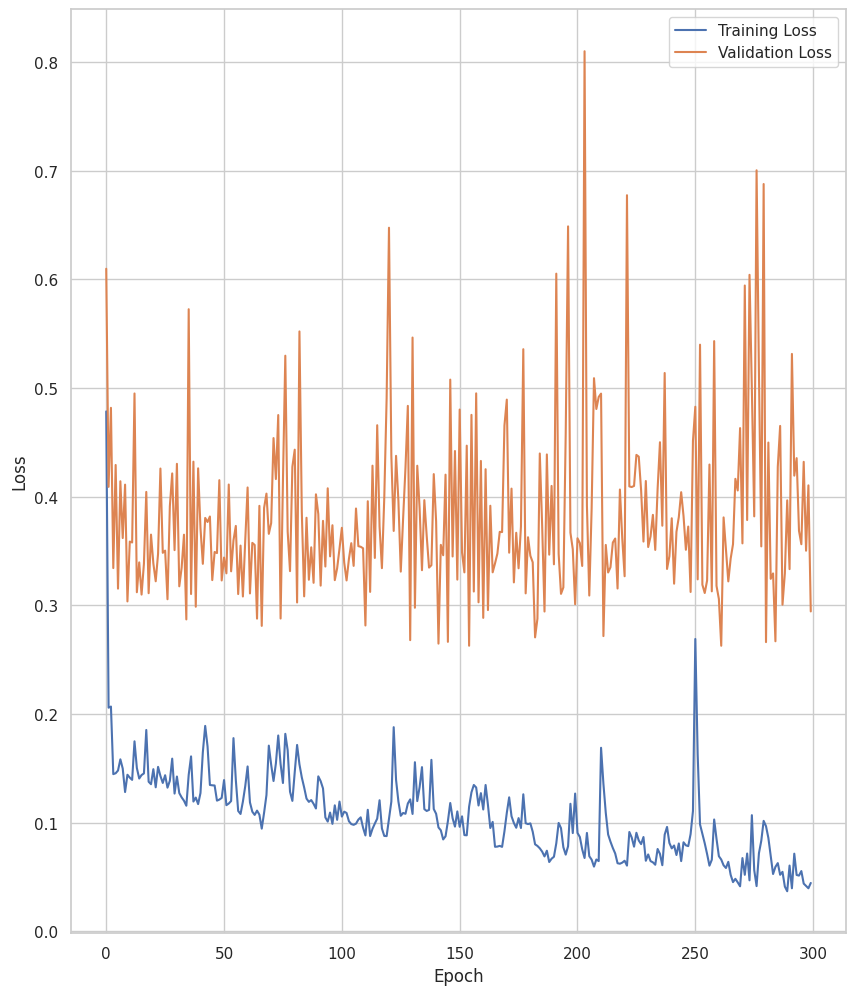

In [ ]:
# Plot the Training and Validation Loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

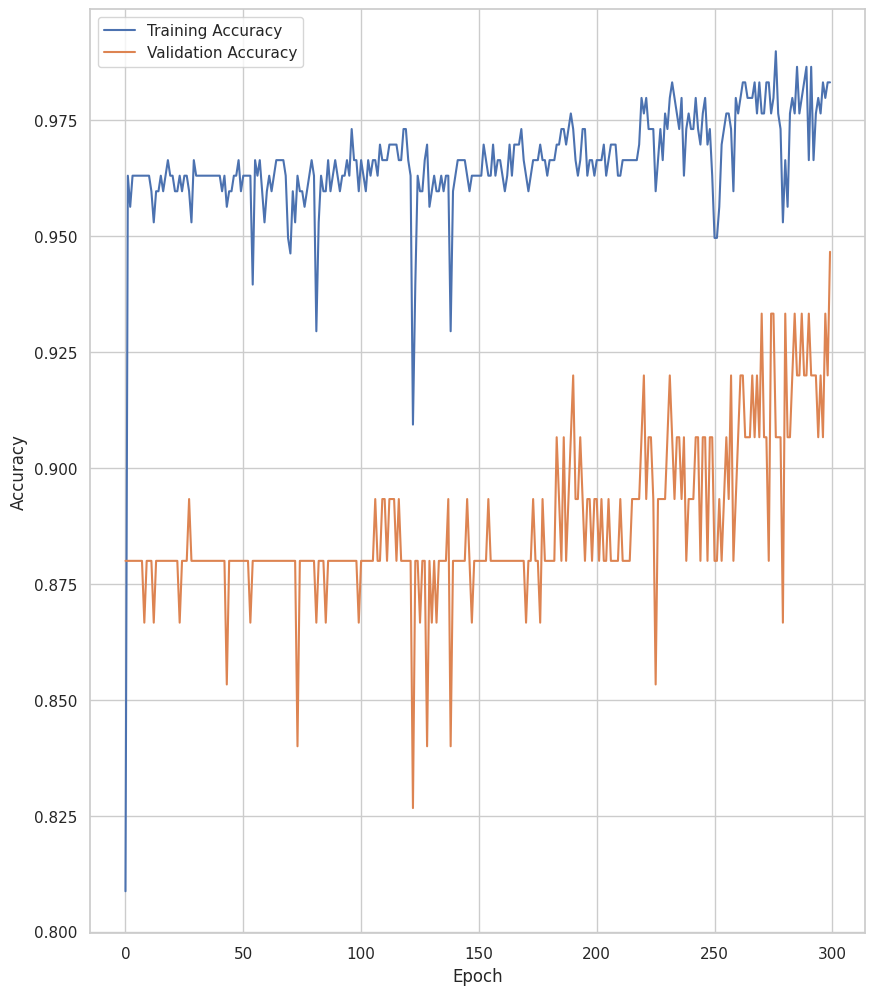

In [ ]:
# Plot the Training and Validation Accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

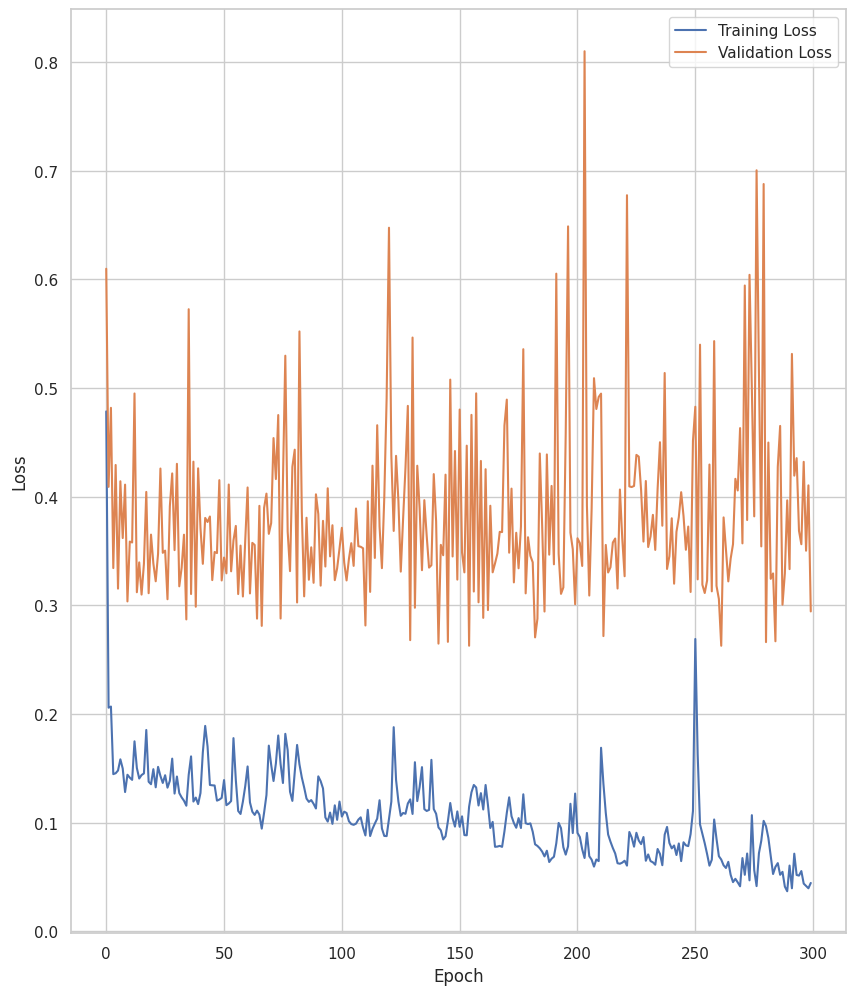

In [ ]:
# Plot the Training and Validation Loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Make predictions on the test dataset
tf_predictions = (model.predict(X_test_norm) > 0.5).astype(int).flatten()

# Calculate the accuracy score
tf_accuracy = accuracy_score(y_test, tf_predictions)

# Calculate the sensitivity (recall) and specificity
tn, fp, fn, tp = confusion_matrix(y_test, tf_predictions).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print the performance metrics
print("Accuracy using TensorFlow model:", tf_accuracy)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

tf_f1 = f1_score(y_test, tf_predictions)
tf_recall = recall_score(y_test, tf_predictions)
tf_precision = precision_score(y_test, tf_predictions)

results = []
results.append((tf_accuracy, tf_precision, tf_recall, tf_f1))
# Create a DataFrame to store the results
tf_results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])

print(tf_results_df)


3/3 [==============================] - 0s 3ms/step
Accuracy using TensorFlow model: 0.9466666666666667
Sensitivity (Recall): 0.9069767441860465
Specificity: 1.0
   Accuracy  Precision    Recall  F1-score
0  0.946667        1.0  0.906977   0.95122


<Figure size 1000x700 with 0 Axes>

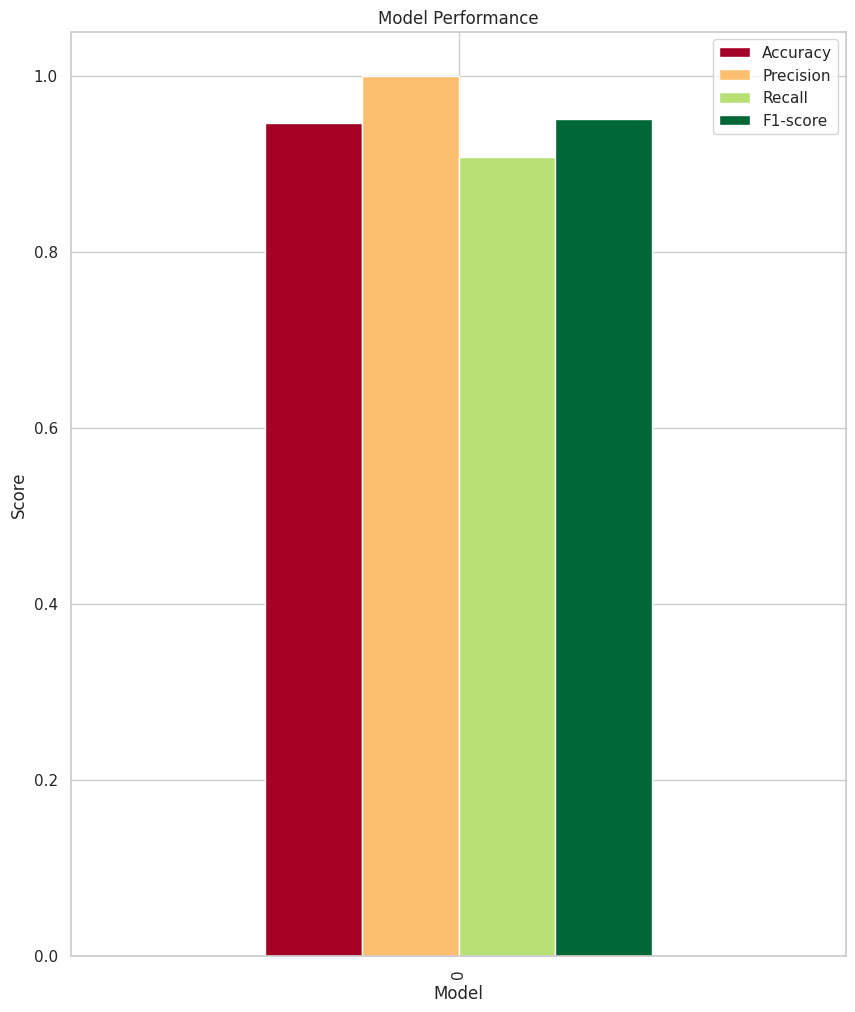

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
tf_results_df.plot(kind = 'bar', colormap='RdYlGn')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 26,241
Trainable params: 26,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_preds_knn = model.predict(X_test_norm)
y_preds_knn

3/3 [==============================] - 0s 3ms/step


array([[1.00000000e+00],
       [7.41763532e-01],
       [1.00000000e+00],
       [1.64394695e-02],
       [3.16850126e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.66303813e-02],
       [2.30921432e-01],
       [9.99487519e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.24110496e-02],
       [1.38679359e-04],
       [1.00000000e+00],
       [5.44109084e-02],
       [3.05093447e-04],
       [1.00000000e+00],
       [1.48056017e-03],
       [1.00000000e+00],
       [5.46985073e-04],
       [2.41493043e-02],
       [9.99984026e-01],
       [1.00000000e+00],
       [8.65032780e-05],
       [1.00000000e+00],
       [1.00000000e+00],
       [7.86159873e-01],
       [8.22982571e-08],
       [1.00000000e+00],
       [1.00000000e+00],
       [2.59001376e-09],
       [6.52360963e-04],
       [1.00000000e+00],
       [2.21328984e-04],
       [6.79737702e-03],
       [8.53170059e-04],
       [7.83695782e-07],
       [2.18084119e-02],
       [1.00000000e+00],


In [ ]:
import numpy as np

y_preds_knn[y_preds_knn > 0.5] = 1
y_preds_knn[y_preds_knn < 0.5] = 0

# Count the occurrences of 0s and 1s in y_preds
count_zeros = np.sum(y_preds_knn == 0)
count_ones = np.sum(y_preds_knn == 1)

print("Number of 0s (Negative class predictions):", count_zeros)
print("Number of 1s (Positive class predictions):", count_ones)

np.unique(y_preds_knn)

Number of 0s (Negative class predictions): 36
Number of 1s (Positive class predictions): 39


array([0., 1.], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix

cfg= confusion_matrix(y_test, tf.round(tf.squeeze(tf.math.abs(y_preds_knn))))
cfg

array([[32,  0],
       [ 4, 39]])

Text(0.5, 1.0, 'Confusion_Matrix for Dementia Prediction')

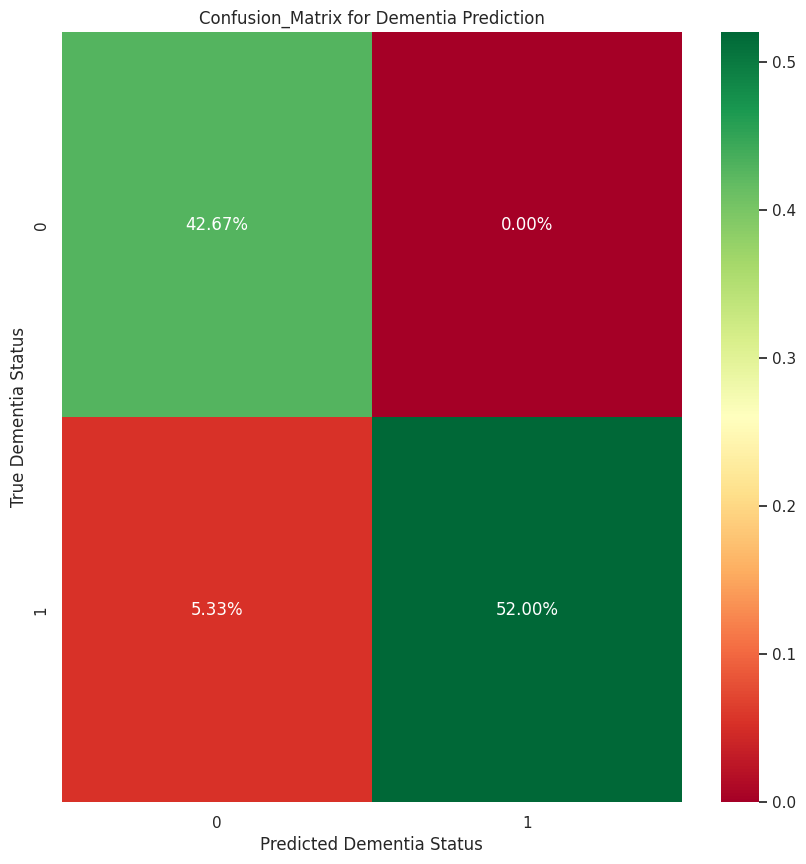

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap((cfg/np.sum(cfg)),
            fmt="0.2%",
            cmap='RdYlGn',
            annot=True)
plt.xlabel("Predicted Dementia Status")
plt.ylabel("True Dementia Status")
plt.title("Confusion_Matrix for Dementia Prediction")

# Used to train a Random Forest classifier and evaluate its performance on the test data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the normalized training dataset
rf_model.fit(X_train_norm, y_train)

# Predict using the model on the test data
rf_predictions = rf_model.predict(X_test_norm)

# Calculate the accuracy score on the test dataset
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Calculate the F1 score on the test dataset
rf_f1 = f1_score(y_test, rf_predictions)

# Calculate the recall on the test dataset
rf_recall = recall_score(y_test, rf_predictions)

# Calculate the precision on the test dataset
rf_precision = precision_score(y_test, rf_predictions)

# Print the metrics
print("Accuracy using Random Forest:", rf_accuracy)
print("F1 score using Random Forest:", rf_f1)
print("Recall using Random Forest:", rf_recall)
print("Precision using Random Forest:", rf_precision)


Accuracy using Random Forest: 0.9066666666666666
F1 score using Random Forest: 0.9135802469135803
Recall using Random Forest: 0.8604651162790697
Precision using Random Forest: 0.9736842105263158


In [ ]:
results = []
results.append((rf_accuracy, rf_precision, rf_recall, rf_f1))
# Create a DataFrame to store the results
rf_results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])

print(rf_results_df)


   Accuracy  Precision    Recall  F1-score
0  0.906667   0.973684  0.860465   0.91358


<Figure size 1000x700 with 0 Axes>

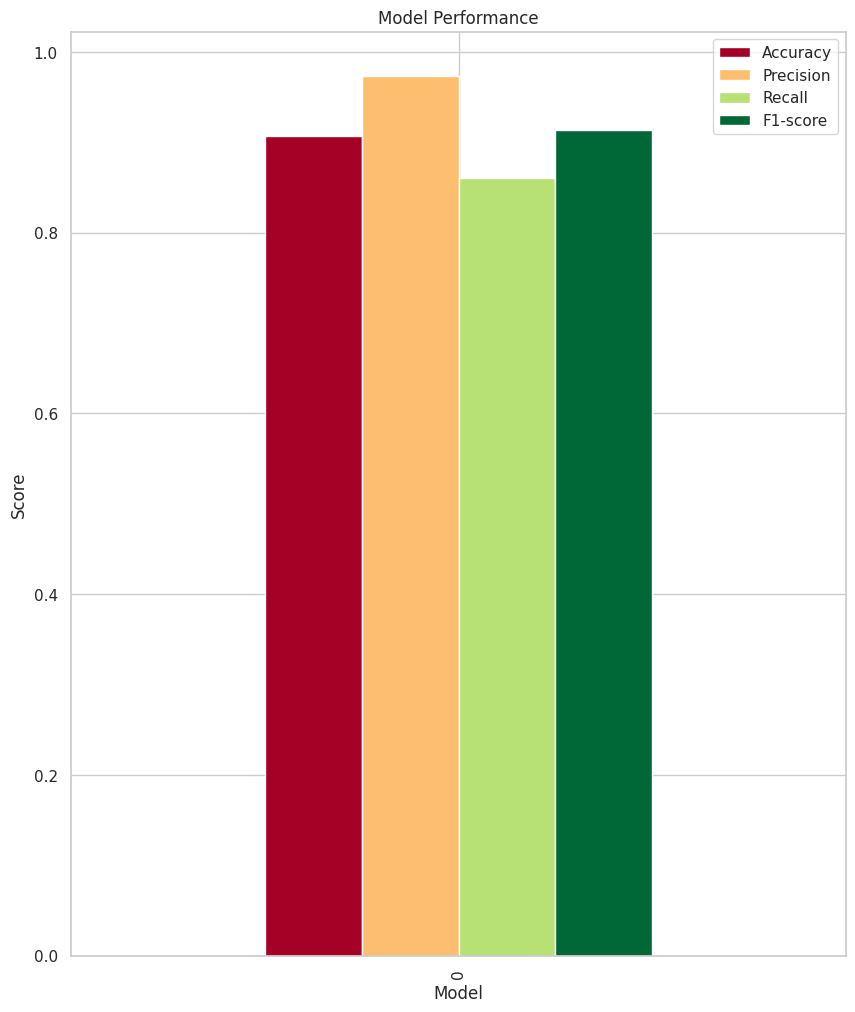

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
rf_results_df.plot(kind = 'bar', colormap='RdYlGn')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance')
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Confusion_Matrix for Dementia Prediction')

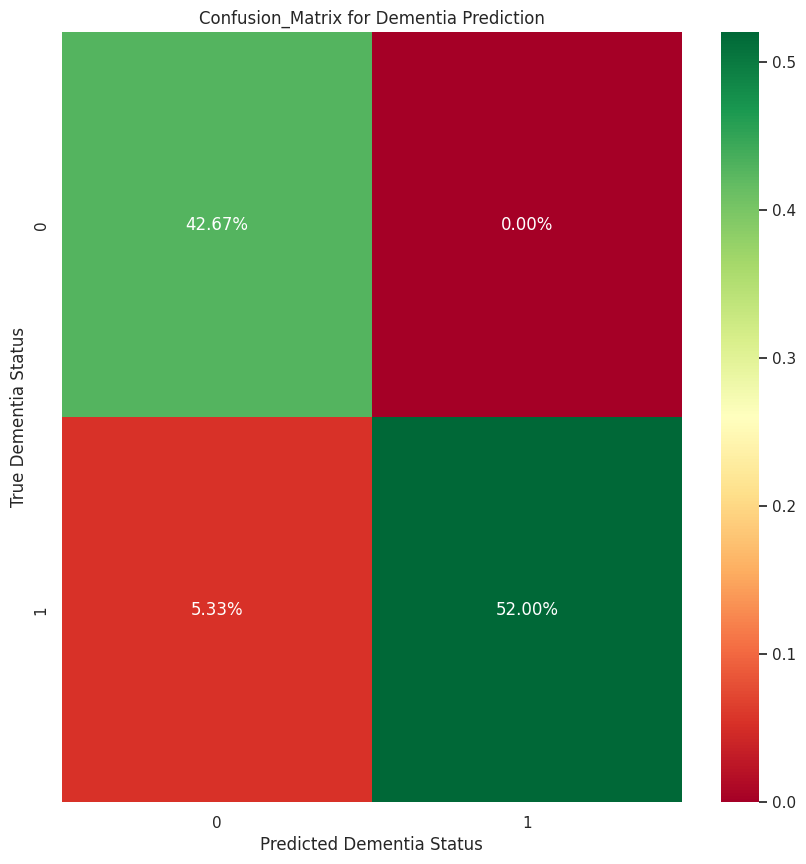

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap((cfg/np.sum(cfg)),
            fmt="0.2%",
            cmap='RdYlGn',
            annot=True)
plt.xlabel("Predicted Dementia Status")
plt.ylabel("True Dementia Status")
plt.title("Confusion_Matrix for Dementia Prediction")

# Used to train a K-Nearest Neighbors (KNN) classifier and evaluate its performance on the test data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Function to find the best value of n_neighbors for KNN
def find_best_n_neighbors(X_train, y_train, X_test, y_test, max_neighbors=30):
    best_accuracy = 0
    best_n_neighbors = 0

    for n_neighbors in range(1, max_neighbors+1):
        model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        model_knn.fit(X_train, y_train)
        accuracy = model_knn.score(X_test, y_test)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_neighbors = n_neighbors

    return best_n_neighbors, best_accuracy

# Find the best value of n_neighbors
best_n_neighbors, accuracy_knn = find_best_n_neighbors(X_train_norm, y_train, X_test_norm, y_test)

# Create the KNN model with the best n_neighbors value
model_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Train the model on the normalized training data
model_knn.fit(X_train_norm, y_train)

# Evaluate the model on the test data
accuracy_knn = model_knn.score(X_test_norm, y_test)

print("Best n_neighbors:", best_n_neighbors)
print("Accuracy using K-Nearest Neighbors (KNN) classifier:", accuracy_knn)


Best n_neighbors: 1
Accuracy using K-Nearest Neighbors (KNN) classifier: 0.9333333333333333


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Create the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the normalized training dataset
knn_model.fit(X_train_norm, y_train)

# Make predictions on the test dataset
knn_predictions = knn_model.predict(X_test_norm)

# Calculate the accuracy score
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Calculate the sensitivity (recall) and specificity
tn, fp, fn, tp = confusion_matrix(y_test, knn_predictions).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print the performance metrics
print("Accuracy using K-Nearest Neighbors (KNN):", knn_accuracy)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

knn_f1 = f1_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)

results = []
results.append((knn_accuracy, knn_precision, knn_recall, knn_f1))
# Create a DataFrame to store the results
knn_results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])

print(knn_results_df)


Accuracy using K-Nearest Neighbors (KNN): 0.88
Sensitivity (Recall): 0.813953488372093
Specificity: 0.96875
   Accuracy  Precision    Recall  F1-score
0      0.88   0.972222  0.813953  0.886076


<Figure size 1000x700 with 0 Axes>

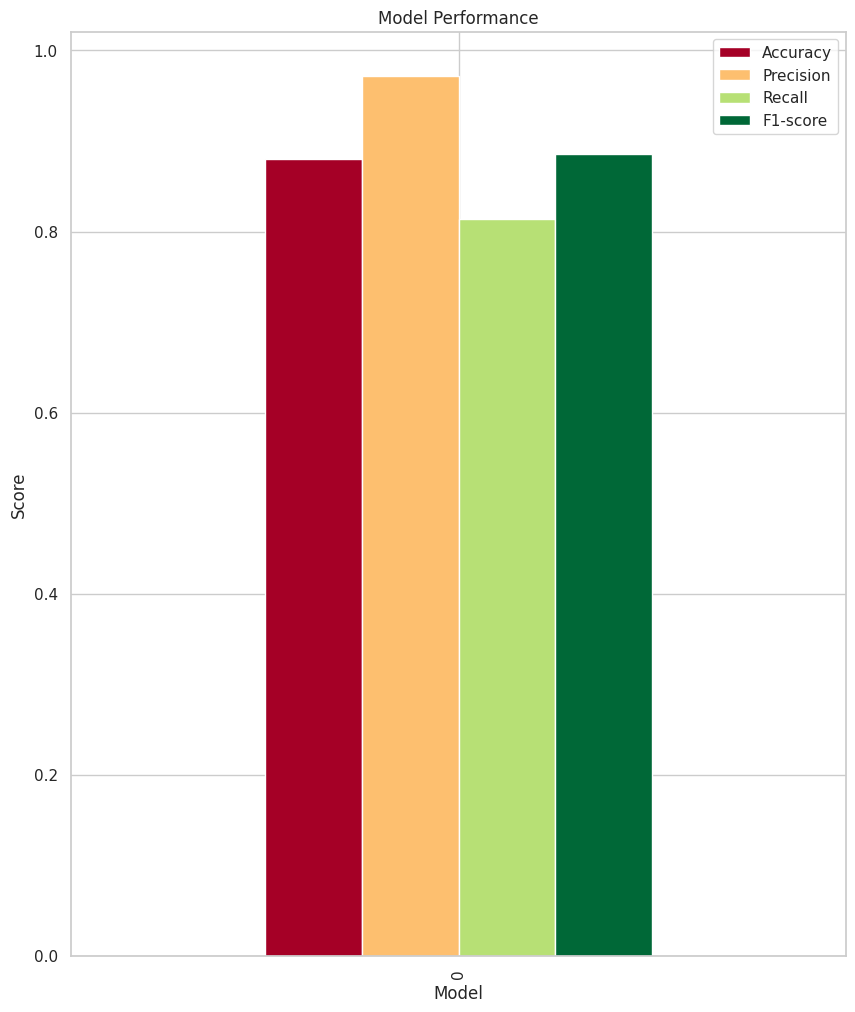

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
knn_results_df.plot(kind = 'bar', colormap='RdYlGn')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance')
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Confusion_Matrix for Dementia Prediction')

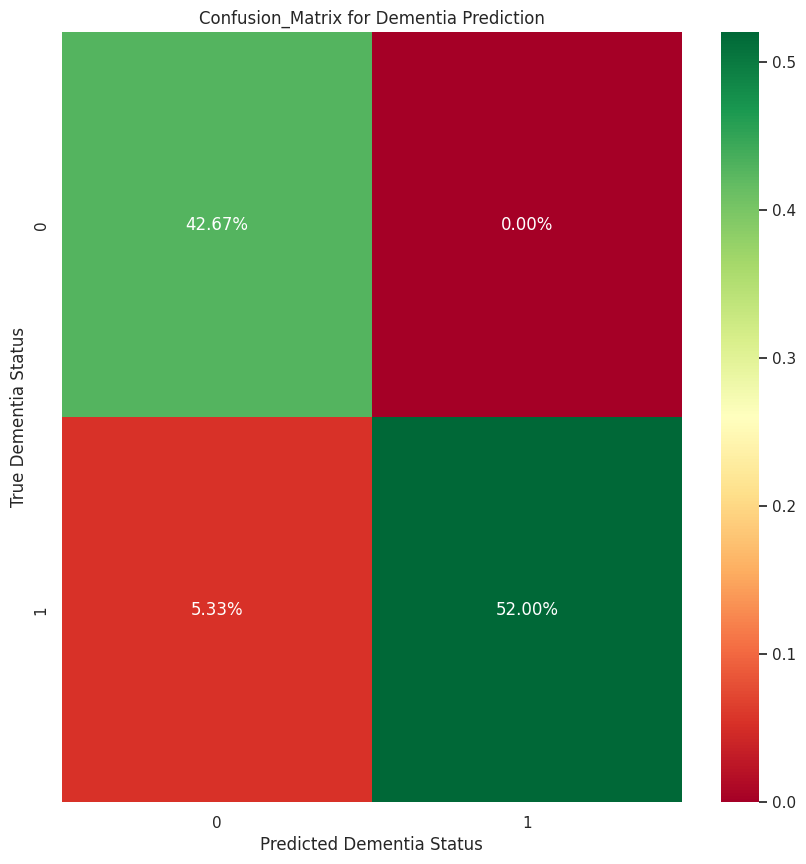

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap((cfg/np.sum(cfg)),
            fmt="0.2%",
            cmap='RdYlGn',
            annot=True)
plt.xlabel("Predicted Dementia Status")
plt.ylabel("True Dementia Status")
plt.title("Confusion_Matrix for Dementia Prediction")

# Used to train a Support Vector Machines (SVM) and evaluate its performance on the test data.

In [ ]:
from sklearn.svm import SVC

# Function to find the best SVM model with different kernels
def find_best_svm_model(X_train, y_train, X_test, y_test):
    best_accuracy = 0
    best_kernel = None

    # List of kernels to try
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']

    for kernel in kernels:
        model_svm = SVC(kernel=kernel)
        model_svm.fit(X_train, y_train)
        accuracy = model_svm.score(X_test, y_test)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_kernel = kernel

    return best_kernel, best_accuracy

# Find the best SVM model with the optimal kernel
best_kernel, accuracy_svm = find_best_svm_model(X_train_norm, y_train, X_test_norm, y_test)

# Create the SVM model with the best kernel
model_svm = SVC(kernel=best_kernel)

# Fit the model to the normalized training data
model_svm.fit(X_train_norm, y_train)

# Evaluate the model on the test data
accuracy_svm = model_svm.score(X_test_norm, y_test)

print("Best kernel:", best_kernel)
print("Accuracy using Support Vector Machines (SVM):", accuracy_svm)


Best kernel: linear
Accuracy using Support Vector Machines (SVM): 0.88


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Create the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the model to the normalized training dataset
svm_model.fit(X_train_norm, y_train)

# Make predictions on the test dataset
svm_predictions = svm_model.predict(X_test_norm)

# Calculate the accuracy score
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Calculate the sensitivity (recall) and specificity
tn, fp, fn, tp = confusion_matrix(y_test, svm_predictions).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print the performance metrics
print("Accuracy using Support Vector Machine (SVM):", svm_accuracy)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

svm_f1 = f1_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)

results = []
results.append((svm_accuracy, svm_precision, svm_recall, svm_f1))
# Create a DataFrame to store the results
svm_results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])

print(svm_results_df)


Accuracy using Support Vector Machine (SVM): 0.88
Sensitivity (Recall): 0.813953488372093
Specificity: 0.96875
   Accuracy  Precision    Recall  F1-score
0      0.88   0.972222  0.813953  0.886076


<Figure size 1000x700 with 0 Axes>

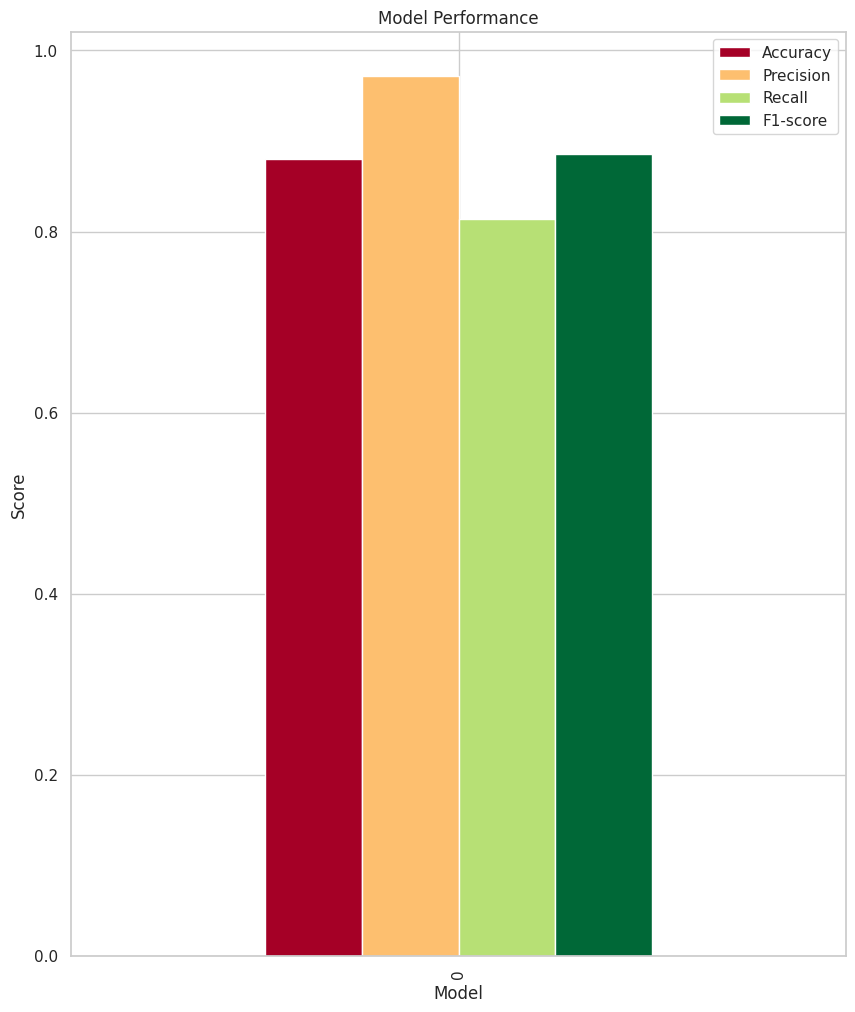

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
svm_results_df.plot(kind = 'bar', colormap='RdYlGn')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance')
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Confusion_Matrix for Dementia Prediction')

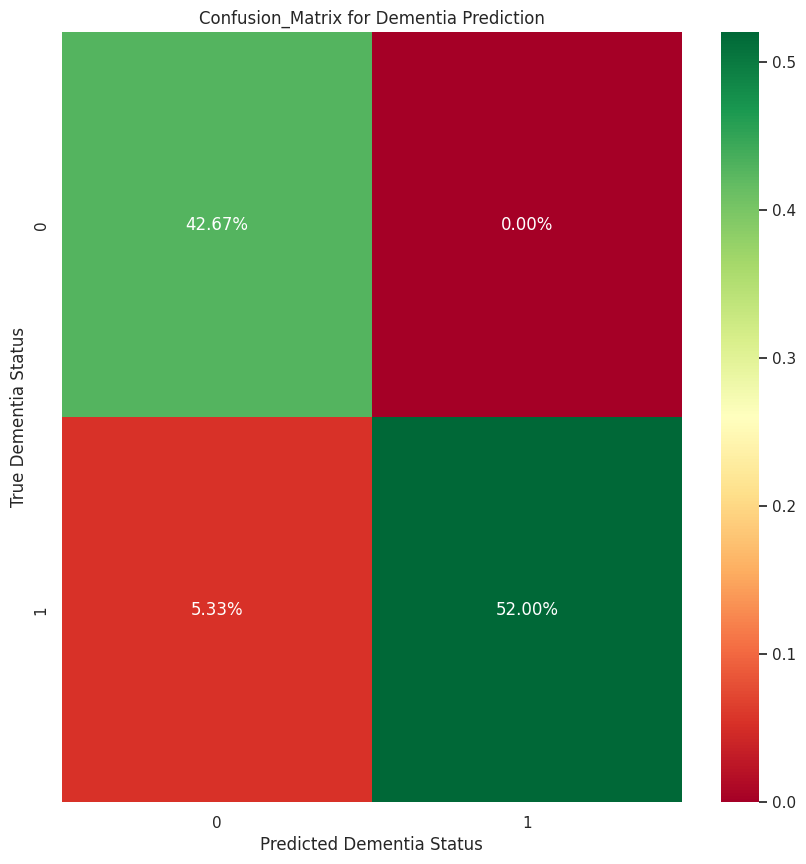

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap((cfg/np.sum(cfg)),
            fmt="0.2%",
            cmap='RdYlGn',
            annot=True)
plt.xlabel("Predicted Dementia Status")
plt.ylabel("True Dementia Status")
plt.title("Confusion_Matrix for Dementia Prediction")

# Used to train a DecisionTreeClassifier and evaluate its performance on the test data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Function to find the best Decision Tree model with different max depths
def find_best_dt_model(X_train, y_train, X_test, y_test):
    best_accuracy = 0
    best_max_depth = None

    # List of max depths to try
    max_depths = [None, 5, 10, 15, 20]

    for max_depth in max_depths:
        model_dt = DecisionTreeClassifier(max_depth=max_depth)
        model_dt.fit(X_train, y_train)
        accuracy = model_dt.score(X_test, y_test)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_max_depth = max_depth

    return best_max_depth, best_accuracy

# Find the best Decision Tree model with the optimal max depth
best_max_depth, accuracy_dt = find_best_dt_model(X_train_norm, y_train, X_test_norm, y_test)

# Create the Decision Tree model with the best max depth
model_dt = DecisionTreeClassifier(max_depth=best_max_depth)

# Fit the model to the normalized training data
model_dt.fit(X_train_norm, y_train)

# Evaluate the model on the test data
accuracy_dt = model_dt.score(X_test_norm, y_test)

print("Best max depth:", best_max_depth)
print("Accuracy using Decision Tree Classifier:", accuracy_dt)


Best max depth: None
Accuracy using Decision Tree Classifier: 0.8533333333333334


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Create the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the normalized training dataset
dt_model.fit(X_train_norm, y_train)

# Make predictions on the test dataset
dt_predictions = dt_model.predict(X_test_norm)

# Calculate the accuracy score
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Calculate the sensitivity (recall) and specificity
tn, fp, fn, tp = confusion_matrix(y_test, dt_predictions).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print the performance metrics
print("Accuracy using Decision Tree:", dt_accuracy)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

dt_f1 = f1_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)

results = []
results.append((dt_accuracy, dt_precision, dt_recall, dt_f1))
# Create a DataFrame to store the results
dt_results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])

print(dt_results_df)


Accuracy using Decision Tree: 0.8533333333333334
Sensitivity (Recall): 0.8372093023255814
Specificity: 0.875
   Accuracy  Precision    Recall  F1-score
0  0.853333        0.9  0.837209   0.86747


<Figure size 1000x700 with 0 Axes>

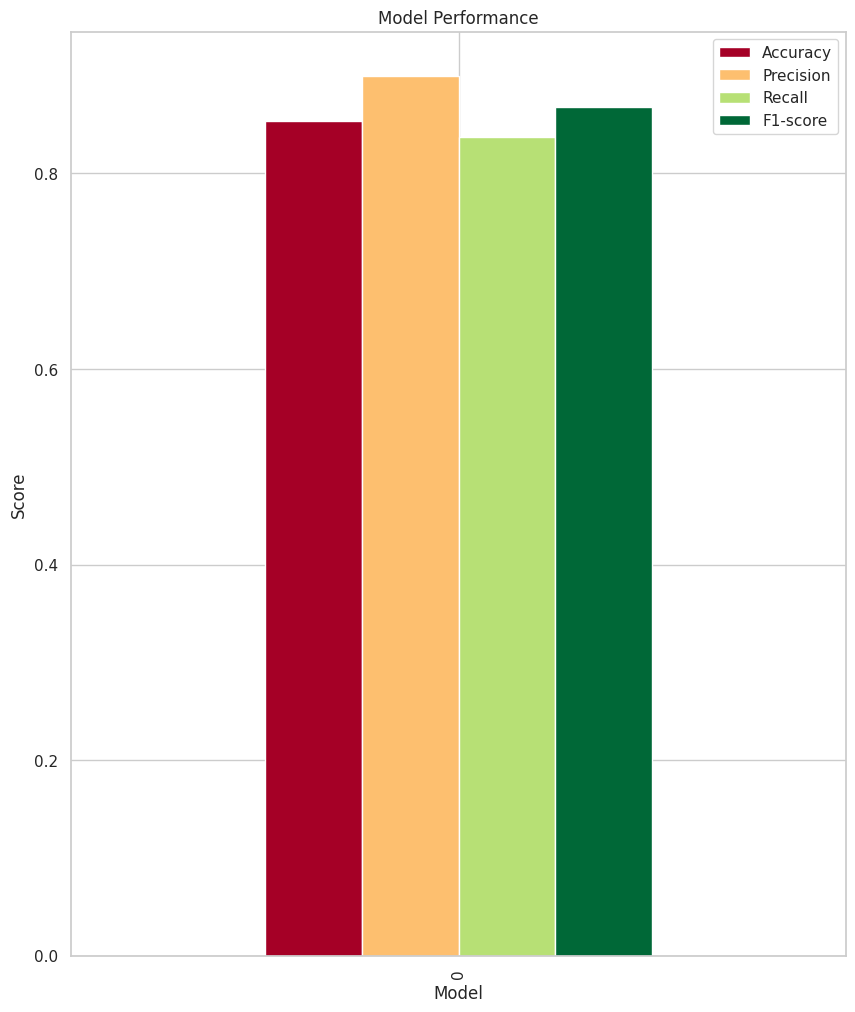

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
dt_results_df.plot(kind = 'bar', colormap='RdYlGn')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance')
plt.legend(loc='upper right')
plt.show()

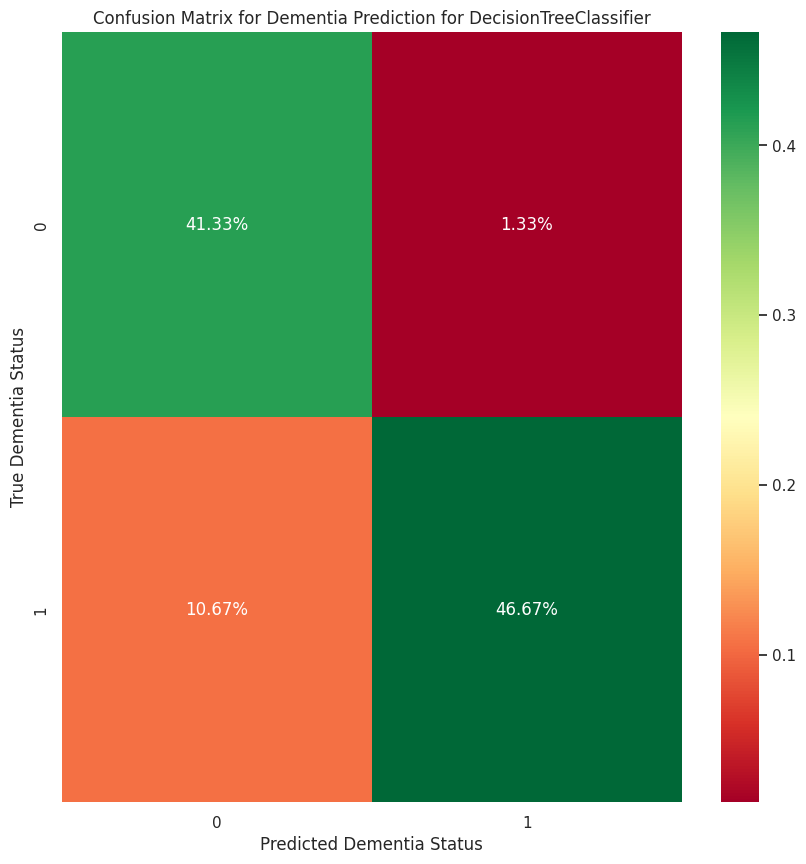

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to find the best Decision Tree model with different max depths
def find_best_dt_model(X_train, y_train, X_test, y_test):
    best_accuracy = 0
    best_max_depth = None

    # List of max depths to try
    max_depths = [None, 5, 10, 15, 20]

    for max_depth in max_depths:
        model_dt = DecisionTreeClassifier(max_depth=max_depth)
        model_dt.fit(X_train, y_train)
        accuracy = model_dt.score(X_test, y_test)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_max_depth = max_depth

    return best_max_depth, best_accuracy

# Find the best Decision Tree model with the optimal max depth
best_max_depth, accuracy_dt = find_best_dt_model(X_train_norm, y_train, X_test_norm, y_test)

# Create the Decision Tree model with the best max depth
model_dt = DecisionTreeClassifier(max_depth=best_max_depth)

# Fit the model to the normalized training data
model_dt.fit(X_train_norm, y_train)

# Predict using the model on the test data
y_preds = model_dt.predict(X_test_norm)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap((conf_matrix / np.sum(conf_matrix)), fmt="0.2%", cmap='RdYlGn', annot=True)
plt.xlabel("Predicted Dementia Status")
plt.ylabel("True Dementia Status")
plt.title("Confusion Matrix for Dementia Prediction for DecisionTreeClassifier")
plt.show()


# Used to train Gradient Boosting Algorithms (XGBoost) and evaluate its performance on the test data.

## XGBoost(Extreme Gradient Boosting)

In [ ]:
import xgboost as xgb

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Fit the model to the normalized training dataset
xgb_model.fit(X_train_norm, y_train)

# Calculate the accuracy score on the test dataset
xgb_accuracy = xgb_model.score(X_test_norm, y_test)

print("Accuracy using XGBoost:", xgb_accuracy)


Accuracy using XGBoost: 0.8933333333333333


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Fit the model to the normalized training dataset
xgb_model.fit(X_train_norm, y_train)

# Make predictions on the test dataset
xgb_predictions = xgb_model.predict(X_test_norm)

# Calculate the accuracy score
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Calculate the sensitivity (recall) and specificity
tn, fp, fn, tp = confusion_matrix(y_test, xgb_predictions).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print the performance metrics
print("Accuracy using XGBoost:", xgb_accuracy)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

xgb_f1 = f1_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)

results = []
results.append((xgb_accuracy, xgb_precision, xgb_recall, xgb_f1))
# Create a DataFrame to store the results
xgb_results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])

print(xgb_results_df)


Accuracy using XGBoost: 0.8933333333333333
Sensitivity (Recall): 0.8604651162790697
Specificity: 0.9375
   Accuracy  Precision    Recall  F1-score
0  0.893333   0.948718  0.860465  0.902439


<Figure size 1000x700 with 0 Axes>

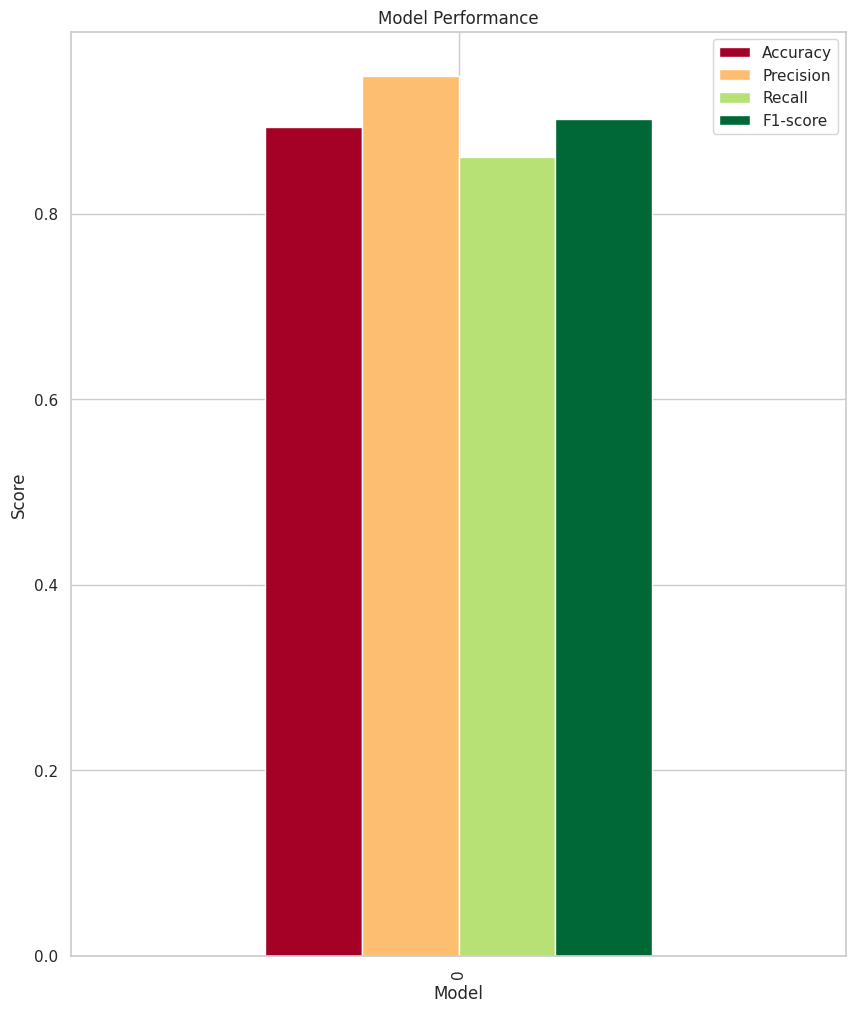

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
xgb_results_df.plot(kind = 'bar', colormap='RdYlGn')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance')
plt.legend(loc='upper right')
plt.show()

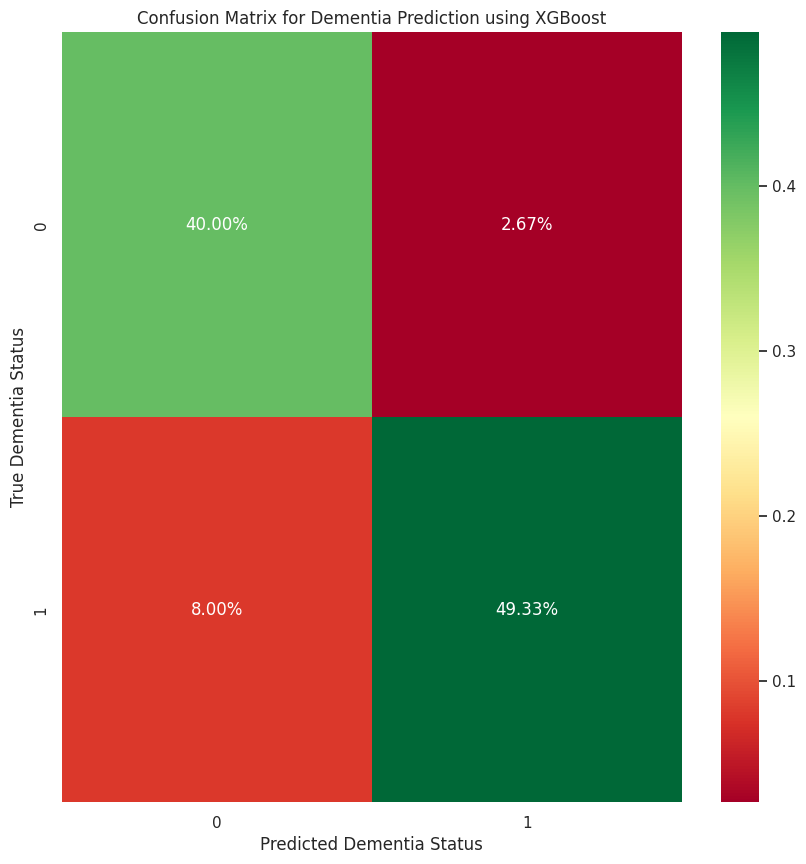

In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Fit the model to the normalized training dataset
xgb_model.fit(X_train_norm, y_train)

# Predict using the model on the test data
y_preds_xgb = xgb_model.predict(X_test_norm)

# Create the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_preds_xgb)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap((conf_matrix_xgb / np.sum(conf_matrix_xgb)), fmt="0.2%", cmap='RdYlGn', annot=True)
plt.xlabel("Predicted Dementia Status")
plt.ylabel("True Dementia Status")
plt.title("Confusion Matrix for Dementia Prediction using XGBoost")
plt.show()


# Make predictions on the test data

In [ ]:
# Make predictions on the test data
y_preds = model.predict(X_test_norm)

# The 'y_preds' variable will contain the predicted probabilities for each sample in the test data

# If you want to convert the probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5):
y_binary_preds = (y_preds >= 0.5).astype(int)

# The 'y_binary_preds' variable will contain the binary predictions (0 or 1) for each sample in the test data
y_binary_preds

3/3 [==============================] - 0s 3ms/step


array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1]])

# Best and average scores of the selected features

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Assuming X contains missing values and may have non-numeric data
# Replace 'M' values with NaN (missing values)
X = X.replace('M', np.nan)

# Convert the non-numeric columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col].astype(str))

# Impute missing values using 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent', add_indicator=True)
X_imputed = imputer.fit_transform(X)

# Convert the imputed data back to a DataFrame, including column names
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Define the target variable 'Y'
Y = df["Group"]  # Assuming 'Group' is the target column in your dataset

# Feature selection using SelectKBest after imputation
k = 5  # Number of features you want to select
k_best = SelectKBest(score_func=chi2, k=k)
X_train_best = k_best.fit_transform(X_imputed, Y)

# Print the scores of the selected features
np.set_printoptions(precision=3)
print("Scores of the selected features:")
print(k_best.scores_)

# Transform X to get the selected features
k_features = k_best.transform(X_imputed)

# Print the first 5 rows of the selected features
print("First 5 rows of the selected features:")
print(k_features[0:5, :])

# Print the a
best_scores = k_best.scores_.max()
average_scores = k_best.scores_.mean()
print("Best score of the selected features:", best_scores)
print("Average score of the selected features:", average_scores)

Scores of the selected features:
[1.440e+01 4.696e+00 1.432e+01 1.236e+01 6.919e+01 1.260e+02 2.815e+01
 7.039e-02 1.221e-02]
First 5 rows of the selected features:
[[1.000e+00 1.400e+01 2.700e+01 0.000e+00 1.987e+03]
 [1.000e+00 1.400e+01 3.000e+01 0.000e+00 2.004e+03]
 [1.000e+00 1.200e+01 2.300e+01 5.000e-01 1.678e+03]
 [1.000e+00 1.200e+01 2.800e+01 5.000e-01 1.738e+03]
 [1.000e+00 1.200e+01 2.200e+01 5.000e-01 1.698e+03]]
Best score of the selected features: 126.0440304221637
Average score of the selected features: 29.916499765997035


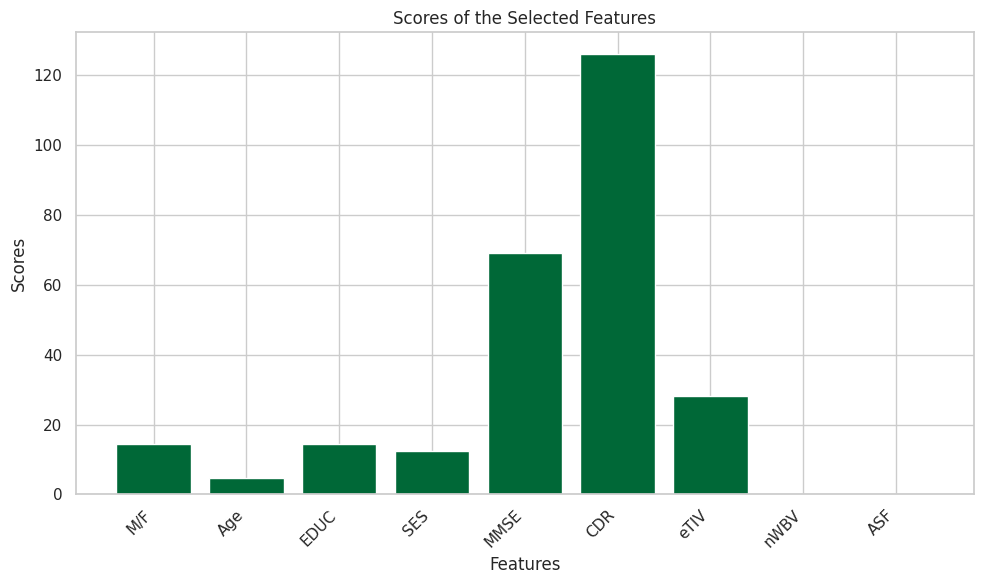

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Scores of the selected features
scores = [1.440e+01, 4.696e+00, 1.432e+01, 1.236e+01, 6.919e+01, 1.260e+02, 2.815e+01, 7.039e-02, 1.221e-02]
feature_names = X_imputed.columns

# Create a colormap 'RdYlGn'
colormap = cm.get_cmap('RdYlGn')

# Create a bar plot with mapped colors
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_names, scores, color=colormap(scores))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Scores of the Selected Features')
plt.tight_layout()

plt.show()


# To implement K-Fold Cross-Validation with your Tensor model dementia model

In [ ]:
import tensorflow as tf
from sklearn.model_selection import KFold

# Set the random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["accuracy"])

# Define the number of folds for K-Fold Cross-Validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store accuracy scores for each fold
accuracy_scores = []

# Perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X_train_norm), 1):
    print(f"Training for fold {fold}...")

    # Get the training and test data for this fold
    X_train_fold, X_val_fold = X_train_norm[train_index], X_train_norm[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit the model to the training data for this fold
    model.fit(X_train_fold, y_train_fold, epochs=300, verbose=0, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the test data for this fold
    _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    accuracy_scores.append(accuracy)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", accuracy_scores)

# Print the average accuracy score across all folds
average_accuracy = sum(accuracy_scores) / n_splits
print("Average accuracy across all folds:", average_accuracy)


Training for fold 1...
Training for fold 2...
Training for fold 3...
Training for fold 4...
Training for fold 5...
Accuracy scores for each fold: [0.949999988079071, 0.9333333373069763, 1.0, 0.9830508232116699, 1.0]
Average accuracy across all folds: 0.9732768297195434


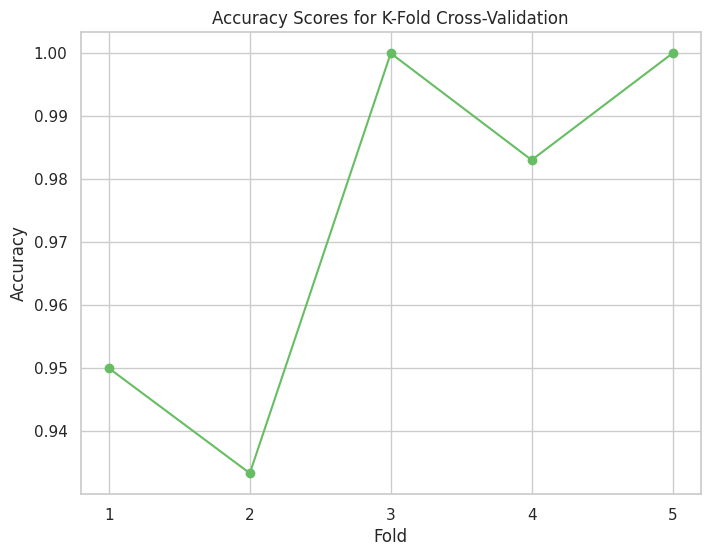

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Plot the accuracy scores
plt.figure(figsize=(8, 6))
colormap = cm.get_cmap('RdYlGn')
plt.plot(range(1, n_splits + 1), accuracy_scores, marker='o', linestyle='-', color=colormap(0.8))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for K-Fold Cross-Validation')
plt.xticks(range(1, n_splits + 1))
plt.grid(True)
plt.show()


# Feature Importance Plot

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming you have already defined X_train and y_train
# Replace 'M' values with NaN (missing values)
X_train = X_train.replace('M', np.nan)

# Handle missing values using the most frequent value in each column
X_train = X_train.fillna(X_train.mode().iloc[0])

# One-hot encode categorical variables
X_train = pd.get_dummies(X_train)

# Convert data to numeric
X_train = X_train.astype(float)

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)

# The rest of your code remains unchanged

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Fit the model to the training data
rf_model.fit(X_train_norm, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort features based on importance
sorted_idx = np.argsort(feature_importances)


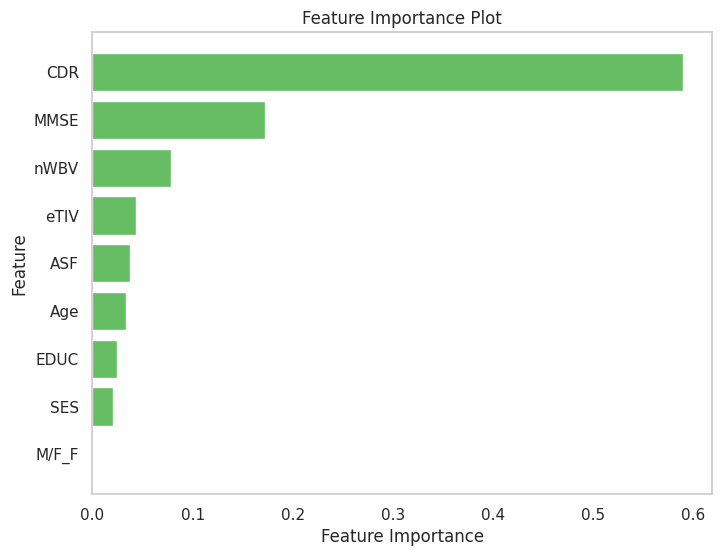

In [ ]:
# Plot feature importances
plt.figure(figsize=(8, 6))
colormap = cm.get_cmap('RdYlGn')
plt.barh(range(X_train.shape[1]), feature_importances[sorted_idx], align='center', color=colormap(0.8))
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])  # Use column names from X_train
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.grid()
plt.show()

# Prediction Visualization on Test Data

3/3 [==============================] - 0s 3ms/step


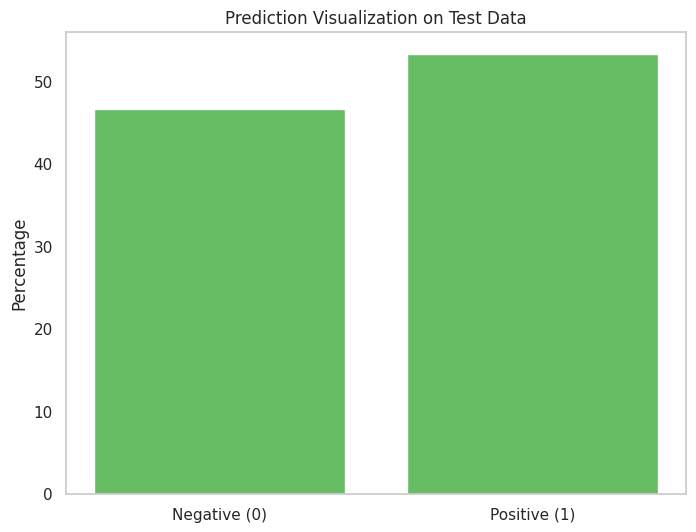

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already predicted the test data and obtained y_preds
y_preds = model.predict(X_test_norm)

# Threshold the predictions to get binary classes (0 or 1)
y_preds[y_preds > 0.5] = 1
y_preds[y_preds < 0.5] = 0

# Count the occurrences of 0s and 1s in y_preds
count_zeros = np.sum(y_preds == 0)
count_ones = np.sum(y_preds == 1)

# Calculate the percentage of each class
percentage_zeros = count_zeros / len(y_preds) * 100
percentage_ones = count_ones / len(y_preds) * 100

# Create a bar plot to visualize the predictions
plt.figure(figsize=(8, 6))
colormap = cm.get_cmap('RdYlGn')
plt.bar([0, 1], [percentage_zeros, percentage_ones], align='center', color=colormap(0.8))
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])
plt.ylabel('Percentage')
plt.title('Prediction Visualization on Test Data')
plt.grid()
plt.show()



# Actual Data vs. Model Predictions on Test Data



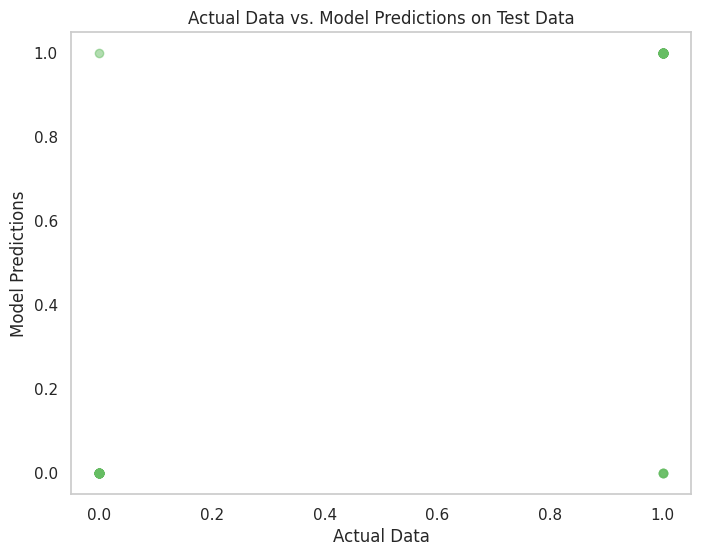

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already defined y_test and y_preds
# y_test contains the true labels for the test data
# y_preds contains the model predictions on the test data

# Convert the predictions to binary values using a threshold of 0.5
y_preds_binary = np.where(y_preds > 0.5, 1, 0)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
colormap = cm.get_cmap('RdYlGn')
plt.scatter(y_test, y_preds_binary, alpha=0.5, color=colormap(0.8))
plt.xlabel('Actual Data')
plt.ylabel('Model Predictions')
plt.title('Actual Data vs. Model Predictions on Test Data')
plt.grid()
plt.show()


# Confusion Matrix for Predicted Negative , Predicted Positive, Actual Negative, Actual Positive

3/3 [==============================] - 0s 3ms/step


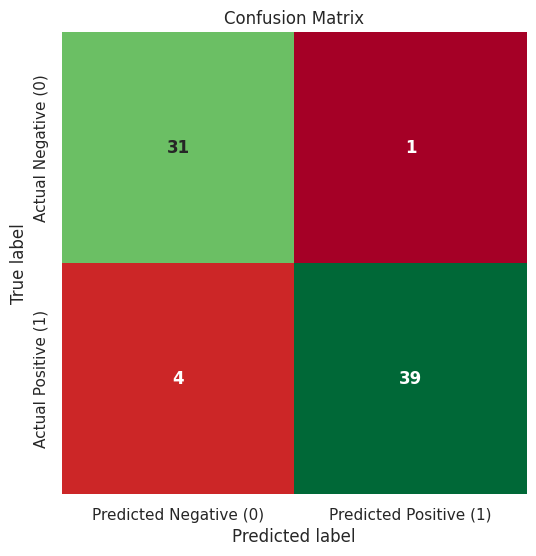

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_preds = model.predict(X_test_norm)

# Convert the probabilities to class labels (0 or 1) based on a threshold of 0.5
y_preds_classes = (y_preds > 0.5).astype(int)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_preds_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap= 'RdYlGn', cbar=False,
            annot_kws={'weight': 'bold'},  # Make the numbers inside the boxes bold
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['Actual Negative (0)', 'Actual Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


# Performance comparison of different ML models

<Figure size 1200x800 with 0 Axes>

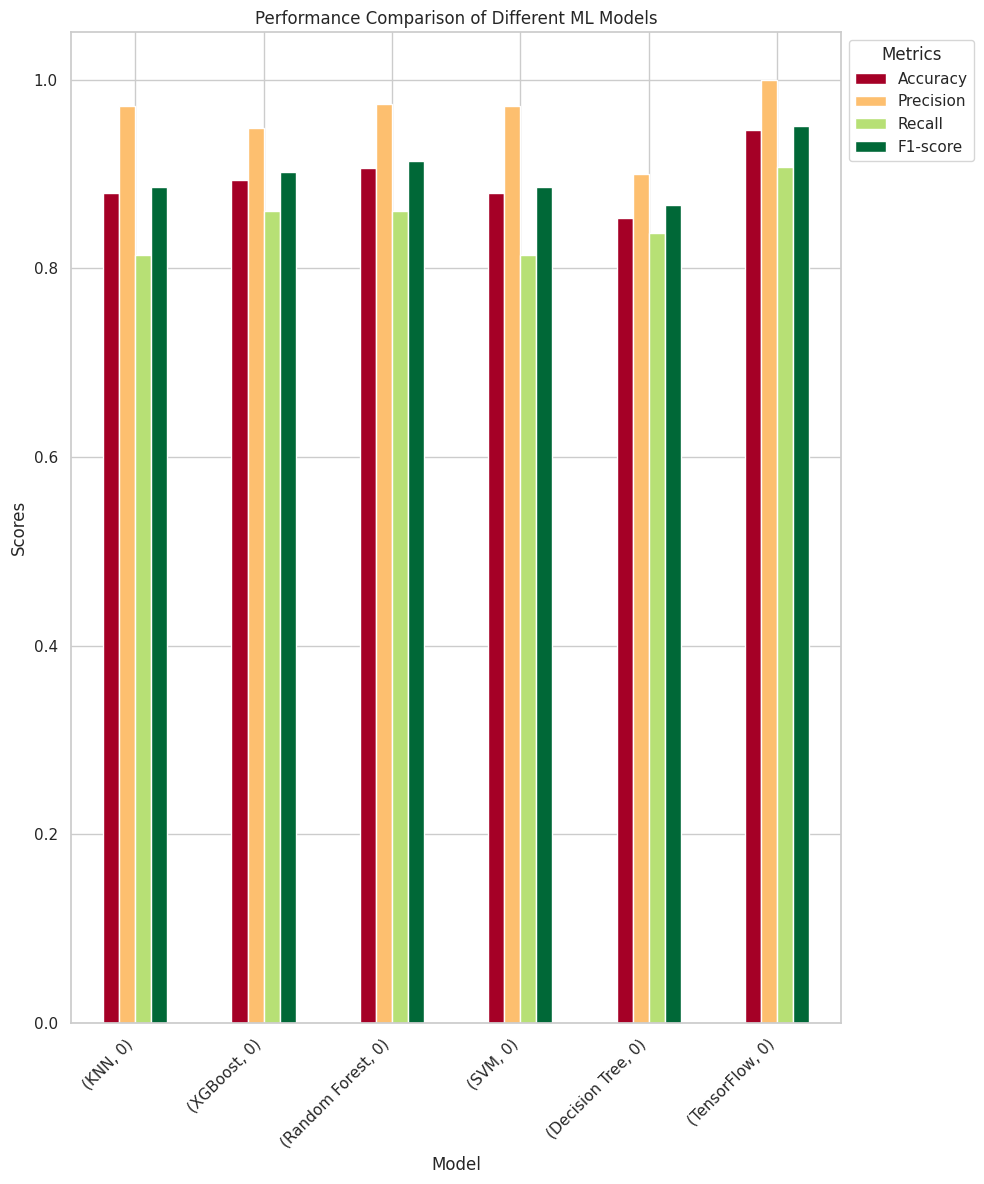

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the dataframes knn_results_df, xgb_results_df, rf_results_df, svm_results_df, dt_results_df, tf_results_df

# Combine the results dataframes into a single dataframe with 'Model' as the index
combined_df = pd.concat(
    [knn_results_df, xgb_results_df, rf_results_df, svm_results_df, dt_results_df, tf_results_df],
    keys=['KNN', 'XGBoost', 'Random Forest', 'SVM', 'Decision Tree', 'TensorFlow']
)

# Plot the bar graph
plt.figure(figsize=(12, 8))
combined_df.plot(kind='bar', colormap='RdYlGn')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Performance Comparison of Different ML Models')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


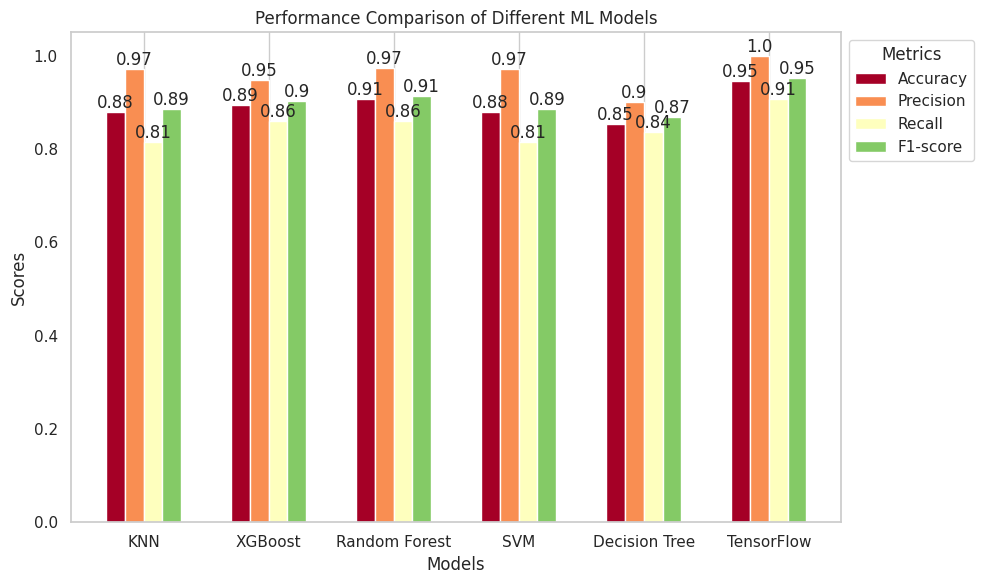

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Assuming you have the dataframes knn_results_df, xgb_results_df, rf_results_df, svm_results_df, dt_results_df, tf_results_df

# Combine the results dataframes into a single dataframe with 'Model' as the index
combined_df = pd.concat(
    [knn_results_df, xgb_results_df, rf_results_df, svm_results_df, dt_results_df, tf_results_df],
    keys=['KNN', 'XGBoost', 'Random Forest', 'SVM', 'Decision Tree', 'TensorFlow']
)

# Select the columns for performance metrics (Accuracy, Precision, Recall, F1-score)
performance_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
result_values = combined_df[performance_metrics].values

# Get the number of models
num_models = len(combined_df)

# Get the number of performance metrics
num_metrics = len(performance_metrics)

# Create a bar plot for each metric
plt.figure(figsize=(10, 6))
bar_width = 0.15
bar_positions = np.arange(num_models)
color_map = cm.get_cmap('RdYlGn')

for i in range(num_metrics):
    plt.bar(bar_positions + (i * bar_width), result_values[:, i], width=bar_width, label=performance_metrics[i], color=color_map(i / num_metrics))

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Comparison of Different ML Models')
plt.xticks(bar_positions + bar_width * (num_metrics - 1) / 2, ['KNN', 'XGBoost', 'Random Forest', 'SVM', 'Decision Tree', 'TensorFlow'])
plt.legend(title='Metrics', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.tight_layout()

# Print the numerical values on top of the bars
for i in range(num_models):
    for j in range(num_metrics):
        plt.text(bar_positions[i] + (j * bar_width), result_values[i, j], str(round(result_values[i, j], 2)), ha='center', va='bottom')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the dataframes knn_results_df, xgb_results_df, rf_results_df, svm_results_df, dt_results_df, tf_results_df

# Combine the results dataframes into a single dataframe with 'Model' as the index
combined_df = pd.concat(
    [knn_results_df, xgb_results_df, rf_results_df, svm_results_df, dt_results_df, tf_results_df],
    keys=['KNN', 'XGBoost', 'Random Forest', 'SVM', 'Decision Tree', 'TensorFlow']
)

# Select the columns for performance metrics (Accuracy, Precision, Recall, F1-score)
performance_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Create a table to display the results
table_df = combined_df[performance_metrics].apply(pd.to_numeric)
table_df.index = combined_df.index.levels[0]

# Display the table
table_df.style.background_gradient(cmap='RdYlGn')


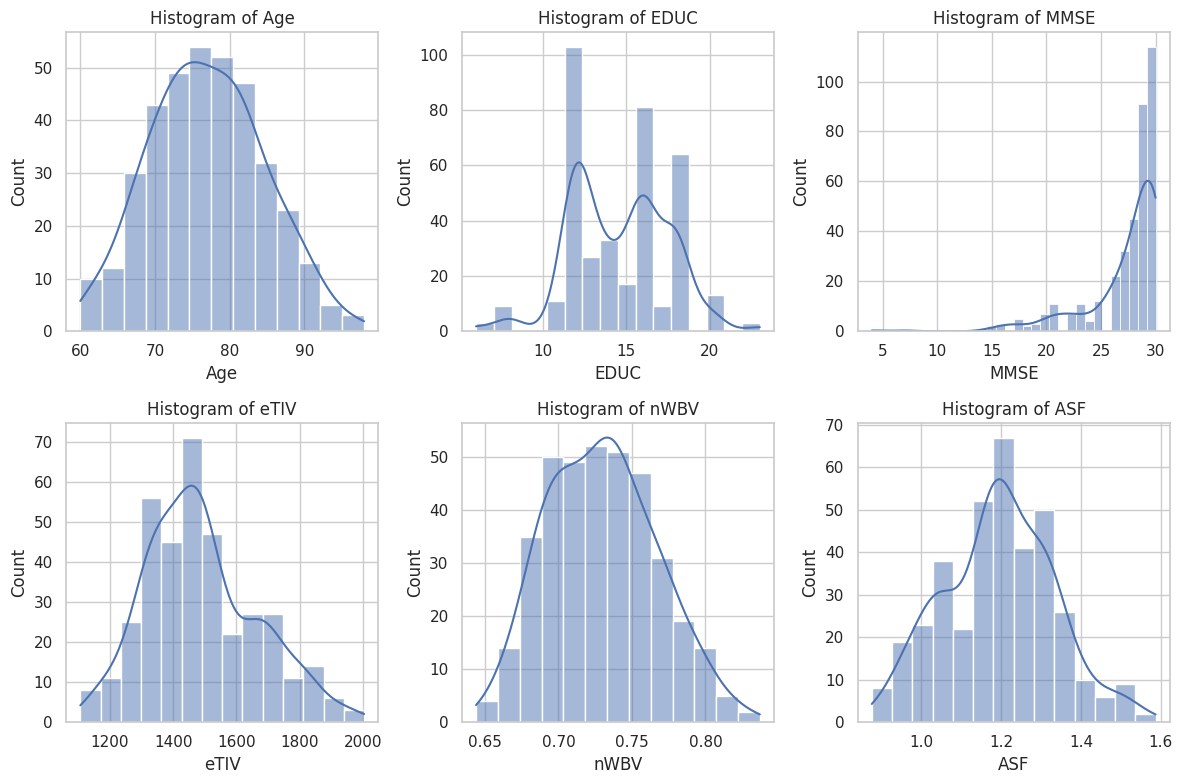

In [ ]:
plt.figure(figsize=(12, 8))
numerical_vars = ['Age', 'EDUC', 'MMSE', 'eTIV', 'nWBV', 'ASF']
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], kde=True, palette='RdYlGn')
    plt.title(f'Histogram of {var}')
plt.tight_layout()
plt.show()

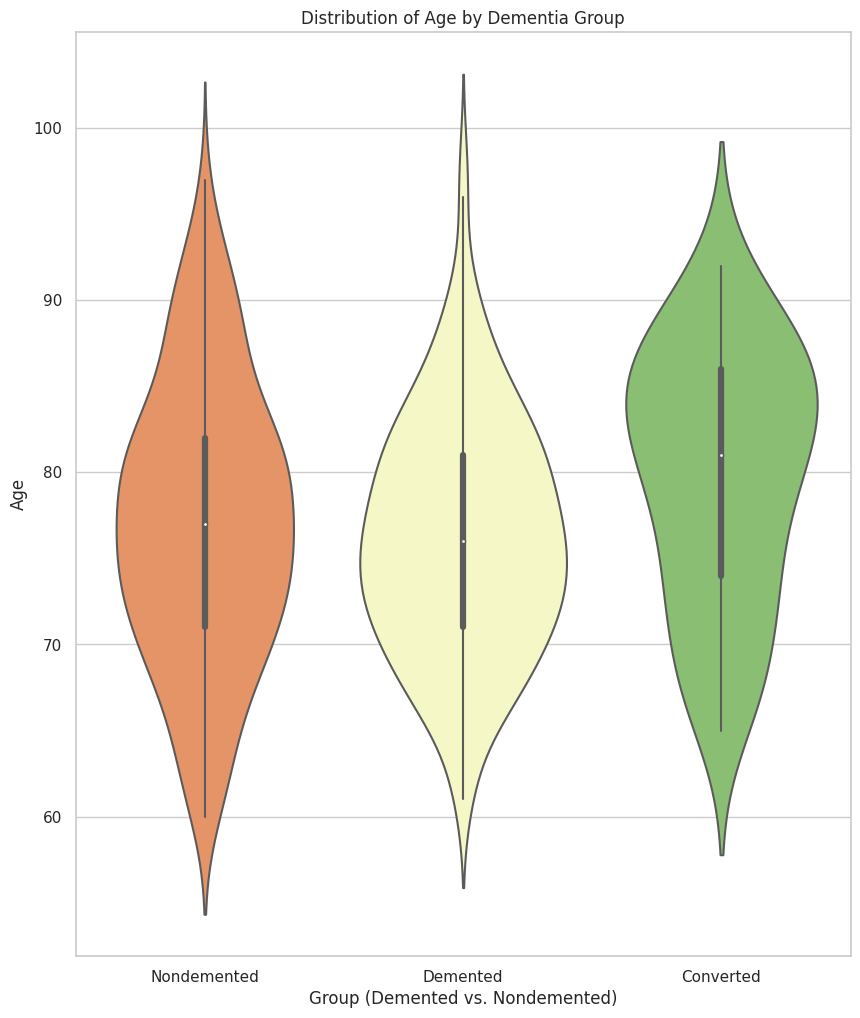

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the required data
# If not, replace 'data' with your actual DataFrame variable name

# Set the style for the plot
sns.set(style="whitegrid")

# Create the violin plot
sns.violinplot(x='Group', y='Age', data=df, palette='RdYlGn')

# Set the labels and title
plt.title('Distribution of Age by Dementia Group')
plt.xlabel('Group (Demented vs. Nondemented)')
plt.ylabel('Age')

# Show the plot
plt.show()


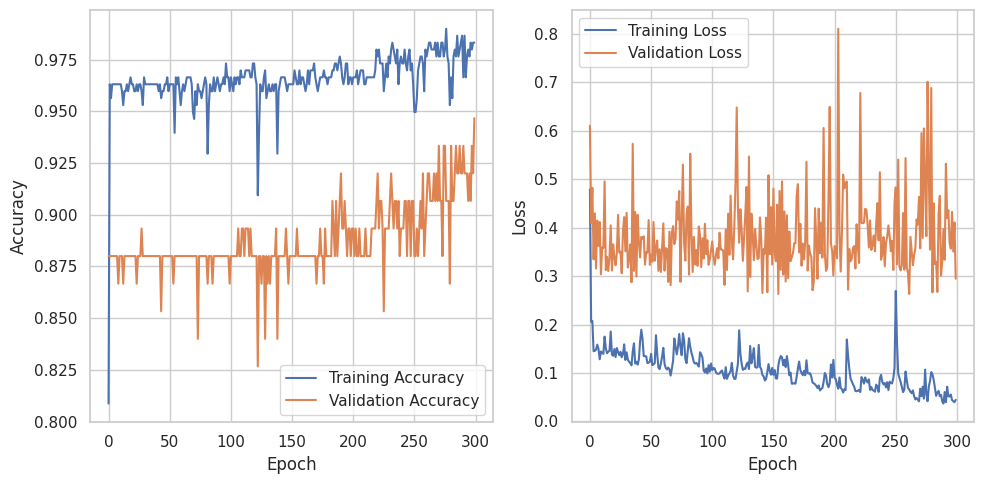

In [ ]:

# Plot Learning Curves
def plot_learning_curves(history):
    plt.figure(figsize=(10, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the learning curves
plot_learning_curves(history)


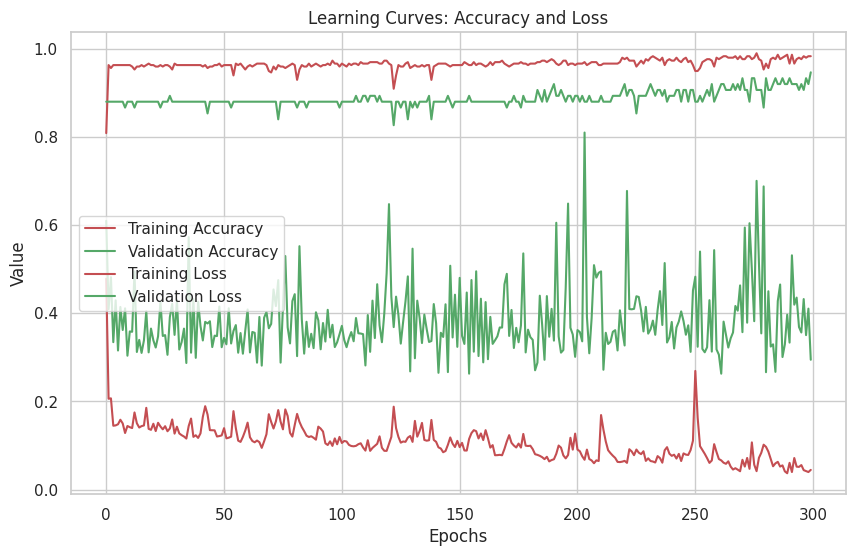

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Set the random seed
tf.random.set_seed(42)

# Access the training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Create a figure and subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the training and validation accuracy curves
ax.plot(training_accuracy, label='Training Accuracy', color='r')
ax.plot(validation_accuracy, label='Validation Accuracy', color='g')

# Plot the training and validation loss curves
ax.plot(training_loss, label='Training Loss', color='r')
ax.plot(validation_loss, label='Validation Loss', color='g')

# Set the axis labels and title
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')
ax.set_title('Learning Curves: Accuracy and Loss')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()


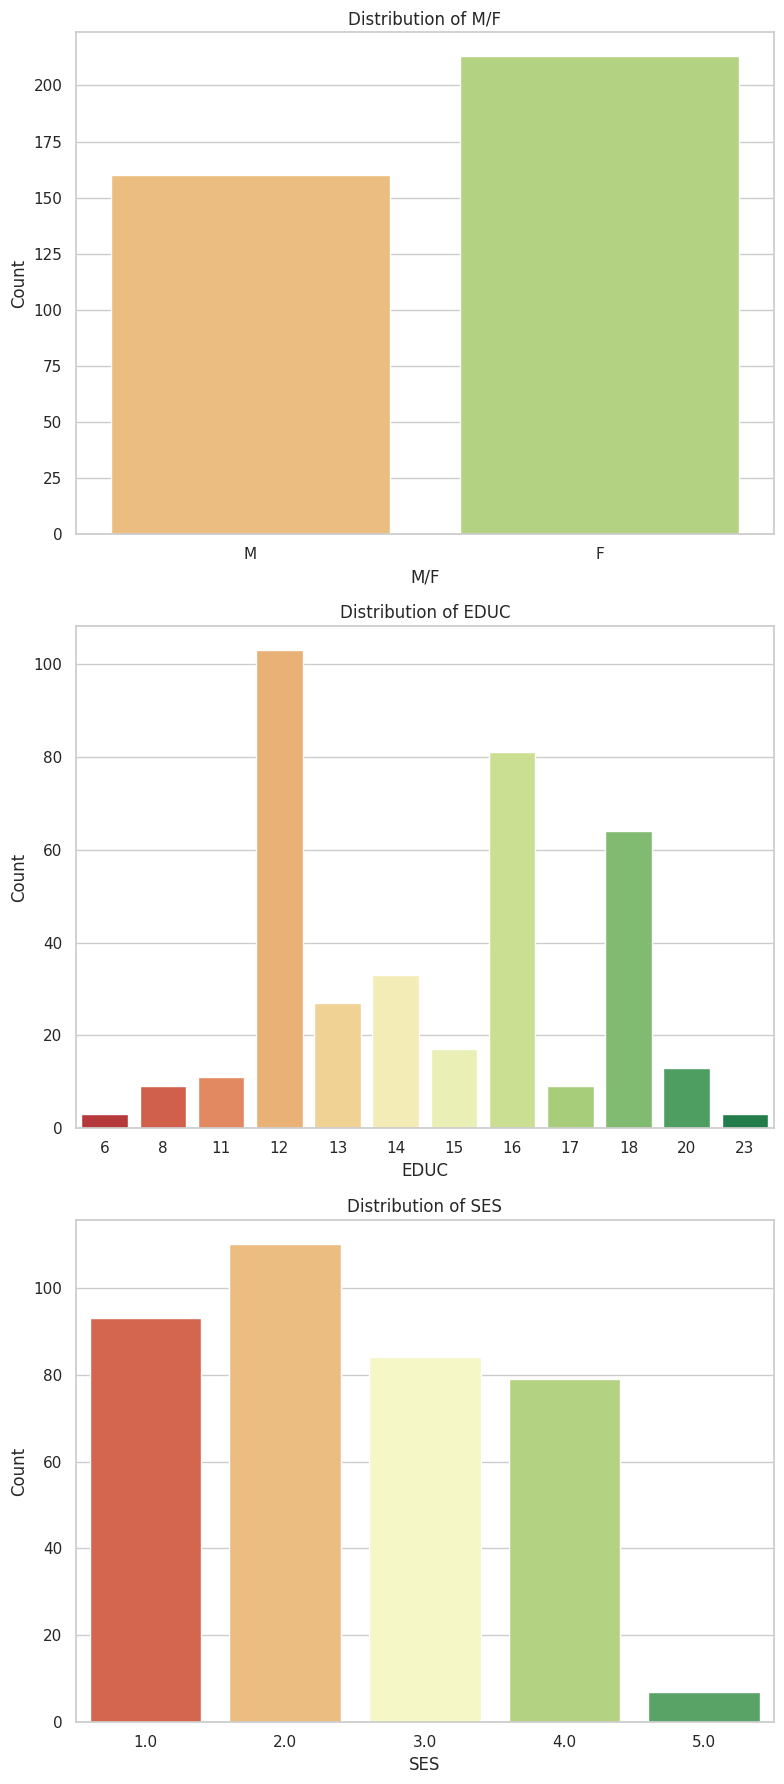

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the required data
# If not, replace 'data' with your actual DataFrame variable name

# Set the style for the plot
sns.set(style="whitegrid")

# Categorical attributes to be plotted
categorical_attributes = ['M/F', 'EDUC', 'SES']

# Create subplots based on the number of categorical attributes
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(8, 6 * len(categorical_attributes)))

# Loop through the categorical attributes and create bar plots
for i, attr in enumerate(categorical_attributes):
    sns.countplot(x=attr, data=data, palette='RdYlGn', ax=axes[i])
    axes[i].set_title(f'Distribution of {attr}')
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


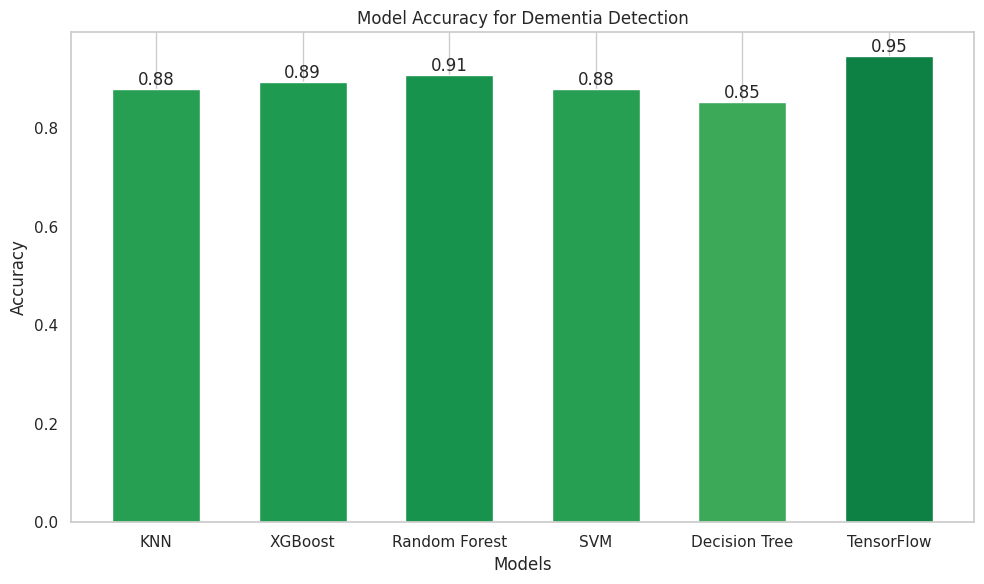

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Assuming you have the dataframes knn_results_df, xgb_results_df, rf_results_df, svm_results_df, dt_results_df, tf_results_df

# Combine the results dataframes into a single dataframe with 'Model' as the index
combined_df = pd.concat(
    [knn_results_df, xgb_results_df, rf_results_df, svm_results_df, dt_results_df, tf_results_df],
    keys=['KNN', 'XGBoost', 'Random Forest', 'SVM', 'Decision Tree', 'TensorFlow']
)

# Select the column for accuracy metric
performance_metric = 'Accuracy'
result_values = combined_df[performance_metric].values

# Get the number of models
num_models = len(combined_df)

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.6
bar_positions = np.arange(num_models)
color_map = cm.get_cmap('RdYlGn')

plt.bar(bar_positions, result_values, width=bar_width, color=color_map(result_values))

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy for Dementia Detection')
plt.xticks(bar_positions, ['KNN', 'XGBoost', 'Random Forest', 'SVM', 'Decision Tree', 'TensorFlow'])
plt.grid(axis='y')
plt.tight_layout()

# Print the numerical values on top of the bars
for i in range(num_models):
    plt.text(bar_positions[i], result_values[i], f'{result_values[i]:.2f}', ha='center', va='bottom')

plt.show()


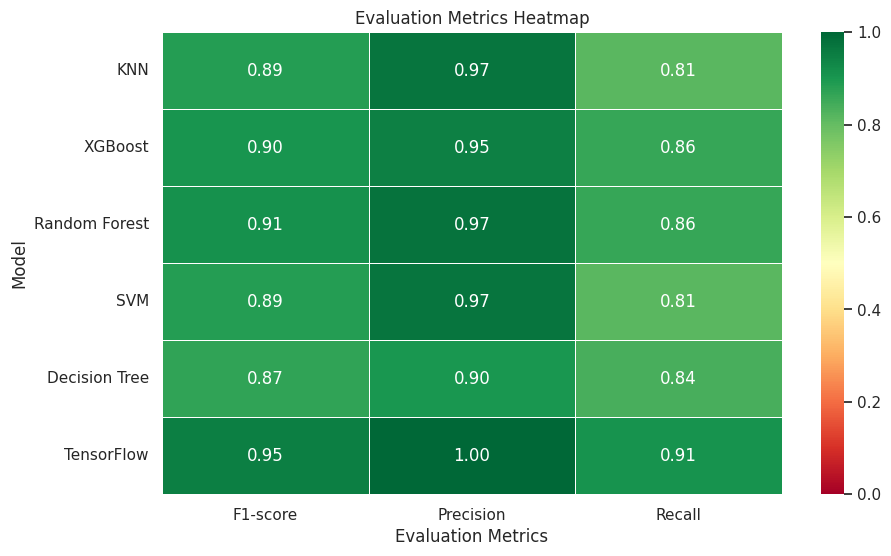

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the dataframes knn_results_df, xgb_results_df, rf_results_df, svm_results_df, dt_results_df, tf_results_df

# Combine the results dataframes into a single dataframe with 'Model' as the index
combined_df = pd.concat(
    [knn_results_df, xgb_results_df, rf_results_df, svm_results_df, dt_results_df, tf_results_df],
    keys=['KNN', 'XGBoost', 'Random Forest', 'SVM', 'Decision Tree', 'TensorFlow']
)

# Select the columns for performance metrics (F1-score, Precision, Recall)
performance_metrics = ['F1-score', 'Precision', 'Recall']

# Create a table to display the results
table_df = combined_df[performance_metrics].apply(pd.to_numeric)
table_df.index = combined_df.index.levels[0]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(table_df, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5, vmin=0, vmax=1)

# Add labels and title
plt.xlabel('Evaluation Metrics')
plt.ylabel('Model')
plt.title('Evaluation Metrics Heatmap')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [ ]:
# Assuming you have the predictions and true labels for each model
# Replace y_preds_knn, y_preds_xgb, y_preds_rf, y_preds_svm, y_preds_dt, y_preds_tf with the corresponding predictions
# Replace y_test with the true labels

# Calculate confusion matrices for each model
xgb_cm = confusion_matrix(y_test, xgb_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)
knn_cm = confusion_matrix(y_test, knn_predictions)
dt_cm = confusion_matrix(y_test, dt_predictions)
tf_cm = confusion_matrix(y_test, tf.round(tf.squeeze(tf.math.abs(y_preds_knn))))

# Create a list of confusion matrices and corresponding model names
confusion_matrices = [knn_cm, xgb_cm, rf_cm, svm_cm, dt_cm, tf_cm]
model_names = ['KNN', 'XGBoost', 'Random Forest', 'SVM', 'Decision Tree', 'TensorFlow']


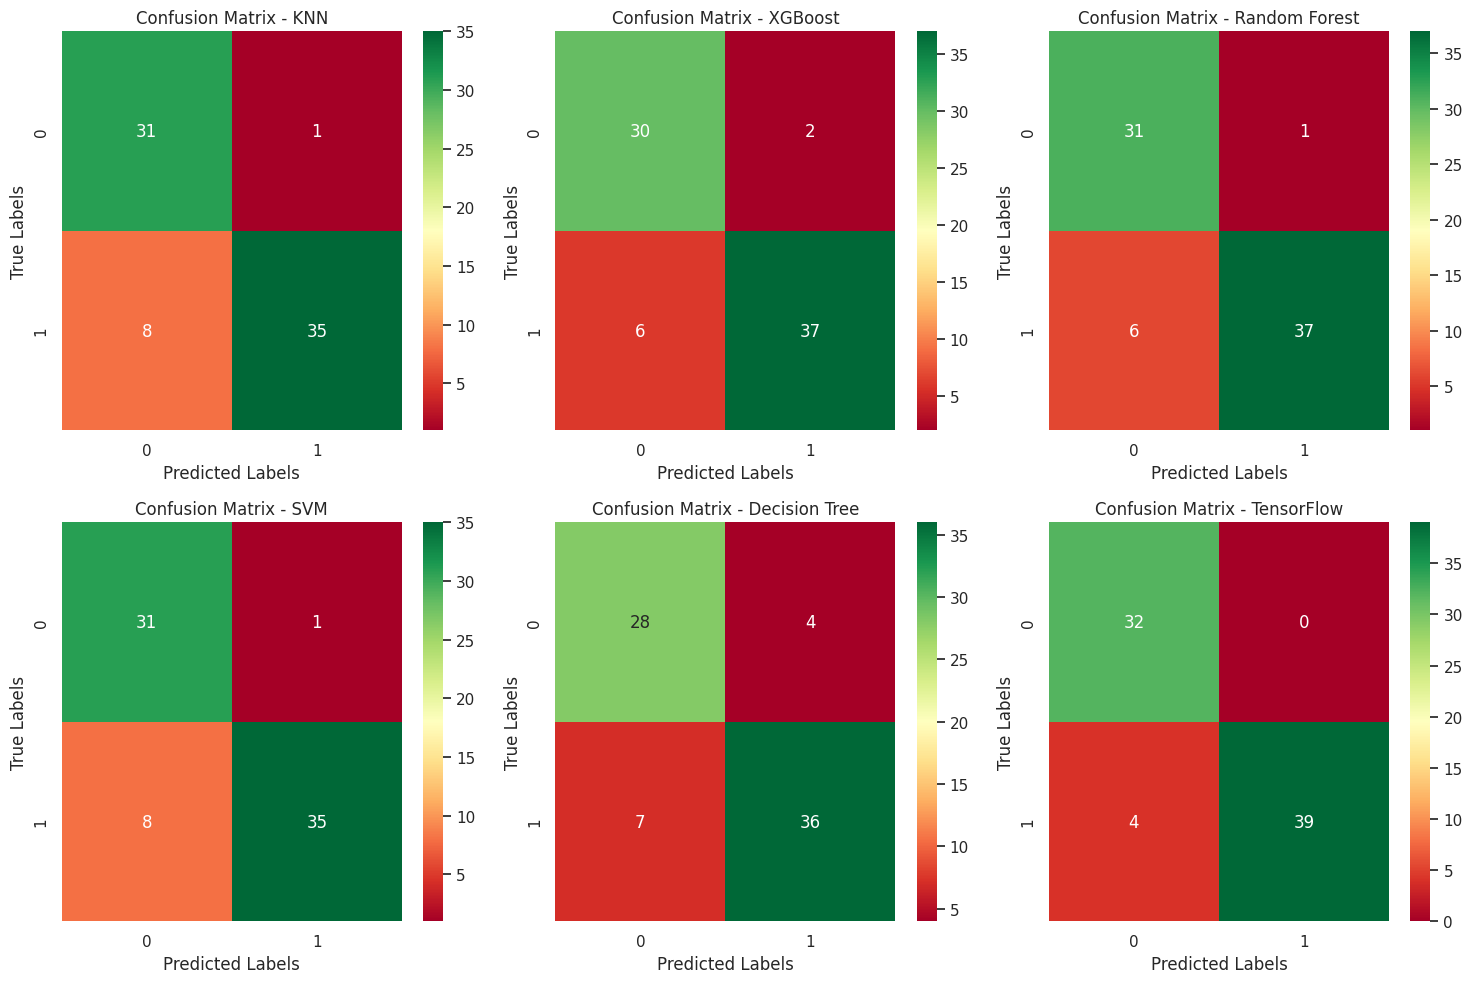

In [ ]:
# Plot confusion matrix heatmaps
plt.figure(figsize=(15, 10))
for i, cm in enumerate(confusion_matrices):
    plt.subplot(2, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn', annot_kws={"size": 12})
    plt.title(f'Confusion Matrix - {model_names[i]}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


#  Feature importance plot for models

# For Random Forest

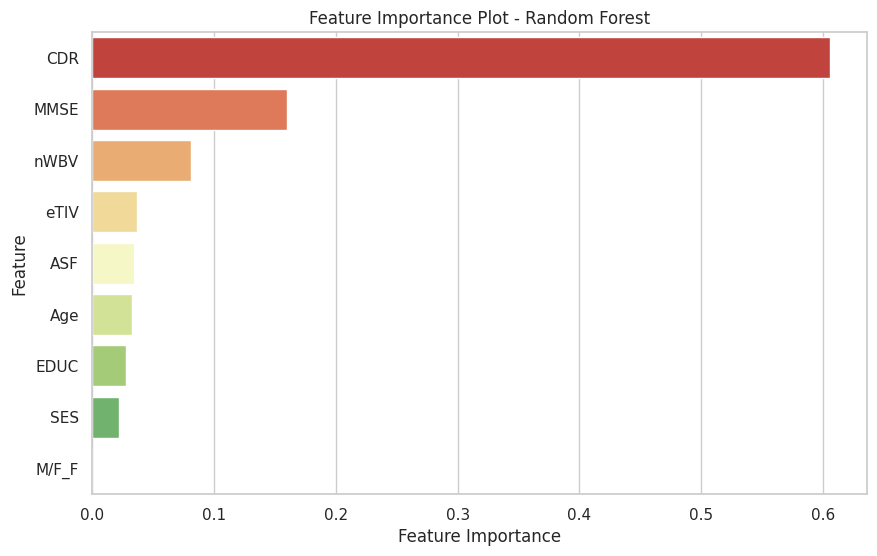

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your training data in X_train and the corresponding labels in y_train

# Create the Random Forest model
rf_model = RandomForestClassifier()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importance_rf = rf_model.feature_importances_

# Get the column names (feature names)
feature_names = X_train.columns

# Create a DataFrame to store the feature importances along with their names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_rf})

# Sort the DataFrame by feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='RdYlGn')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot - Random Forest')
plt.show()


# For XGBoost

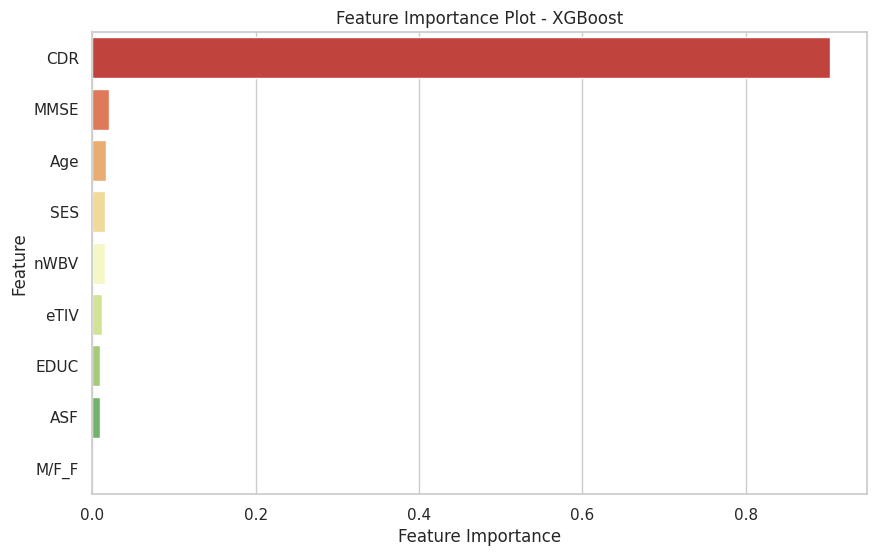

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming you have your training data in X_train and the corresponding labels in y_train

# Create the XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importance_xgb = xgb_model.feature_importances_

# Create a DataFrame to store the feature importances along with their names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_xgb})

# Sort the DataFrame by feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='RdYlGn')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot - XGBoost')
plt.show()


##**Depression Prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/b_depressed.csv")

In [ ]:
data.info()

In [ ]:
data.fillna(method ="ffill", inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [ ]:
data.head()

Survey_id  Ville_id  sex  Age  Married  Number_children  education_level  \
0        926        91    1   28        1                4               10   
1        747        57    1   23        1                3                8   
2       1190       115    1   22        1                3                9   
3       1065        97    1   27        1                2               10   
4        806        42    0   59        0                4               10   

   total_members  gained_asset  durable_asset  ...  incoming_salary  \
0              5      28912201       22861940  ...                0   
1              5      28912201       22861940  ...                0   
2              5      28912201       22861940  ...                0   
3              4      52667108       19698904  ...                0   
4              6      82606287       17352654  ...                1   

   incoming_own_farm  incoming_business  incoming_no_business  \
0                  0                  0                     0   
1                  0                  0                     0   
2                  0                  0                     0   
3                  1                  0                     1   
4                  0                  0                     0   

   incoming_agricultural  farm_expenses  labor_primary  lasting_investment  \
0               30028818       31363432              0            28411718   
1               30028818       31363432              0            28411718   
2               30028818       31363432              0            28411718   
3               22288055       18751329              0             7781123   
4               53384566       20731006              1            20100562   

   no_lasting_investmen  depressed  
0            28292707.0          0  
1            28292707.0          1  
2            28292707.0          0  
3            69219765.0          0  
4            43419447.0          0  

[5 rows x 23 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

<Axes: >

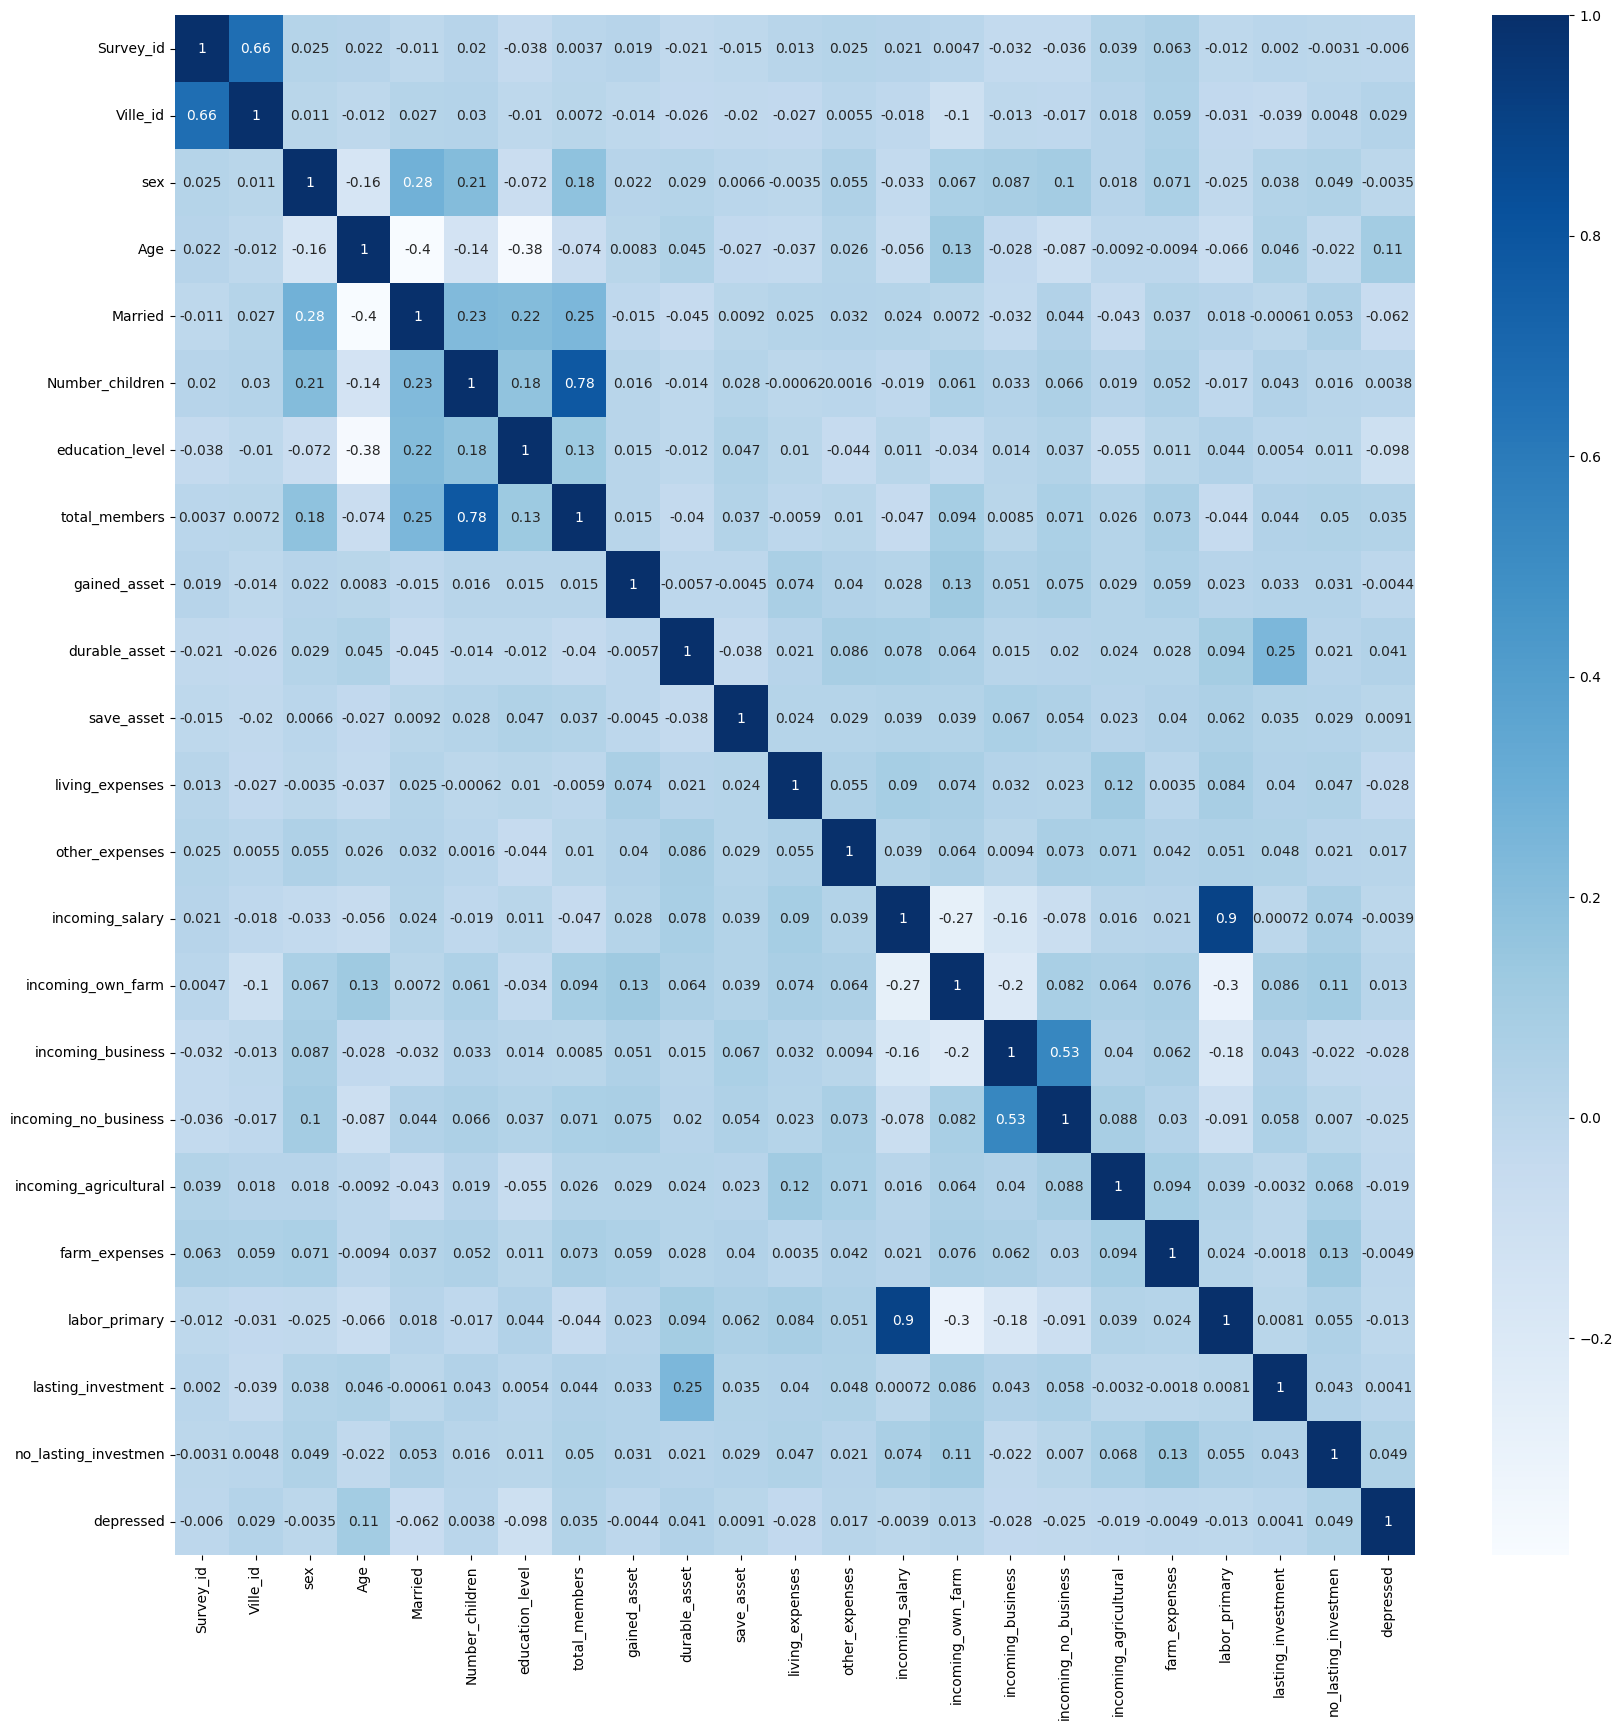

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(data.corr(), annot = True,cmap = "Blues")

In [ ]:
X = data.iloc[: ,2:21]
y = data.iloc[: ,22]

In [ ]:
X.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   sex                    1429 non-null   int64
 1   Age                    1429 non-null   int64
 2   Married                1429 non-null   int64
 3   Number_children        1429 non-null   int64
 4   education_level        1429 non-null   int64
 5   total_members          1429 non-null   int64
 6   gained_asset           1429 non-null   int64
 7   durable_asset          1429 non-null   int64
 8   save_asset             1429 non-null   int64
 9   living_expenses        1429 non-null   int64
 10  other_expenses         1429 non-null   int64
 11  incoming_salary        1429 non-null   int64
 12  incoming_own_farm      1429 non-null   int64
 13  incoming_business      1429 non-null   int64
 14  incoming_no_business   1429 non-null   int64
 15  incoming_agricultural  1429 non-null  

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]),
    remainder = "passthrough"
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
ct.fit(X_train)
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

In [ ]:
X_train_norm.shape, X_train.shape, X_test.shape, y_train.shape

((1143, 19), (1143, 19), (286, 19), (1143,))

In [ ]:
y_test.shape, y_test.shape, y.shape

((286,), (286,), (1429,))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    # tf.keras.layers.Dense(64, activation = 'sigmoid'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    # tf.keras.layers.Dense(32, activation = 'sigmoid'),
    tf.keras.layers.Dense(1, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy'])
history = model.fit(X_train_norm,
          y_train,
          epochs = 100,
          verbose = 1,
          validation_data = (X_test_norm, y_test))

Epoch 1/100
36/36 [==============================] - 2s 8ms/step - loss: 0.6895 - accuracy: 0.7813 - val_loss: 0.6815 - val_accuracy: 0.8357
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.8329 - val_loss: 0.6704 - val_accuracy: 0.8357
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.8329 - val_loss: 0.6597 - val_accuracy: 0.8357
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6551 - accuracy: 0.8329 - val_loss: 0.6494 - val_accuracy: 0.8357
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6450 - accuracy: 0.8329 - val_loss: 0.6395 - val_accuracy: 0.8357
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6354 - accuracy: 0.8329 - val_loss: 0.6300 - val_accuracy: 0.8357
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6262 - accuracy: 0.8329 - val_loss: 0.6209 - val_accuracy: 0.8357
Epoch 8/100
3

In [ ]:
model.evaluate(X_test_norm, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8357


[0.4470353126525879, 0.8356643319129944]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_1 = KNeighborsClassifier()
model_1.fit(X_train_norm, y_train)
model_1.score(X_test_norm, y_test)

0.8076923076923077

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier()
model_2.fit(X_train_norm, y_train)
model_2.score(X_test_norm, y_test)

0.8216783216783217

<Axes: >

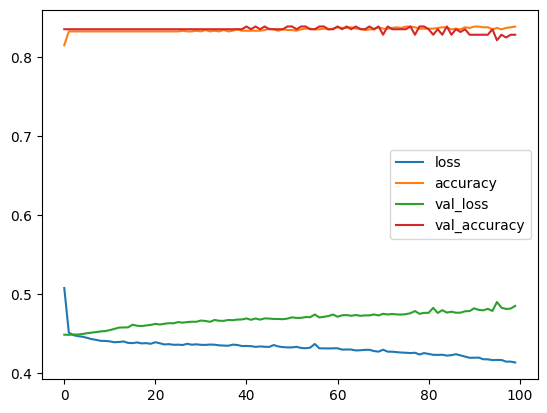

In [ ]:
pd.DataFrame(history.history).plot()

Text(0.5, 1.0, 'accuracy curves')

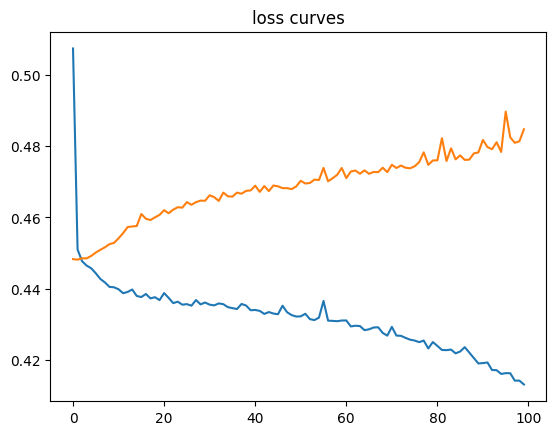

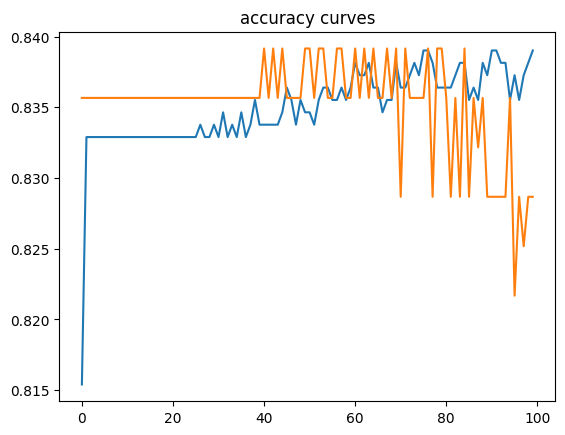

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = np.arange(100)
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("loss curves")
plt.figure()
plt.plot(epochs, accuracy)
plt.plot(epochs, val_acc)
plt.title("accuracy curves")

In [ ]:
# sns.pairplot(data)

##**Heart Diseases Prediction**

**Overview:**
The Heart Disease Dataset from 1988 consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The “target” field refers to the presence of heart disease in the patient, and it is integer valued 0 = no disease and 1 = disease. The dataset includes information such as age, sex, chest pain type, resting blood pressure, serum cholestoral in mg/dl, fasting blood sugar > 120 mg/dl, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak = ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels (0-3) colored by flourosopy and thal: 0 = normal; 1 = fixed defect; 2 = reversible defect. The names and social security numbers of the patients were recently removed from the database and replaced with dummy values

#>> Test accuracy: 90.16%
#>> Train accuracy: 86.0%

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
hd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

In [ ]:
hd.head(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

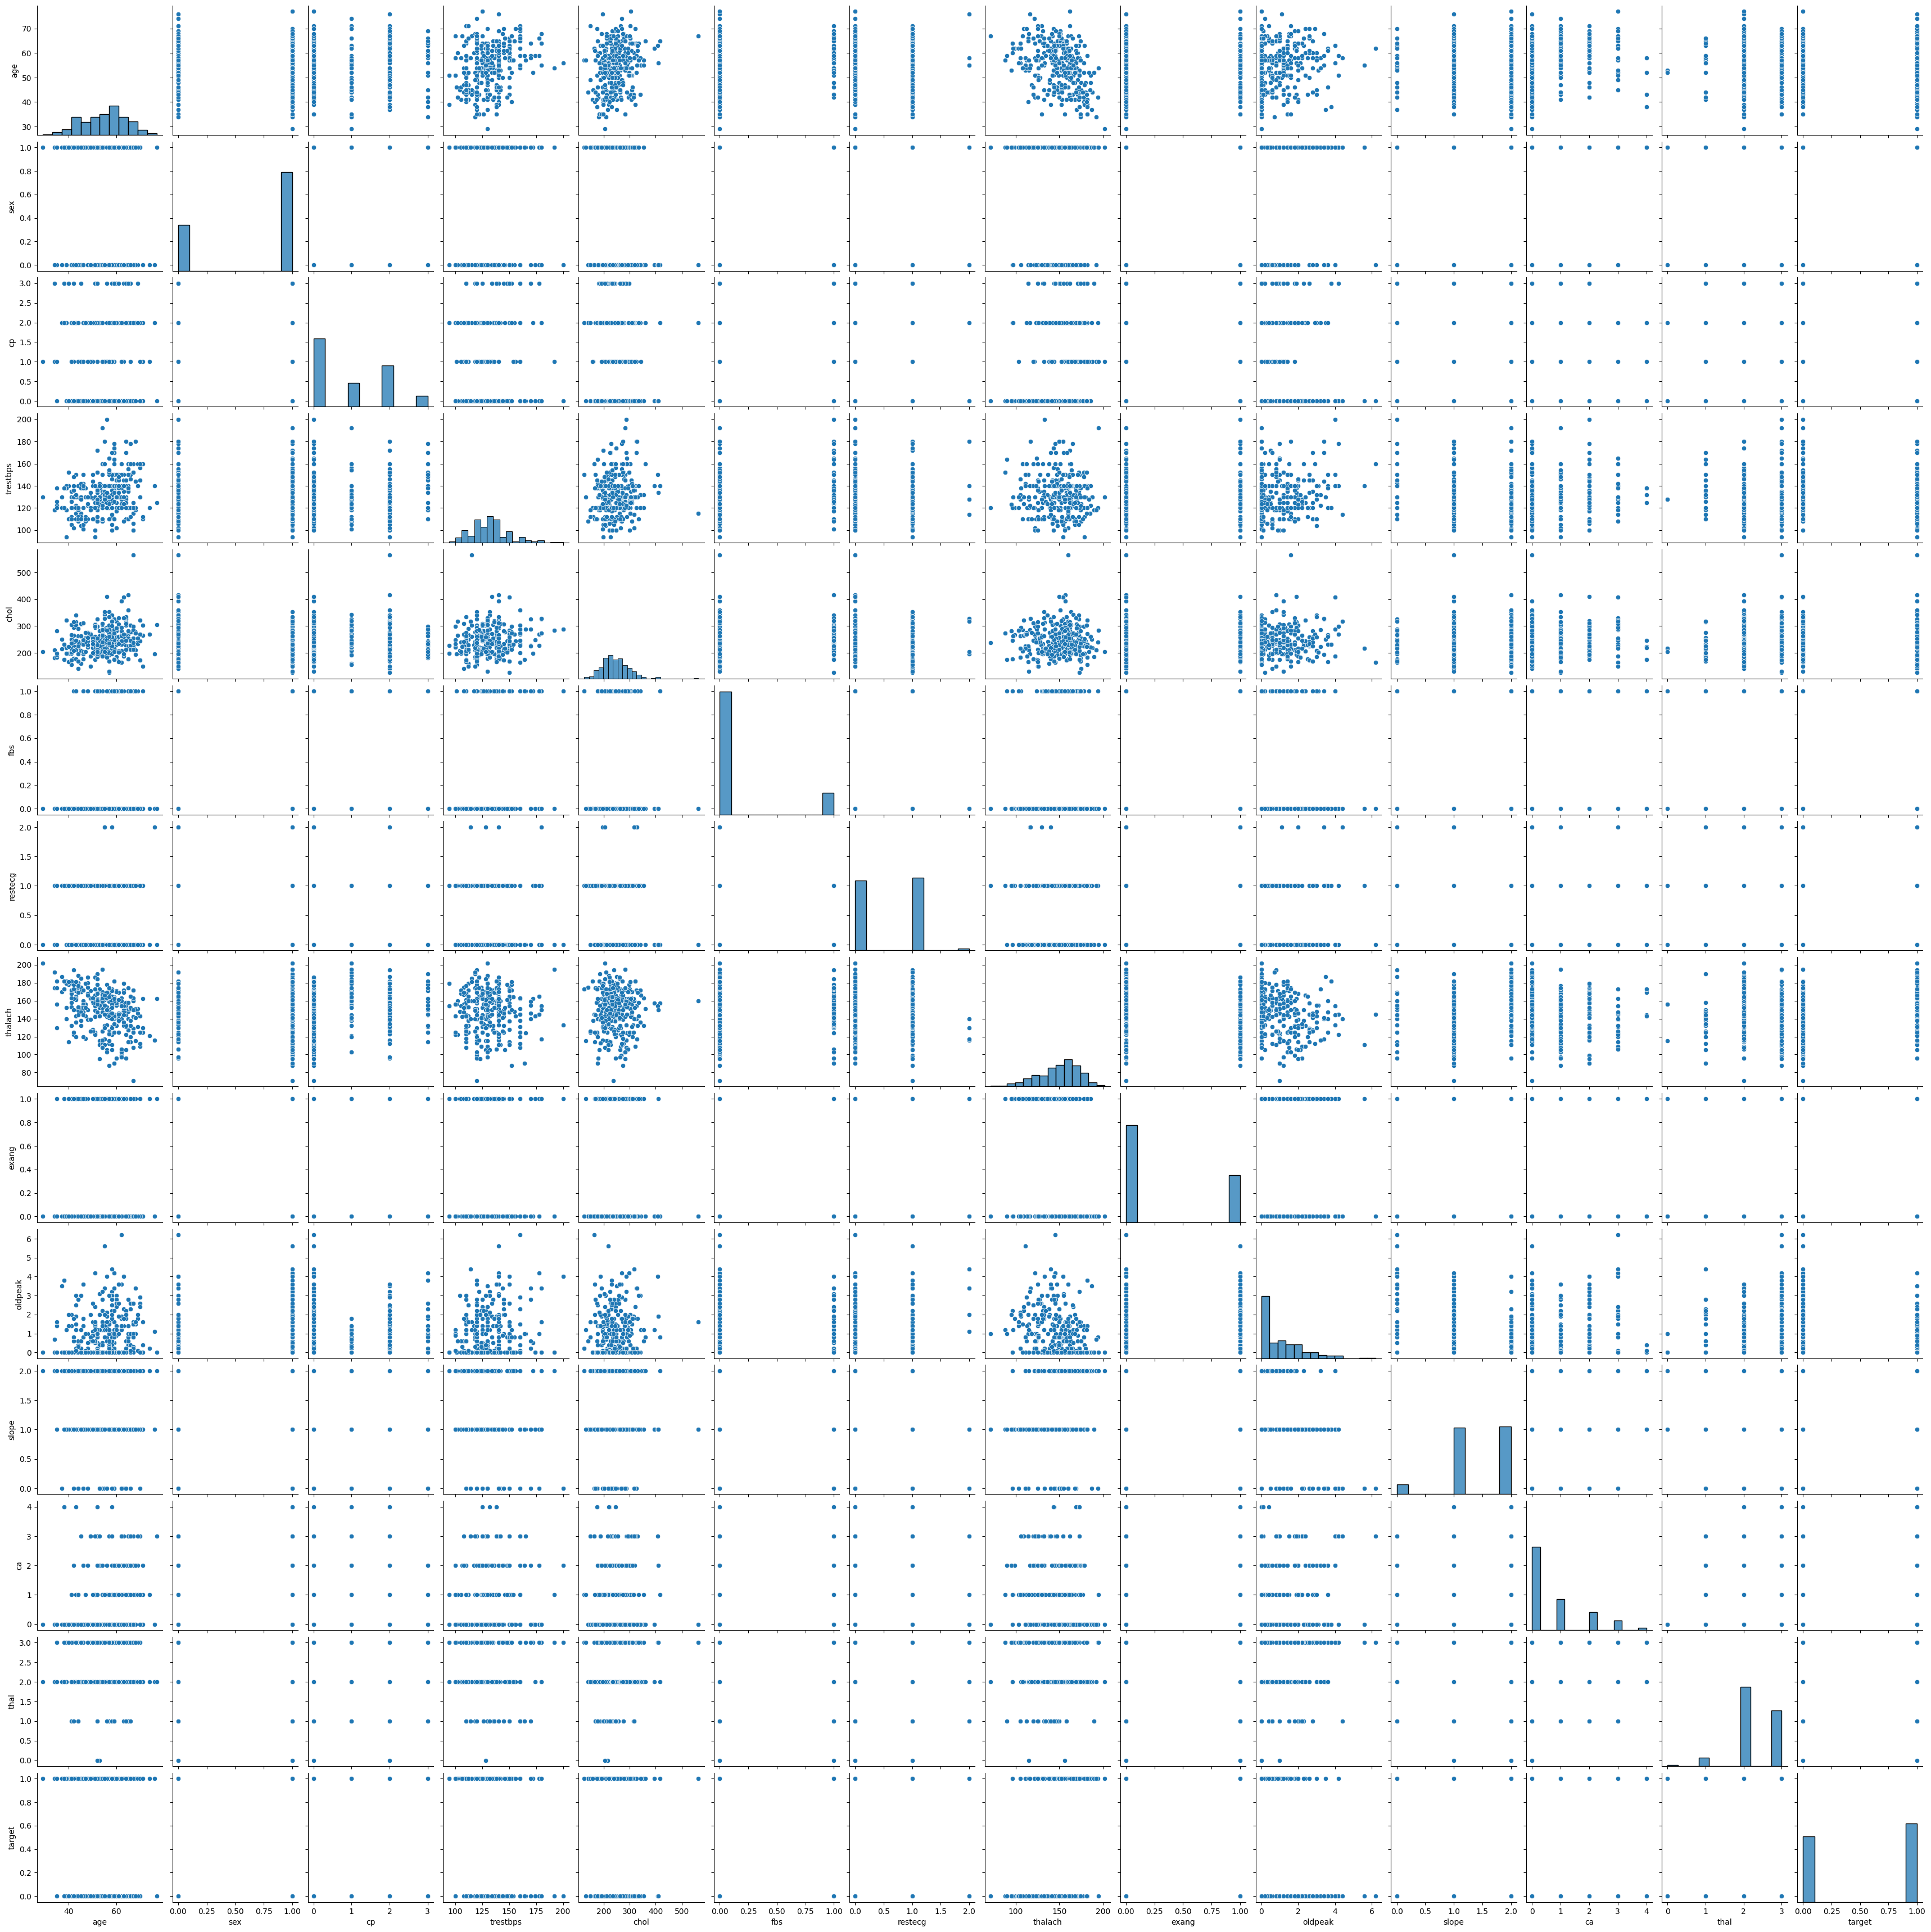

In [ ]:
sns.pairplot(hd)

<Axes: xlabel='target', ylabel='count'>

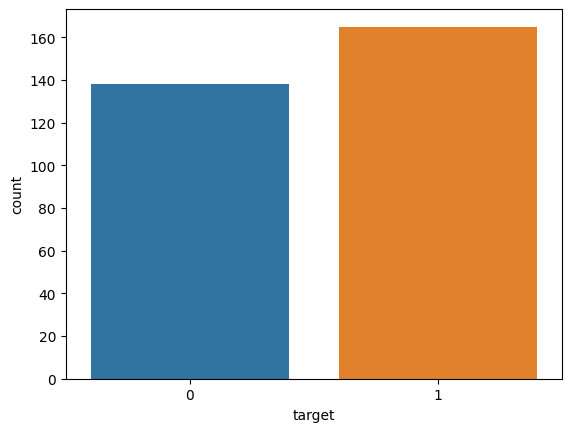

In [ ]:
sns.countplot(x = 'target', data = hd)

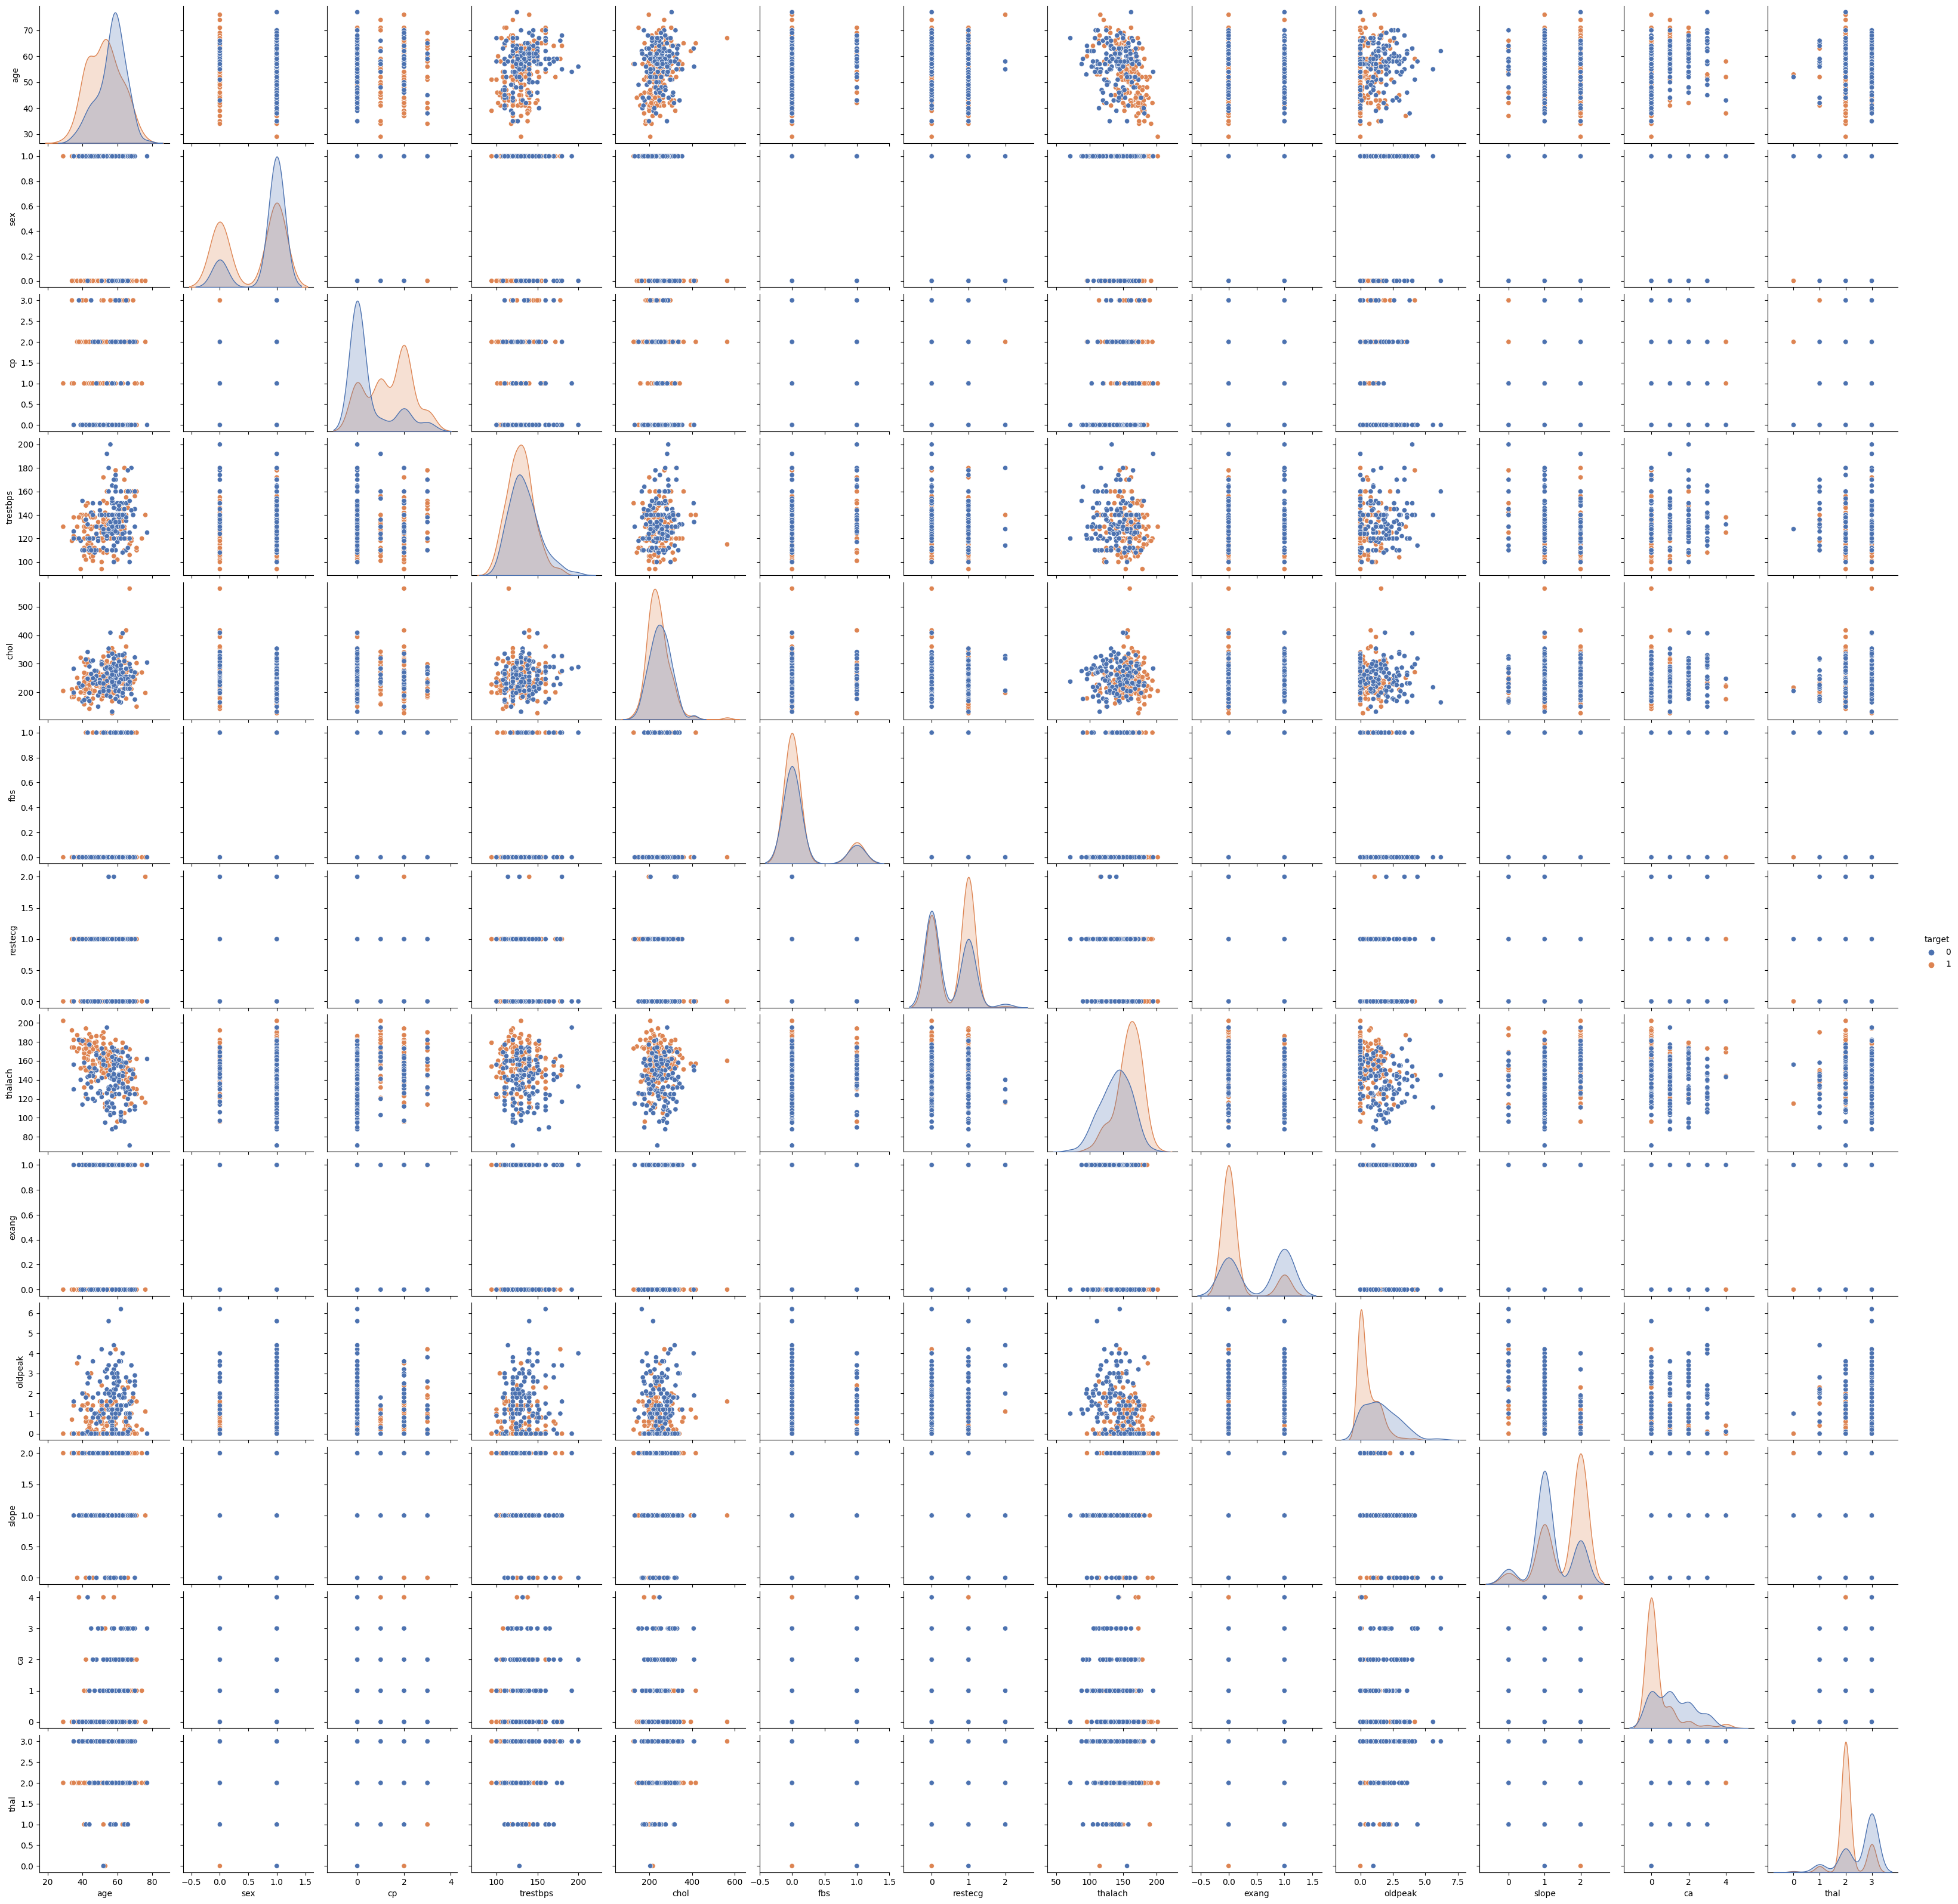

In [ ]:
sns.pairplot(hd, hue = 'target', palette = 'deep')

In [ ]:
selected_features = ['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal']

In [ ]:
X = hd[selected_features]
y = hd['target']

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size = 0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [ ]:
predictor = tf.keras.models.Sequential()
predictor.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (13,)))
predictor.add(tf.keras.layers.Dropout(0.3))
predictor.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))
predictor.add(tf.keras.layers.Dropout(0.3))
predictor.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))
predictor.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
predictor.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
epochs_hist = predictor.fit(X_train,y_train,epochs = 50, batch_size = 125)

Epoch 1/50
2/2 [==============================] - 7s 18ms/step - loss: 0.6894 - accuracy: 0.5496
Epoch 2/50
2/2 [==============================] - 0s 12ms/step - loss: 0.6866 - accuracy: 0.5413
Epoch 3/50
2/2 [==============================] - 0s 10ms/step - loss: 0.6687 - accuracy: 0.5868
Epoch 4/50
2/2 [==============================] - 0s 10ms/step - loss: 0.6744 - accuracy: 0.5826
Epoch 5/50
2/2 [==============================] - 0s 10ms/step - loss: 0.6628 - accuracy: 0.6198
Epoch 6/50
2/2 [==============================] - 0s 9ms/step - loss: 0.6583 - accuracy: 0.6322
Epoch 7/50
2/2 [==============================] - 0s 13ms/step - loss: 0.6556 - accuracy: 0.6281
Epoch 8/50
2/2 [==============================] - 0s 10ms/step - loss: 0.6389 - accuracy: 0.6736
Epoch 9/50
2/2 [==============================] - 0s 14ms/step - loss: 0.6239 - accuracy: 0.6777
Epoch 10/50
2/2 [==============================] - 0s 9ms/step - loss: 0.6311 - accuracy: 0.7025
Epoch 11/50
2/2 [==============

In [ ]:
epochs_hist2 = predictor.fit(X_test,y_test,epochs = 50, batch_size = 125)

Epoch 1/50
1/1 [==============================] - 0s 13ms/step - loss: 0.4225 - accuracy: 0.8033
Epoch 2/50
1/1 [==============================] - 0s 13ms/step - loss: 0.3882 - accuracy: 0.8033
Epoch 3/50
1/1 [==============================] - 0s 13ms/step - loss: 0.3771 - accuracy: 0.8361
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3727 - accuracy: 0.8033
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 0.3588 - accuracy: 0.8361
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 0.3485 - accuracy: 0.8033
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3381 - accuracy: 0.8689
Epoch 8/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3738 - accuracy: 0.8525
Epoch 9/50
1/1 [==============================] - 0s 11ms/step - loss: 0.3471 - accuracy: 0.8197
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 0.3296 - accuracy: 0.8361
Epoch 11/50
1/1 [============

In [ ]:
evaluation = predictor.evaluate(X_test,y_test)
print('test accuracy:{}'.format(evaluation[1]))

2/2 [==============================] - 0s 9ms/step - loss: 0.2120 - accuracy: 0.9016
test accuracy:0.9016393423080444


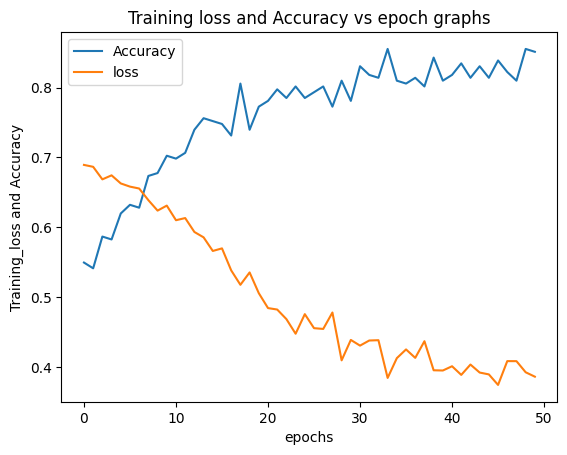

In [ ]:
eh = epochs_hist.history['accuracy']
eh2 = epochs_hist.history['loss']
plt.plot(eh)
plt.plot(eh2)
plt.title('Training loss and Accuracy vs epoch graphs')
plt.xlabel('epochs')
plt.ylabel('Training_loss and Accuracy')
plt.legend({'Accuracy', 'loss'})

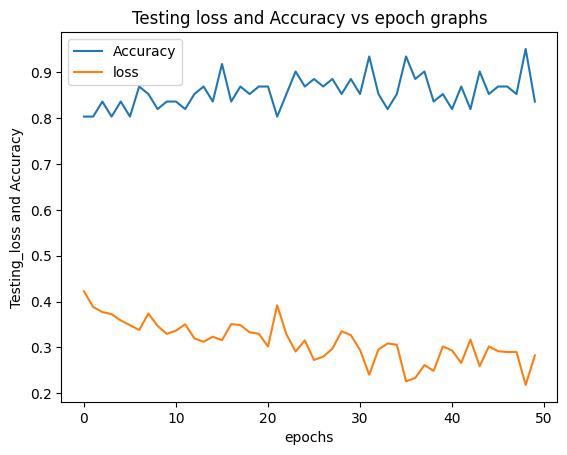

In [ ]:
eh3 = epochs_hist2.history['accuracy']
eh4 = epochs_hist2.history['loss']
plt.plot(eh3)
plt.plot(eh4)
plt.title('Testing loss and Accuracy vs epoch graphs')
plt.xlabel('epochs')
plt.ylabel('Testing_loss and Accuracy')
plt.legend({'Accuracy', 'loss'})

In [ ]:
y_predict = predictor.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [ ]:
y_predict

array([[0.06790783],
       [0.586278  ],
       [0.9425169 ],
       [0.04709786],
       [0.01895456],
       [0.82599235],
       [0.38808683],
       [0.992661  ],
       [0.21170194],
       [0.02937072],
       [0.08674596],
       [0.9857124 ],
       [0.9545423 ],
       [0.35206258],
       [0.01432903],
       [0.82545364],
       [0.22224195],
       [0.03619677],
       [0.98412526],
       [0.04301712],
       [0.01223207],
       [0.04410594],
       [0.05540723],
       [0.24351388],
       [0.02206496],
       [0.38631508],
       [0.99864334],
       [0.9359979 ],
       [0.9994573 ],
       [0.0151796 ],
       [0.76995987],
       [0.9681249 ],
       [0.9982317 ],
       [0.07354492],
       [0.01598702],
       [0.47638997],
       [0.00859284],
       [0.9874467 ],
       [0.9638256 ],
       [0.3919278 ],
       [0.9983695 ],
       [0.84556633],
       [0.9874922 ],
       [0.01696407],
       [0.59630513],
       [0.01499319],
       [0.82557195],
       [0.203

In [ ]:
y_predict = (y_predict > 0.5)

In [ ]:
y_predict

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False]])

8/8 [==============================] - 0s 2ms/step


<Axes: >

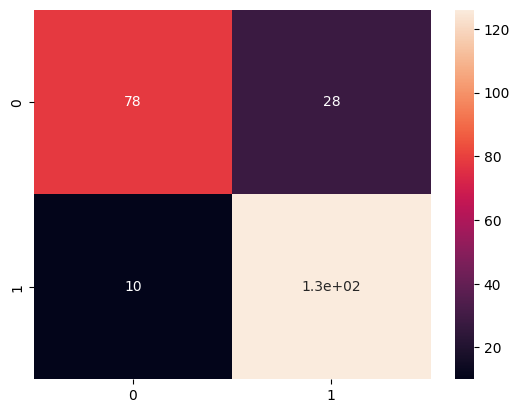

In [ ]:
from sklearn.metrics import confusion_matrix
y_train_pred = predictor.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

       False       0.74      0.89      0.80        88
        True       0.93      0.82      0.87       154

    accuracy                           0.84       242
   macro avg       0.83      0.85      0.84       242
weighted avg       0.86      0.84      0.85       242



<Axes: >

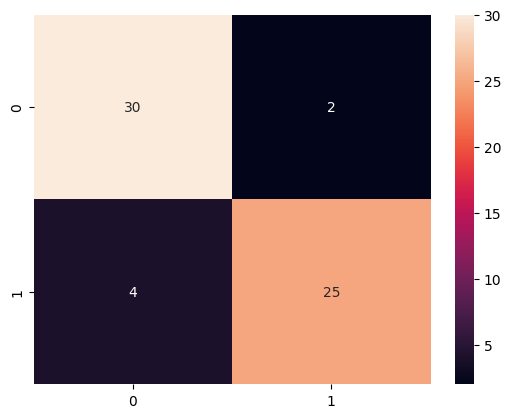

In [ ]:
cm2 = confusion_matrix(y_test, y_predict)
sns.heatmap(cm2, annot = True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.93      0.86      0.89        29

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



##**PCOS Diseases Prediction**

**About disease:**A hormonal disorder causing enlarged ovaries with small cysts on the outer edges.
The cause of polycystic ovary syndrome isn't well understood, but may involve a combination of genetic and environmental factors.
Symptoms include menstrual irregularity, excess hair growth, acne and obesity.
Treatments include birth control pills to regularise periods, medication called metformin to prevent diabetes, statins to control high cholesterol, hormones to increase fertility and procedures to remove excess hair.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
pcos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PCOS_data.csv')

In [ ]:
pcos.head(5)

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  Pimples(Y/N)  \
0  19.3           15                78                22  ...             0   
1  24.9           15                74                20  ...             0   
2  25.3           11                72                18  ...             1   
3  29.7           13                72                20  ...             0   
4  20.1           11                72                18  ...             0   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110   
1              0.0                  0                  120   
2              1.0                  0                  120   
3              0.0                  0                  120   
4              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

   Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                  18.0                  18.0               8.5  
1                  15.0                  14.0               3.7  
2                  18.0                  20.0              10.0  
3                  15.0                  14.0               7.5  
4                  16.0                  14.0               7.0  

[5 rows x 44 columns]

<Axes: xlabel='PCOS (Y/N)', ylabel='count'>

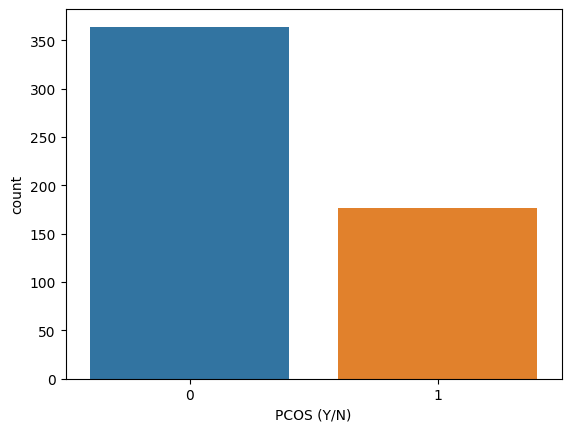

In [ ]:
sns.countplot(x = 'PCOS (Y/N)', data = pcos)

<ipython-input-45-6951671a97fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pcos.corr(), annot = True)


<Axes: >

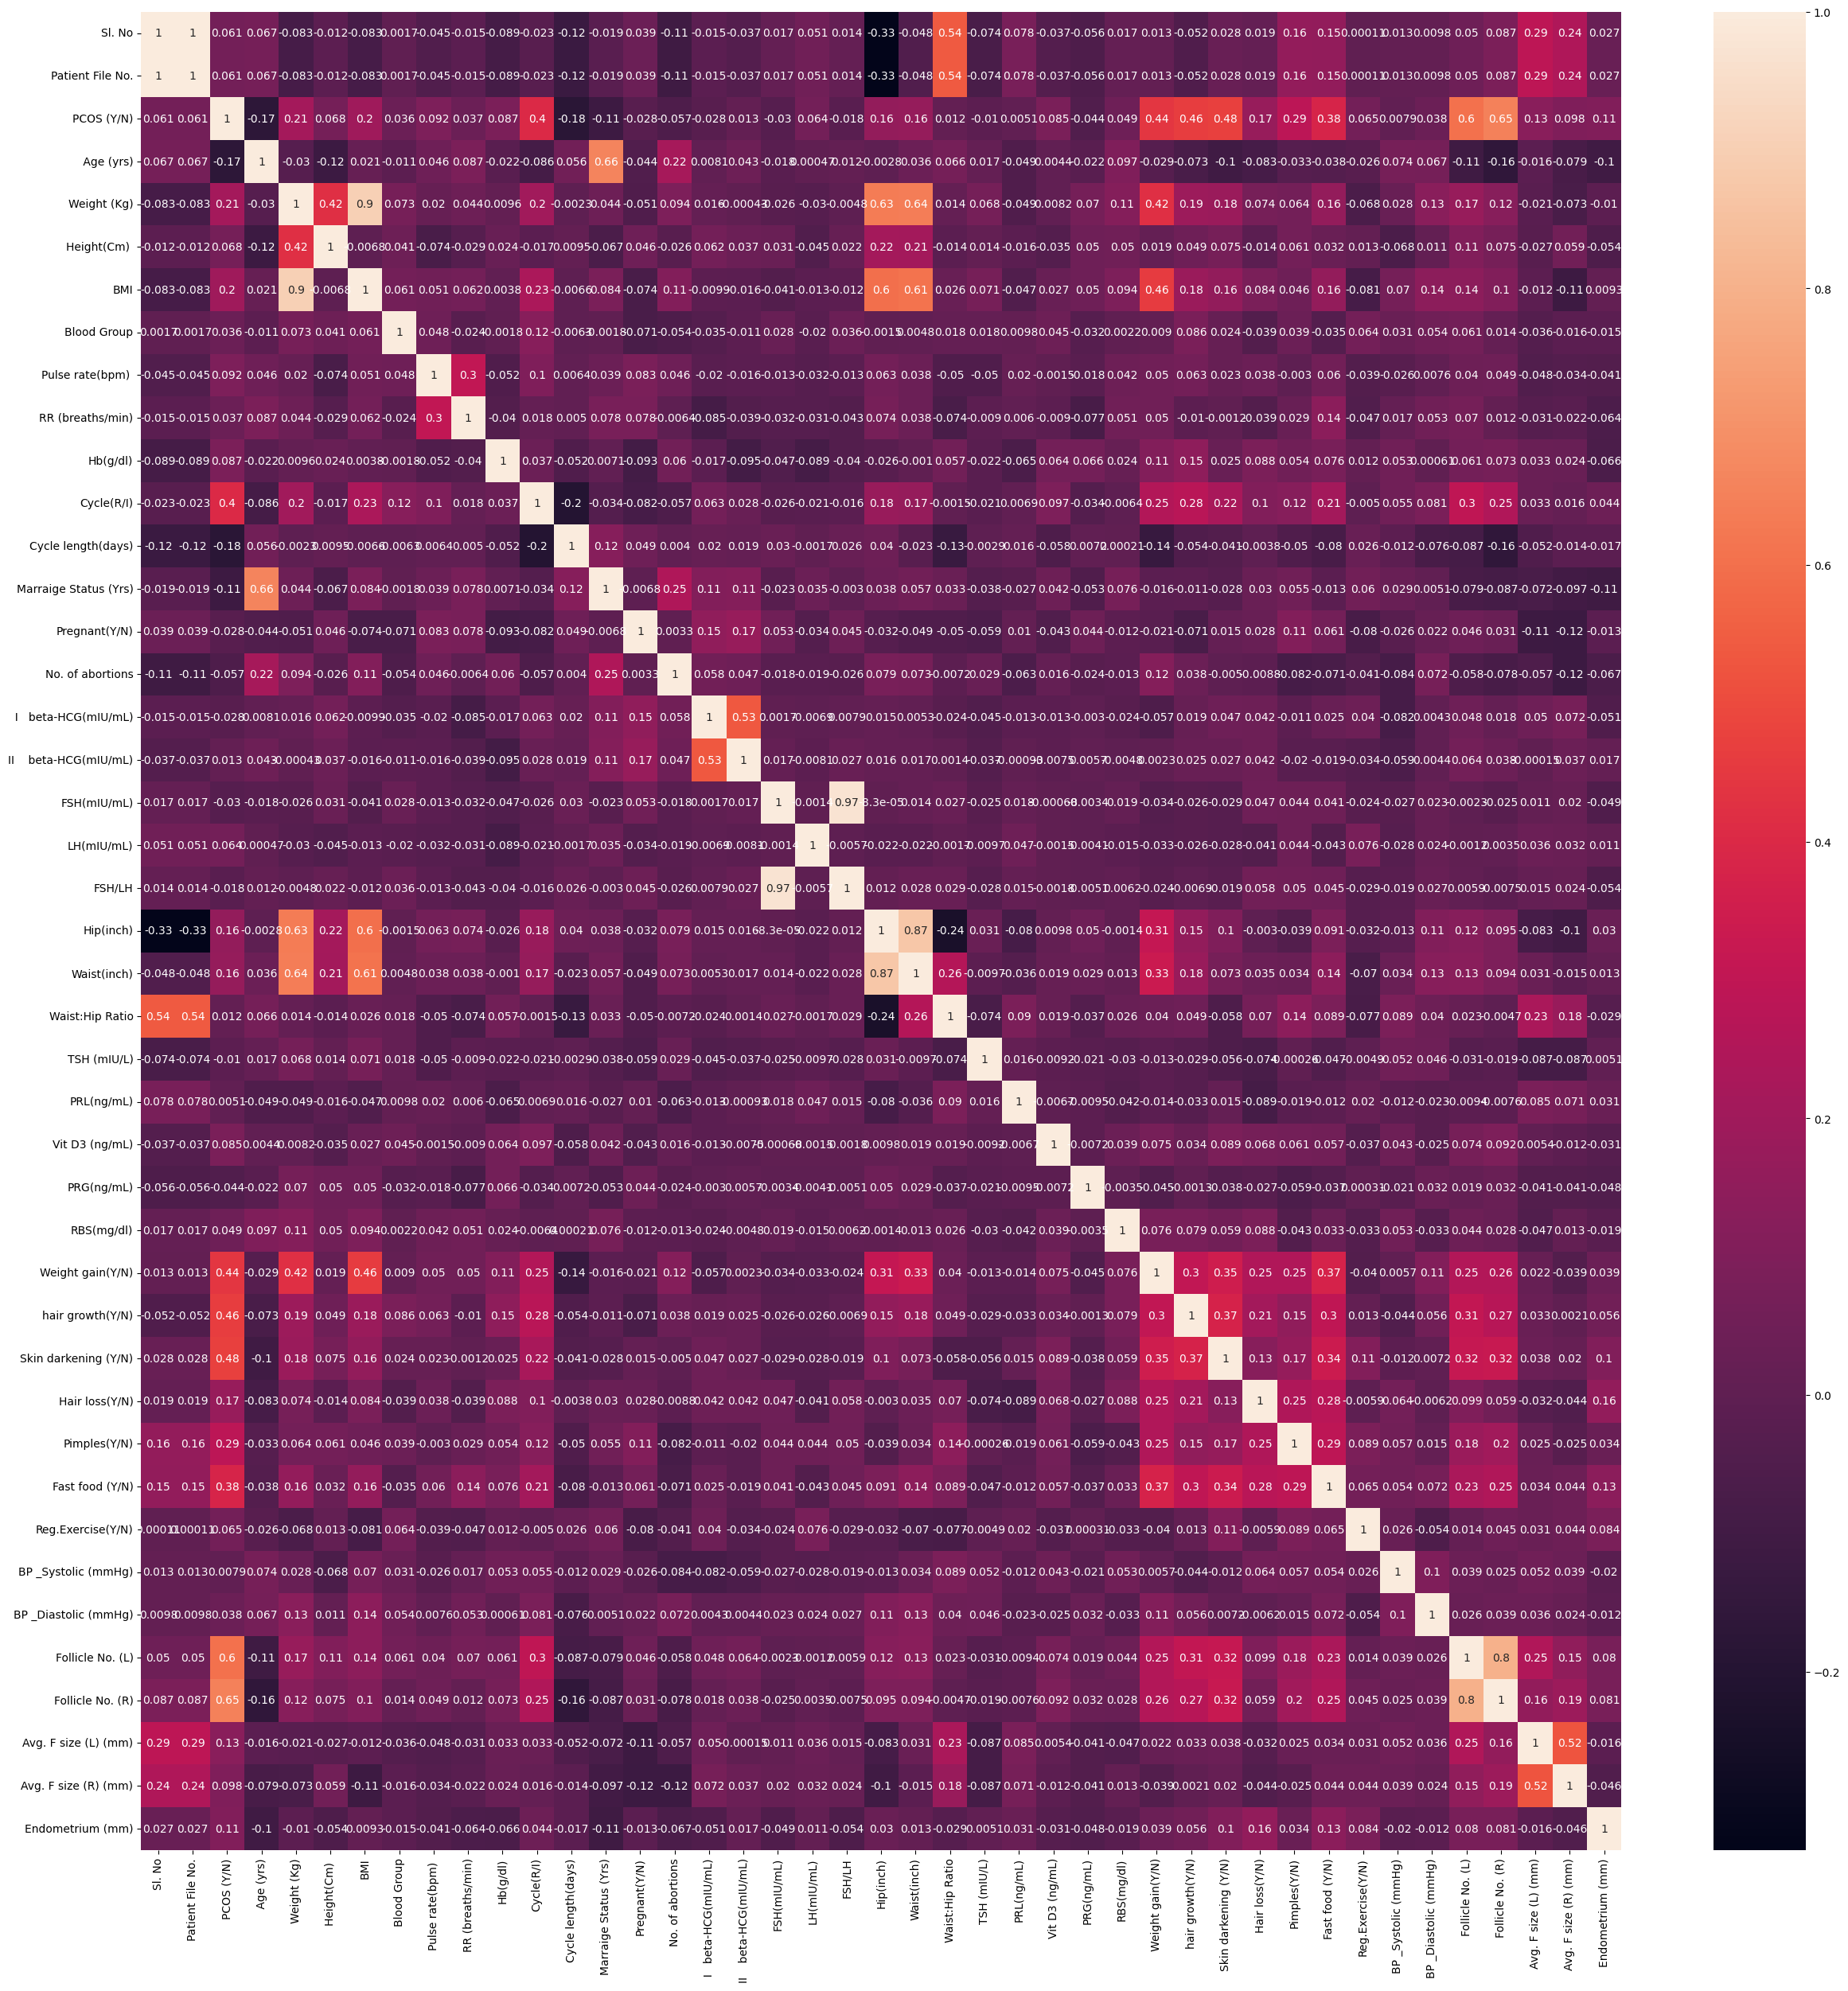

In [ ]:
fig, ax = plt.subplots(figsize = (30,30))
sns.heatmap(pcos.corr(), annot = True)

In [ ]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
pcos = pcos.drop(labels = {'Pregnant(Y/N)'}, axis = 1)

In [ ]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  No. of abortions        541 non-null    in

In [ ]:
pcos = pcos.drop(labels = {'Marraige Status (Yrs)'}, axis = 1)

In [ ]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  No. of abortions        541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [ ]:
pcos['Fast food (Y/N)'] = pcos['Fast food (Y/N)'].fillna(method = 'ffill')

In [ ]:
selected_features = {' Age (yrs)', 'Weight (Kg)','BMI','Blood Group','RR (breaths/min)','Hb(g/dl)','Cycle(R/I)','No. of abortions','  I   beta-HCG(mIU/mL)','II    beta-HCG(mIU/mL)','FSH(mIU/mL)','LH(mIU/mL)','Hip(inch)','Waist(inch)','Waist:Hip Ratio','TSH (mIU/L)', 'PRL(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',	'Reg.Exercise(Y/N)','BP _Systolic (mmHg)',	'BP _Diastolic (mmHg)','Follicle No. (L)',	'Follicle No. (R)',	'Avg. F size (L) (mm)',	'Avg. F size (R) (mm)',	'Endometrium (mm)'}

In [ ]:
X = pcos[selected_features]

<ipython-input-53-b98209584ff2>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = pcos[selected_features]


In [ ]:
y = pcos['PCOS (Y/N)']

In [ ]:
Scaler = MinMaxScaler()
X_scaled = Scaler.fit_transform(X)

In [ ]:
X_scaled

array([[4.00015841e-05, 1.36363636e-01, 0.00000000e+00, ...,
        7.50000000e-01, 1.50000000e-01, 9.85221675e-03],
       [4.00015841e-05, 1.36363636e-01, 0.00000000e+00, ...,
        6.25000000e-01, 2.50000000e-01, 4.80295567e-02],
       [1.97243811e-02, 5.90909091e-01, 1.00000000e+00, ...,
        7.50000000e-01, 7.50000000e-01, 3.84852217e-02],
       ...,
       [4.00015841e-05, 4.54545455e-02, 0.00000000e+00, ...,
        7.50000000e-01, 0.00000000e+00, 4.35652709e-02],
       [4.00015841e-05, 3.18181818e-01, 0.00000000e+00, ...,
        7.50000000e-01, 3.00000000e-01, 3.78694581e-02],
       [4.00015841e-05, 4.09090909e-01, 1.00000000e+00, ...,
        7.91666667e-01, 5.00000000e-01, 2.49384236e-02]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size = 0.2)

In [ ]:
X_train.shape

(432, 31)

In [ ]:
X_test.shape

(109, 31)

In [ ]:
y_train.shape

(432,)

In [ ]:
y_test.shape

(109,)

In [ ]:
pcos_classifier_model = tf.keras.models.Sequential()
pcos_classifier_model.add(tf.keras.layers.Dense(units = 400, activation = 'relu', input_shape = (31,)))
pcos_classifier_model.add(tf.keras.layers.Dense(units = 400, activation = 'relu'))
pcos_classifier_model.add(tf.keras.layers.Dense(units = 400, activation = 'relu'))
pcos_classifier_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
pcos_classifier_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
epochs_hist = pcos_classifier_model.fit(X_train, y_train, epochs = 50, batch_size = 512)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.7141 - accuracy: 0.2662
Epoch 2/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6400 - accuracy: 0.6898
Epoch 3/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6049 - accuracy: 0.6898
Epoch 4/50
1/1 [==============================] - 0s 11ms/step - loss: 0.5739 - accuracy: 0.6898
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 0.5338 - accuracy: 0.6898
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 0.4887 - accuracy: 0.7431
Epoch 7/50
1/1 [==============================] - 0s 13ms/step - loss: 0.4465 - accuracy: 0.8495
Epoch 8/50
1/1 [==============================] - 0s 12ms/step - loss: 0.4074 - accuracy: 0.8866
Epoch 9/50
1/1 [==============================] - 0s 14ms/step - loss: 0.3680 - accuracy: 0.8843
Epoch 10/50
1/1 [==============================] - 0s 14ms/step - loss: 0.3346 - accuracy: 0.8843
Epoch 11/50
1/1 [==============

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

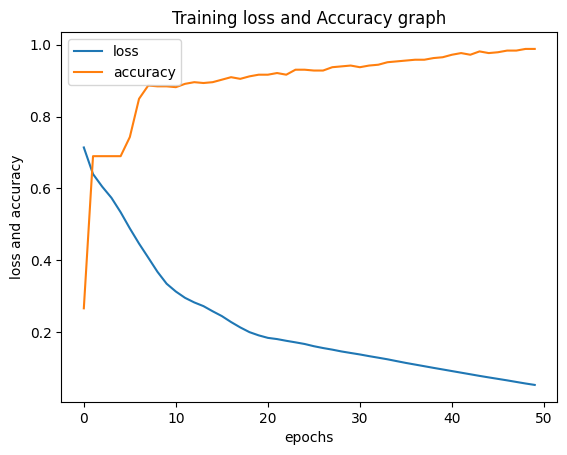

In [ ]:
eh = epochs_hist.history['loss']
eh2 = epochs_hist.history['accuracy']
plt.plot(eh)
plt.plot(eh2)
plt.title('Training loss and Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('loss and accuracy')
plt.legend({'loss', 'accuracy'})

In [ ]:
y_predict = pcos_classifier_model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_predict

array([[5.80540060e-08],
       [3.02851811e-04],
       [9.49773431e-01],
       [1.30065833e-03],
       [9.87660348e-01],
       [1.04770452e-05],
       [4.16393887e-04],
       [9.84292388e-01],
       [3.62163519e-05],
       [2.58290970e-06],
       [9.68339574e-03],
       [1.51917366e-05],
       [8.98428798e-01],
       [4.86595636e-05],
       [9.99795616e-01],
       [1.60967875e-02],
       [2.50896672e-04],
       [2.87432104e-01],
       [3.37623314e-05],
       [9.66944098e-02],
       [4.33771834e-02],
       [9.97122228e-01],
       [1.45132115e-04],
       [3.58783066e-01],
       [2.54010856e-01],
       [1.53446177e-04],
       [8.39332938e-01],
       [8.96090269e-03],
       [9.75481808e-01],
       [9.97944057e-01],
       [6.23844506e-04],
       [3.48999980e-04],
       [6.22508109e-01],
       [9.99628544e-01],
       [1.52066737e-01],
       [1.37380048e-04],
       [4.48355265e-02],
       [2.35903150e-04],
       [9.39878635e-03],
       [5.56680432e-04],


In [ ]:
y_predict = (y_predict > 0.5)

In [ ]:
y_predict

array([[False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [

14/14 [==============================] - 0s 3ms/step


<Axes: >

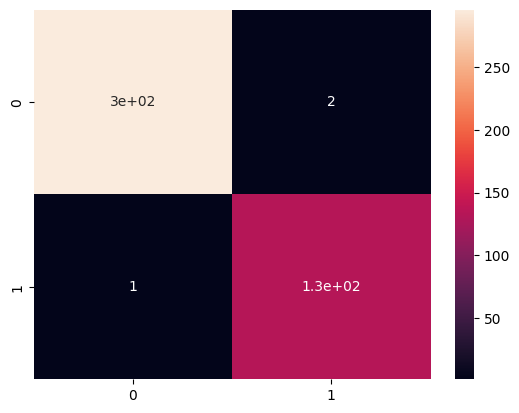

In [ ]:
from sklearn.metrics import confusion_matrix
y_train_pred = pcos_classifier_model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99       297
        True       0.99      0.99      0.99       135

    accuracy                           0.99       432
   macro avg       0.99      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432



<Axes: >

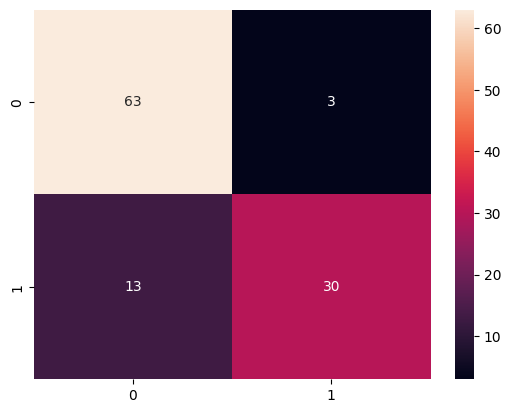

In [ ]:
cm2 = confusion_matrix(y_test, y_predict)
sns.heatmap(cm2, annot = True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        66
           1       0.91      0.70      0.79        43

    accuracy                           0.85       109
   macro avg       0.87      0.83      0.84       109
weighted avg       0.86      0.85      0.85       109



In [ ]:
evaluation = pcos_classifier_model.evaluate(X_test, y_test)
print('test accuracy:{}'.format(evaluation[1]))

4/4 [==============================] - 0s 6ms/step - loss: 0.5935 - accuracy: 0.8532
test accuracy:0.853210985660553


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)
model2.score(X_test, y_test)

0.8715596330275229

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()
model3.fit(X_train,y_train)
model3.score(X_test, y_test)

0.8256880733944955

In [ ]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(X_train,y_train)
model4.score(X_test, y_test)

0.8715596330275229

##**Early Eye Disease Detection**

# >> **Test Accuracy:** 94.6%

Keratoconus is a progressive eye disease that affects the cornea, the clear, dome-shaped front surface of the eye. Normally, the cornea has a round, smooth and regular surface. However, for someone with keratoconus, the cornea progressively thins and gradually bulges outward into a cone shape over time. This can lead to blurry and distorted vision and may cause sensitivity to light and glare. Keratoconus can be identified as a specific type of corneal ectasia, a rare but serious condition in which LASIK or PRK vision correction procedures remove a lot of tissue from the cornea and cause it to become very thin and weak, thus it starts to change shape and extends outwards because it can’t hold normal eye pressure anymore. Early-stage keratoconus is the primary risk factor for post-LASIK ectasia, a serious complication of laser refractive surgeries. Keratoconus usually affects both eyes, though it often affects one eye more than the other. It generally begins to affect people between the ages of 10 and 25. The condition may progress slowly for 10 years or longer, and can become so severe that it can require a corneal transplant if not caught early




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv("/content/dataset(1).csv")
labels = pd.read_csv("/content/labels.csv")

In [ ]:
names = data.columns
name = []

In [ ]:
for i in range(0, 448, 1):
  if data.iloc[:, i].dtype == 'object':
    name.append(names[i])

In [ ]:
name

['idEye', 'En.Anterior.']

In [ ]:
data = data.drop(labels = ["Unnamed: 0", "idEye", "En.Anterior."], axis = 1)

In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           3162 non-null   int64 
 1   Data.PLOS_One.idEye  3162 non-null   object
 2   clster_labels        3162 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 74.2+ KB


In [ ]:
labels

Unnamed: 0 Data.PLOS_One.idEye  clster_labels
0              1           1OS(Left)              1
1              2          1OD(Right)              2
2              3          2OD(Right)              2
3              4           4OS(Left)              1
4              5          4OD(Right)              2
...          ...                 ...            ...
3157        3158       1812OD(Right)              2
3158        3159        1813OS(Left)              2
3159        3160       1813OD(Right)              2
3160        3161        1814OS(Left)              2
3161        3162       1814OD(Right)              2

[3162 rows x 3 columns]

In [ ]:
x = data
y = labels.clster_labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2529 entries, 1598 to 1776
Columns: 445 entries, Ks to ESI.Posterior.
dtypes: float64(319), int64(126)
memory usage: 8.6 MB


In [ ]:
model_0 = Pipeline([
    ("preprocessing", MinMaxScaler()),
    ("model", KNeighborsClassifier())
])
model_0.fit(X_train, y_train)
print(f"Test accuracy: {model_0.score(X_test, y_test)*100}%")

Test accuracy: 87.83570300157977%


In [ ]:
model_1 = Pipeline([
    ("preprocessing", MinMaxScaler()),
    ("model", DecisionTreeClassifier())
])
model_1.fit(X_train, y_train)
print(f"Test accuracy: {model_1.score(X_test, y_test)*100}%")

Test accuracy: 89.88941548183254%


In [ ]:
model_2 = Pipeline([
    ("preprocessing", MinMaxScaler()),
    ("model", LogisticRegression())
])
model_2.fit(X_train, y_train)
print(f"Test accuracy: {model_2.score(X_test, y_test)*100}%")

Test accuracy: 94.62875197472354%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##**Eye Disease CNN Model**

This data contains five types of diseases which is Bulging eyes, Cataracts, Crossed eyes, Glaucoma and Uveitis




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime

In [ ]:
print(f"Notebook last run (end to end): {datetime.datetime.now()}")

Notebook last run (end to end): 2023-09-07 14:33:37.395128


In [ ]:
!ls /content/drive/MyDrive/data/Eye_diseases

Bulging_Eyes  Cataracts  Crossed_Eyes  Glaucoma  Uveitis


In [ ]:
!ls /content/drive/MyDrive/data/Eye_diseases/Glaucoma

image-10.jpeg	images-16.jpeg	images-32.jpeg	images-48.jpeg	images-69.jpeg
image-11.jpeg	images-17.jpeg	images-33.jpeg	images-49.jpeg	images-6.jpeg
image-12.jpeg	images-18.jpeg	images-34.png	images-4.jpeg	images-70.jpeg
image-2.jpeg	images-19.jpeg	images-35.jpeg	images-50.jpeg	images-71.jpeg
image-3.jpeg	images-20.jpeg	images-36.jpeg	images-51.jpeg	images-72.jpeg
image-4.jpeg	images-21.jpeg	images-37.jpeg	images-52.jpeg	images-73.jpeg
image-5.jpeg	images-22.jpeg	images-38.jpeg	images-53.jpeg	images-74.jpeg
image-6.jpeg	images-23.jpeg	images-39.jpeg	images-54.jpeg	images-75.jpeg
image-7.jpeg	images-24.jpeg	images-3.jpeg	images-55.jpeg	images-76.jpeg
image-8.jpeg	images-25.png	images-40.jpeg	images-56.jpeg	images-79.jpeg
image-9.jpeg	images-26.jpeg	images-41.jpeg	images-57.jpeg	images-7.jpeg
images-10.jpeg	images-27.jpeg	images-42.jpeg	images-58.jpeg	images-8.jpeg
images-11.jpeg	images-28.jpeg	images-43.jpeg	images-59.jpeg	images-9.jpeg
images-12.jpeg	images-29.jpeg	images-44.jpeg	images-

In [ ]:
!ls /content/drive/MyDrive/data/Eye_diseases/Uveitis

image-10.jpeg  image-7.jpeg    images-16.jpeg  images-26.jpeg  images-36.jpeg
image-11.jpeg  image-8.jpeg    images-17.jpeg  images-27.jpeg  images-37.jpeg
image-12.jpeg  image-9.jpeg    images-18.jpeg  images-28.jpeg  images-3.jpeg
image-13.jpeg  image.jpeg      images-19.jpeg  images-29.jpeg  images-4.jpeg
image-14.jpeg  images-10.jpeg  images-20.jpeg  images-2.jpeg   images-5.jpeg
image-2.jpeg   images-11.jpeg  images-21.jpeg  images-30.jpeg  images-6.jpeg
image-3.jpeg   images-12.jpeg  images-22.jpeg  images-31.jpeg  images-7.jpeg
image-4.jpeg   images-13.jpeg  images-23.jpeg  images-33.jpeg  images-8.jpeg
image-5.jpeg   images-14.jpeg  images-24.jpeg  images-34.jpeg  images-9.jpeg
image-6.jpeg   images-15.jpeg  images-25.jpeg  images-35.jpeg  images.jpeg


In [ ]:
!ls /content/drive/MyDrive/data/Eye_diseases/Crossed_Eyes

image-10.jpeg	 images-127.jpeg  images-23.jpeg  images-63.jpeg
image-11.jpeg	 images-128.jpeg  images-24.jpeg  images-64.jpeg
image-12.jpeg	 images-129.jpeg  images-25.jpeg  images-65.jpeg
image-13.jpeg	 images-12.jpeg   images-26.png   images-66.jpeg
image-14.png	 images-130.jpeg  images-27.jpeg  images-67.jpeg
image-15.jpeg	 images-131.jpeg  images-28.jpeg  images-68.jpeg
image-2.jpeg	 images-132.jpeg  images-29.jpeg  images-69.jpeg
image-3.jpeg	 images-133.jpeg  images-2.png	  images-6.jpeg
image-4.jpeg	 images-134.jpeg  images-30.jpeg  images-70.jpeg
image-5.jpeg	 images-135.jpeg  images-31.jpeg  images-71.jpeg
image-6.jpeg	 images-136.jpeg  images-32.jpeg  images-72.jpeg
image-7.jpeg	 images-137.jpeg  images-33.jpeg  images-73.jpeg
image-8.jpeg	 images-138.jpeg  images-34.jpeg  images-74.jpeg
image-9.jpeg	 images-139.jpeg  images-35.jpeg  images-75.jpeg
image.jpeg	 images-13.jpeg   images-36.jpeg  images-76.jpeg
images-100.jpeg  images-140.jpeg  images-37.jpeg  images-77.jpeg
imag

In [ ]:
!ls /content/drive/MyDrive/data/Eye_diseases/Cataracts

image-10.jpeg  image-20.jpeg   images-12.jpeg  images-24.jpeg  images-38.jpeg
image-11.jpeg  image-22.jpeg   images-13.jpeg  images-25.jpeg  images-39.jpeg
image-12.jpeg  image-23.jpeg   images-14.jpeg  images-26.jpeg  images-40.jpeg
image-13.jpeg  image-24.jpeg   images-15.jpeg  images-29.jpeg  images-41.jpeg
image-14.jpeg  image-2.jpeg    images-16.jpeg  images-30.jpeg  images-4.jpeg
image-15.jpeg  image-4.jpeg    images-17.jpeg  images-31.jpeg  images-5.jpeg
image-16.jpeg  image-5.jpeg    images-18.jpeg  images-32.jpeg  images-9.jpeg
image-17.jpeg  image-6.jpeg    images-19.jpeg  images-35.jpeg
image-18.jpeg  images-10.jpeg  images-20.jpeg  images-36.jpeg
image-19.jpeg  images-11.jpeg  images-23.jpeg  images-37.jpeg


In [ ]:
!ls /content/drive/MyDrive/data/Eye_diseases/Bulging_Eyes

image-10.jpeg  image-2.jpeg  image-8.jpeg    images-13.jpeg  images-5.jpeg
image-11.jpeg  image-3.jpeg  image-9.jpeg    images-14.jpeg  images-6.jpeg
image-12.jpeg  image-4.jpeg  image.jpeg      images-15.jpeg  images-7.jpeg
image-13.jpeg  image-5.jpeg  images-10.jpeg  images-2.jpeg   images-8.jpeg
image-14.jpeg  image-6.jpeg  images-11.jpeg  images-3.jpeg   images-9.jpeg
image-15.jpeg  image-7.jpeg  images-12.jpeg  images-4.jpeg   images.jpeg


In [ ]:
import os
for dirpath, dirname, filename in os.walk("/content/drive/MyDrive/data/Eye_diseases"):
  print(f"There are {len(dirname)} directories containing {len(filename)} in {dirpath}")

There are 5 directories containing 0 in /content/drive/MyDrive/data/Eye_diseases
There are 0 directories containing 82 in /content/drive/MyDrive/data/Eye_diseases/Glaucoma
There are 0 directories containing 174 in /content/drive/MyDrive/data/Eye_diseases/Crossed_Eyes
There are 0 directories containing 30 in /content/drive/MyDrive/data/Eye_diseases/Bulging_Eyes
There are 0 directories containing 50 in /content/drive/MyDrive/data/Eye_diseases/Uveitis
There are 0 directories containing 47 in /content/drive/MyDrive/data/Eye_diseases/Cataracts


In [ ]:
import pathlib

data_dir = pathlib.Path("/content/drive/MyDrive/data/Eye_diseases")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Bulging_Eyes' 'Cataracts' 'Crossed_Eyes' 'Glaucoma' 'Uveitis']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def image_viewer(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img);
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (201, 251, 3)


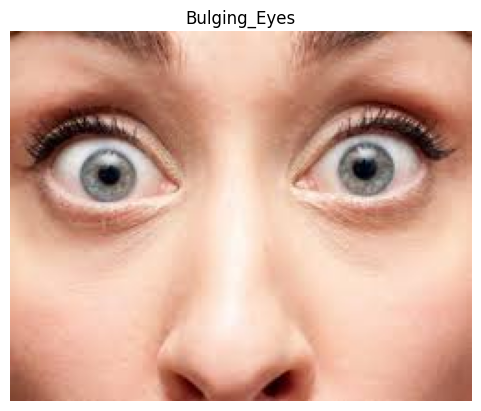

In [ ]:
img = image_viewer(target_dir = "/content/drive/MyDrive/data/Eye_diseases/", target_class = "Bulging_Eyes")

Image shape: (84, 101, 3)


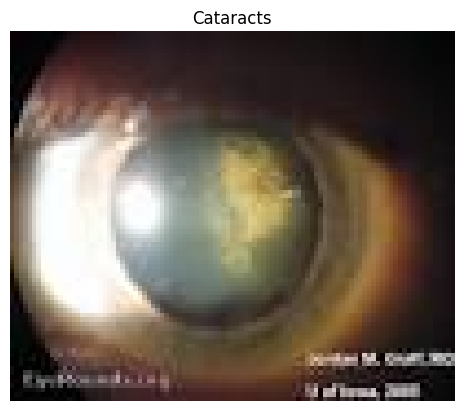

In [ ]:
img = image_viewer("/content/drive/MyDrive/data/Eye_diseases/", "Cataracts")

Image shape: (255, 197, 3)


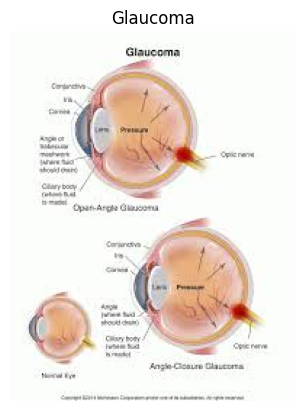

In [ ]:
img = image_viewer("/content/drive/MyDrive/data/Eye_diseases/", "Glaucoma")

Image shape: (183, 275, 3)


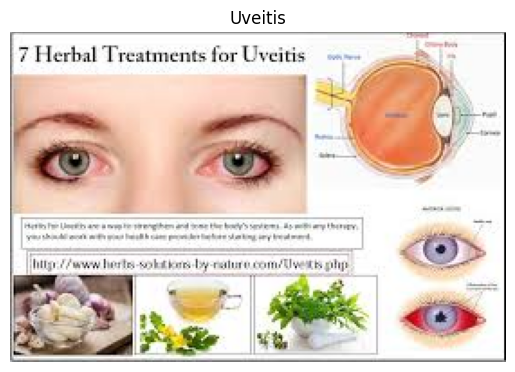

In [ ]:
img = image_viewer("/content/drive/MyDrive/data/Eye_diseases/", "Uveitis")

In [ ]:
img

array([[[172, 172, 172],
        [129, 129, 129],
        [114, 114, 114],
        ...,
        [121, 121, 121],
        [134, 134, 134],
        [125, 125, 125]],

       [[132, 132, 132],
        [160, 160, 160],
        [199, 199, 199],
        ...,
        [213, 213, 213],
        [187, 187, 187],
        [ 14,  14,  14]],

       [[119, 119, 119],
        [198, 198, 198],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [255, 255, 255],
        [  0,   0,   0]],

       ...,

       [[133, 133, 135],
        [186, 188, 187],
        [252, 252, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0]],

       [[122, 123, 127],
        [148, 149, 151],
        [204, 205, 207],
        ...,
        [201, 201, 201],
        [196, 196, 196],
        [  7,   7,   7]],

       [[179, 182, 187],
        [133, 137, 140],
        [116, 120, 123],
        ...,
        [121, 121, 121],
        [138, 138, 138],
        [113, 113, 113]]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./ 255,
                                   shear_range = 0.2,
                                   rotation_range = 0.2,
                                    )
valid_datagen = ImageDataGenerator(rescale = 1./ 255)

train_dir = "/content/drive/MyDrive/data/Eye_diseases/"
test_dir = "/content/drive/MyDrive/data/Eye_diseases/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "categorical")

valid_data = valid_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "categorical")
model_1 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation = "softmax")
])

Found 383 images belonging to 5 classes.
Found 383 images belonging to 5 classes.


In [ ]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
12/12 [==============================] - 9s 598ms/step - loss: 1.4618 - accuracy: 0.4204 - val_loss: 1.3488 - val_accuracy: 0.4543
Epoch 2/5
12/12 [==============================] - 6s 478ms/step - loss: 1.3670 - accuracy: 0.4804 - val_loss: 1.3125 - val_accuracy: 0.4543
Epoch 3/5
12/12 [==============================] - 7s 586ms/step - loss: 1.2934 - accuracy: 0.4830 - val_loss: 1.1923 - val_accuracy: 0.4621
Epoch 4/5
12/12 [==============================] - 6s 467ms/step - loss: 1.1418 - accuracy: 0.5170 - val_loss: 0.9744 - val_accuracy: 0.6240
Epoch 5/5
12/12 [==============================] - 6s 519ms/step - loss: 0.9466 - accuracy: 0.6266 - val_loss: 0.7890 - val_accuracy: 0.6971


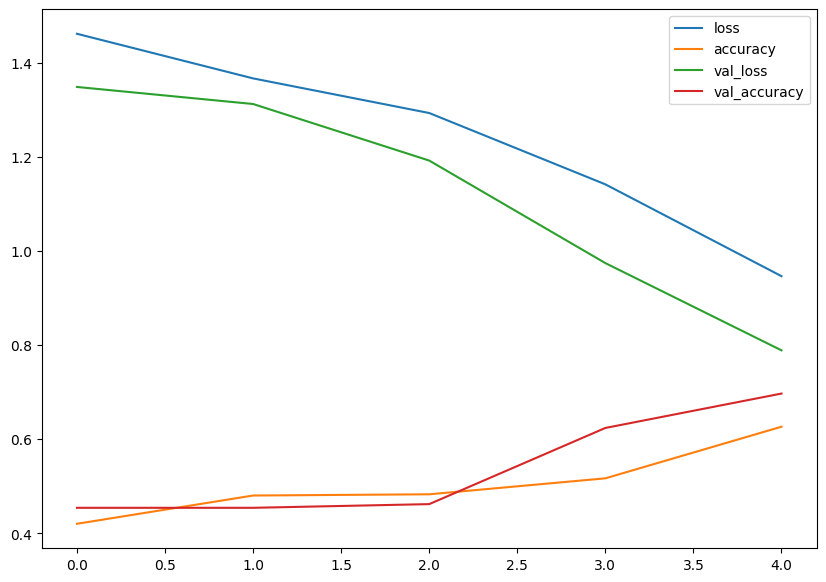

In [ ]:
pd.DataFrame(history_1.history).plot(figsize = (10, 7));

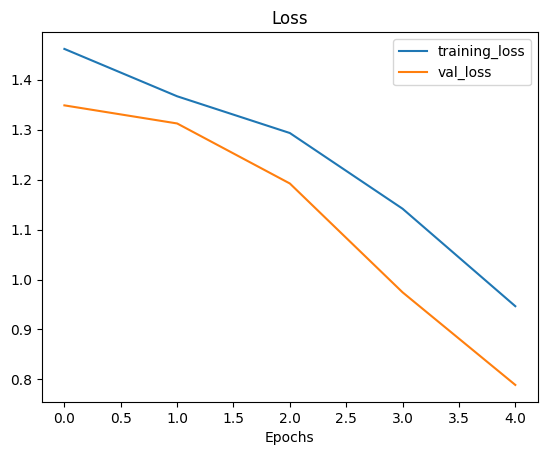

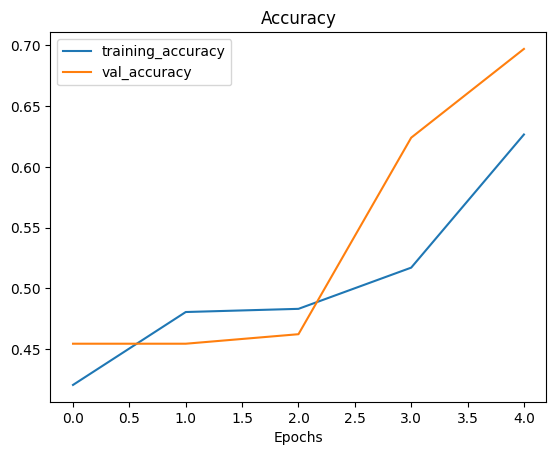

In [ ]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
accuracy = history_1.history['accuracy']
val_accuracy = history_1.history['val_accuracy']
epochs = range(len(history_1.history['loss']))

plt.plot(epochs, loss, label = 'training_loss')
plt.plot(epochs, val_loss, label = 'val_loss')
plt.title("Loss")
plt.xlabel('Epochs')
plt.legend()

plt.figure()
plt.plot(epochs, accuracy, label = 'training_accuracy')
plt.plot(epochs, val_accuracy, label = 'val_accuracy')
plt.title("Accuracy")
plt.xlabel('Epochs')
plt.legend();